# display SS for cyclone data and the map of track and associated damage

***
## Set up

In [1]:
import pandas as pd
import numpy as np
import os
import string
import time as time
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd
from shapely.geometry import Polygon

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

***
## Data import, cleaning, and basic data showing

In [5]:
gdf_india=gpd.read_file(r'C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\India_mangroves\data\India Districts 2016\polbnda_ind.shp')

polygon=gdf_india.geometry.unary_union
gdf_india = gpd.GeoDataFrame(geometry=[polygon], crs=gdf_india.crs)

bbox = (
    65,0,100,40
)
gdf_cyclone=gpd.read_file(r'C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\India_mangroves\data\cyclone\IBTrACS.ALL.list.v04r00.lines.shp'
                          ,bbox=bbox)
print(gdf_cyclone.dtypes)

SID             object
SEASON           int64
NUMBER           int64
BASIN           object
SUBBASIN        object
NAME            object
ISO_TIME        object
NATURE          object
LAT            float64
LON            float64
WMO_WIND       float64
WMO_PRES       float64
WMO_AGENCY      object
TRACK_TYPE      object
DIST2LAND        int64
LANDFALL         int64
IFLAG           object
USA_AGENCY      object
USA_ATCFID      object
USA_LAT        float64
USA_LON        float64
USA_RECORD      object
USA_STATUS      object
USA_WIND       float64
USA_PRES       float64
USA_SSHS         int64
USA_R34_NE     float64
USA_R34_SE     float64
USA_R34_SW     float64
USA_R34_NW     float64
USA_R50_NE     float64
USA_R50_SE     float64
USA_R50_SW     float64
USA_R50_NW     float64
USA_R64_NE     float64
USA_R64_SE     float64
USA_R64_SW     float64
USA_R64_NW     float64
USA_POCI       float64
USA_ROCI       float64
USA_RMW        float64
USA_EYE        float64
TOK_LAT        float64
TOK_LON    

In [4]:
print(gdf_cyclone.head(5))

             SID  SEASON  NUMBER BASIN SUBBASIN       NAME  \
0  1842298N11080    1842       1    NI       BB  NOT_NAMED   
1  1842298N11080    1842       1    NI       BB  NOT_NAMED   
2  1842298N11080    1842       1    NI       BB  NOT_NAMED   
3  1842298N11080    1842       1    NI       BB  NOT_NAMED   
4  1842298N11080    1842       1    NI       BB  NOT_NAMED   
5  1842298N11080    1842       1    NI       AS  NOT_NAMED   
6  1842298N11080    1842       1    NI       AS  NOT_NAMED   
7  1842298N11080    1842       1    NI       AS  NOT_NAMED   
8  1842298N11080    1842       1    NI       AS  NOT_NAMED   
9  1842298N11080    1842       1    NI       AS  NOT_NAMED   

              ISO_TIME NATURE    LAT    LON  WMO_WIND  WMO_PRES WMO_AGENCY  \
0  1842-10-25 03:00:00     NR  10.90  80.30       NaN       NaN       None   
1  1842-10-25 06:00:00     NR  10.87  79.83       NaN       NaN       None   
2  1842-10-25 09:00:00     NR  10.84  79.35       NaN       NaN       None   
3  18

drop irrelevant data (cyclone before 1990)

In [7]:
gdf_cyclone.drop(gdf_cyclone[gdf_cyclone['year']<1990].index,inplace=True)

## show missing data in USA windspeed, USA categories, india windspeed, india categories

USA wind speed

In [11]:
gdf_cyclone_copy=gdf_cyclone.copy()
gdf_cyclone_copy['USA_WIND']=1-gdf_cyclone_copy['USA_WIND'].isnull()
print(gdf_cyclone_copy.groupby(['year','USA_WIND'])['USA_WIND'].count())

year  USA_WIND
1990  0           154
      1           148
1991  0           134
      1           198
1992  0             3
      1           526
1993  0            38
      1           132
1994  0             5
      1           173
1995  0            65
      1           208
1996  0            25
      1           544
1997  0           164
      1           263
1998  0            88
      1           268
1999  0            74
      1           237
2000  0            47
      1           157
2001  0            36
      1           183
2002  0            44
      1           120
2003  0            60
      1           171
2004  0           116
      1           219
2005  0           204
      1           326
2006  0           124
      1           235
2007  0             1
      1           188
2008  0            33
      1           239
2009  0            27
      1           138
2010  0            42
      1           137
2011  0            77
      1           124
2012  0          

USA categories

In [12]:
gdf_cyclone_copy=gdf_cyclone.copy()
gdf_cyclone_copy['USA_SSHS']=1-gdf_cyclone_copy['USA_SSHS'].isnull()
print(gdf_cyclone_copy.groupby(['year','USA_SSHS'])['USA_SSHS'].count())

year  USA_SSHS
1990  1           302
1991  1           332
1992  1           529
1993  1           170
1994  1           178
1995  1           273
1996  1           569
1997  1           427
1998  1           356
1999  1           311
2000  1           204
2001  1           219
2002  1           164
2003  1           231
2004  1           335
2005  1           530
2006  1           359
2007  1           189
2008  1           272
2009  1           165
2010  1           179
2011  1           201
2012  1           111
2013  1           424
2014  1           243
2015  1           246
2016  1           309
2017  1           201
2018  1           265
2019  1           473
2020  1           220
2021  1           147
2022  1            62
Name: USA_SSHS, dtype: int64


India wind speed

In [13]:
gdf_cyclone_copy=gdf_cyclone.copy()
gdf_cyclone_copy['NEW_WIND']=1-gdf_cyclone_copy['NEW_WIND'].isnull()
print(gdf_cyclone_copy.groupby(['year','NEW_WIND'])['NEW_WIND'].count())

year  NEW_WIND
1990  0            39
      1           263
1991  0           109
      1           223
1992  0           360
      1           169
1993  0            92
      1            78
1994  0           107
      1            71
1995  0           158
      1           115
1996  0           368
      1           201
1997  0           275
      1           152
1998  0           158
      1           198
1999  0           155
      1           156
2000  0            32
      1           172
2001  0            92
      1           127
2002  0            40
      1           124
2003  0            87
      1           144
2004  0           153
      1           182
2005  0           243
      1           287
2006  0           124
      1           235
2007  0           111
      1            78
2008  0            98
      1           174
2009  0            19
      1           146
2010  0            39
      1           140
2011  0            40
      1           161
2012  0          

India categories

In [15]:
gdf_cyclone_copy=gdf_cyclone.copy()
gdf_cyclone_copy['NEW_GRADE']=1-gdf_cyclone_copy['NEW_GRADE'].isnull()
print(gdf_cyclone_copy.groupby(['year','NEW_GRADE'])['NEW_GRADE'].count())

year  NEW_GRADE
1990  0            302
1991  0            332
1992  0            529
1993  0            170
1994  0            178
1995  0            273
1996  0            327
      1            242
1997  0            134
      1            293
1998  0            115
      1            241
1999  0             95
      1            216
2000  0             29
      1            175
2001  0             88
      1            131
2002  0             38
      1            126
2003  0             37
      1            194
2004  0            107
      1            228
2005  0            147
      1            383
2006  0            121
      1            238
2007  0            111
      1             78
2008  0             78
      1            194
2009  0             19
      1            146
2010  0             39
      1            140
2011  0             40
      1            161
2012  0             46
      1             65
2013  0            109
      1            315
2014  0           

***
## Draw graph

Draw map of USA displaying track with associated cyclone USA categories.  
-5 = Unknown [XX]  
-4 = Post-tropical [EX, ET, PT]  
-3 = Miscellaneous disturbances [WV, LO, DB, DS, IN, MD]  
-2 = Subtropical [SS, SD]  
Tropical systems classified based on wind speeds [TD, TS, HU, TY,, TC, ST, HR]  
-1 = Tropical depression (W<34)  
0 = Tropical storm [34<W<64]  
1 = Category 1 [64<=W<83]  
2 = Category 2 [83<=W<96]  
3 = Category 3 [96<=W<113]  
4 = Category 4 [113<=W<137]  
5 = Category 5 [W >= 137]

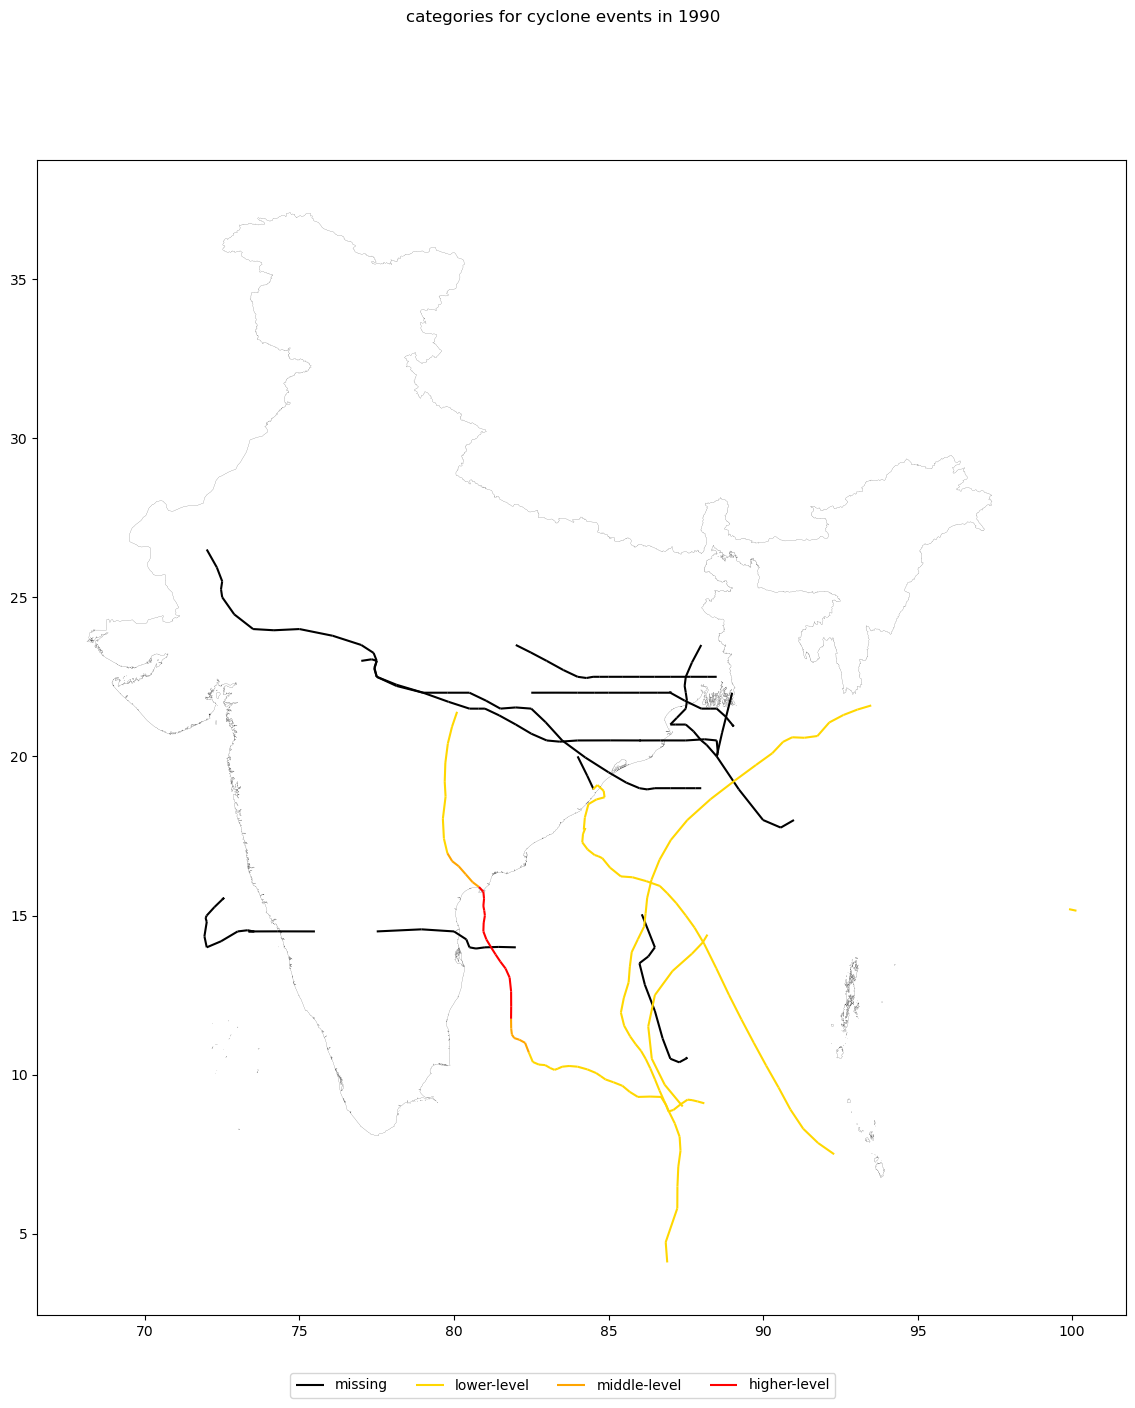

1990


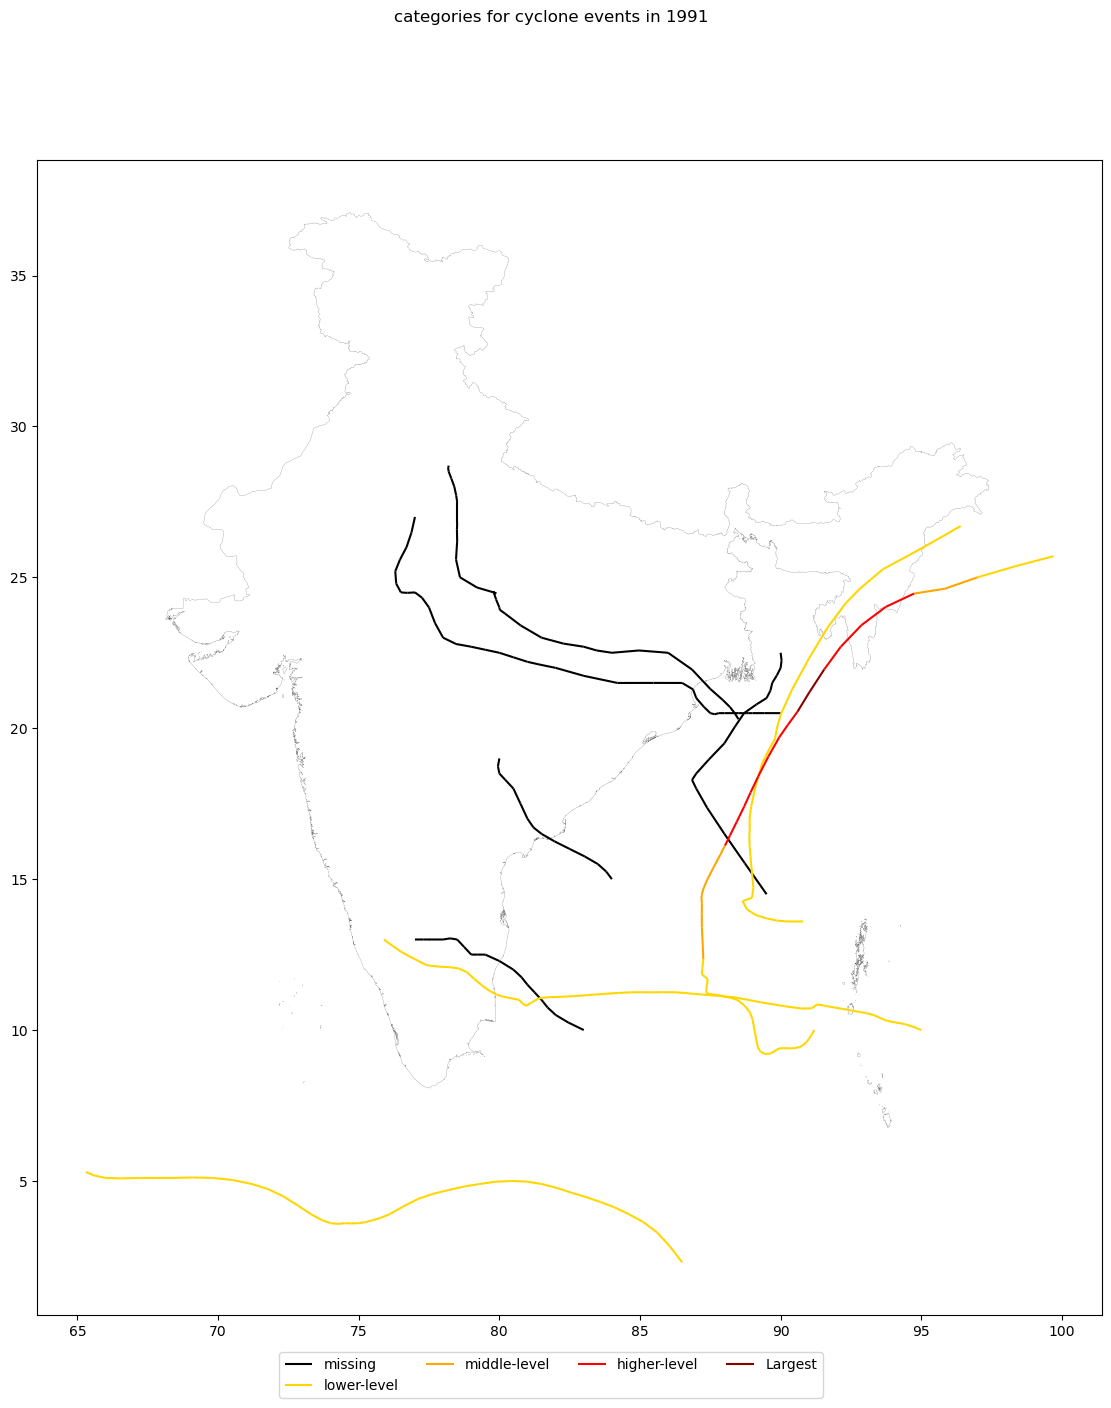

1991


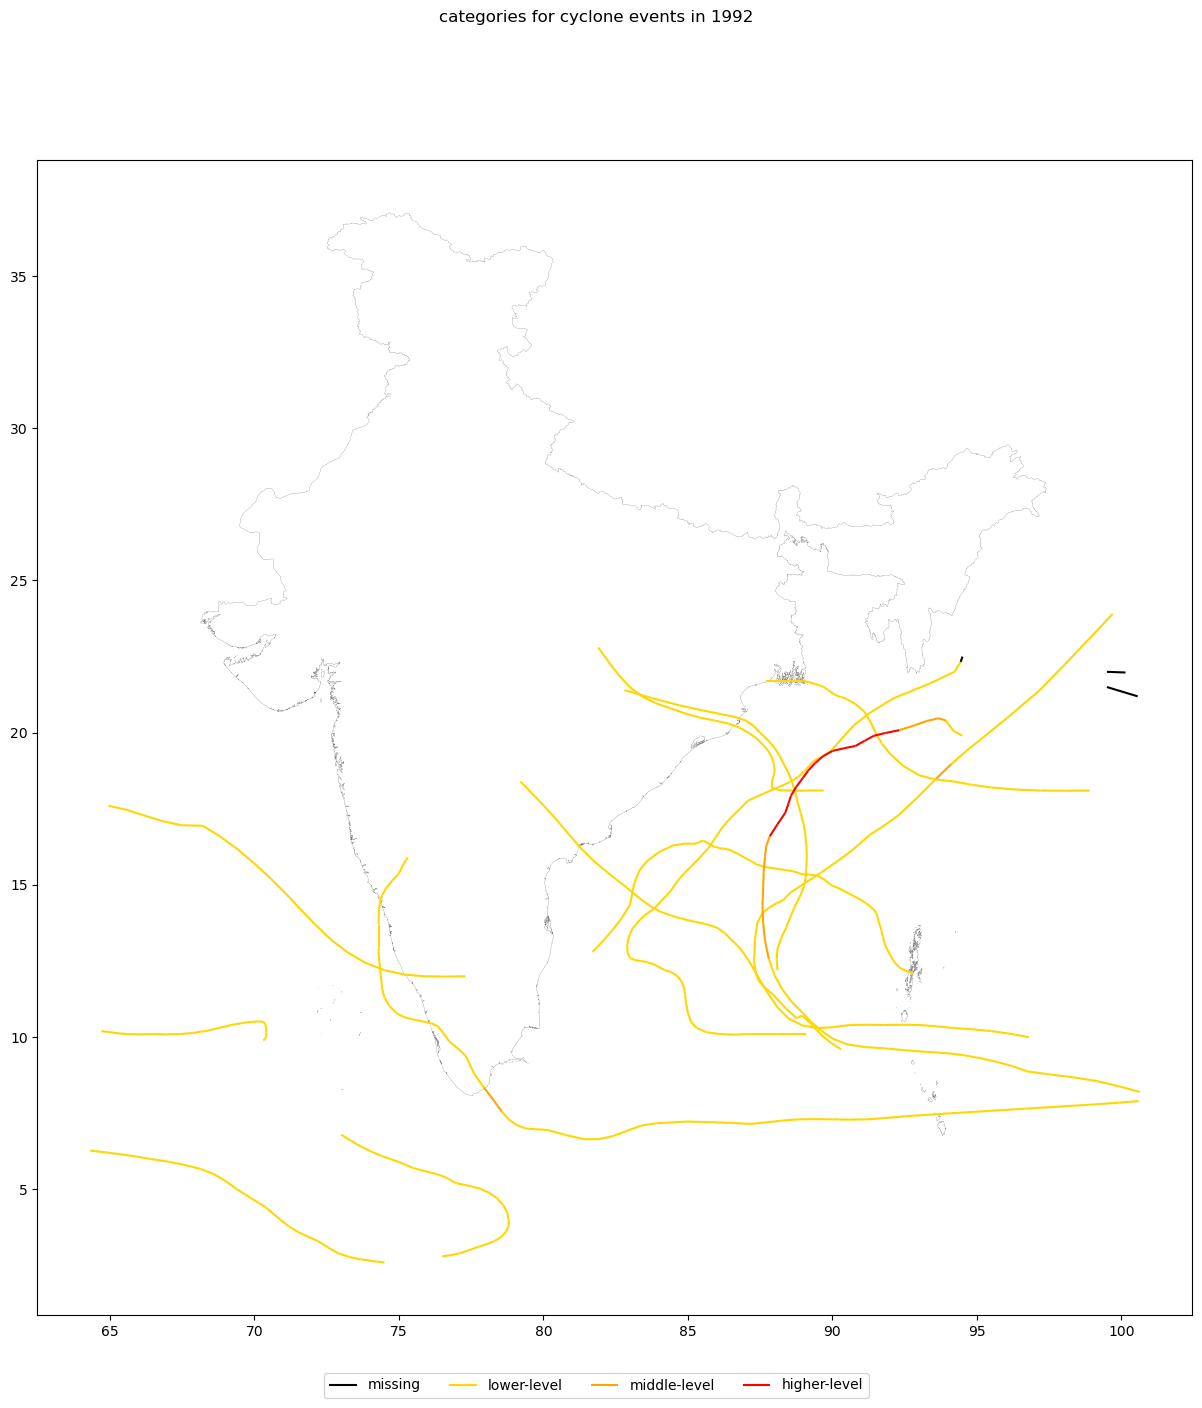

1992


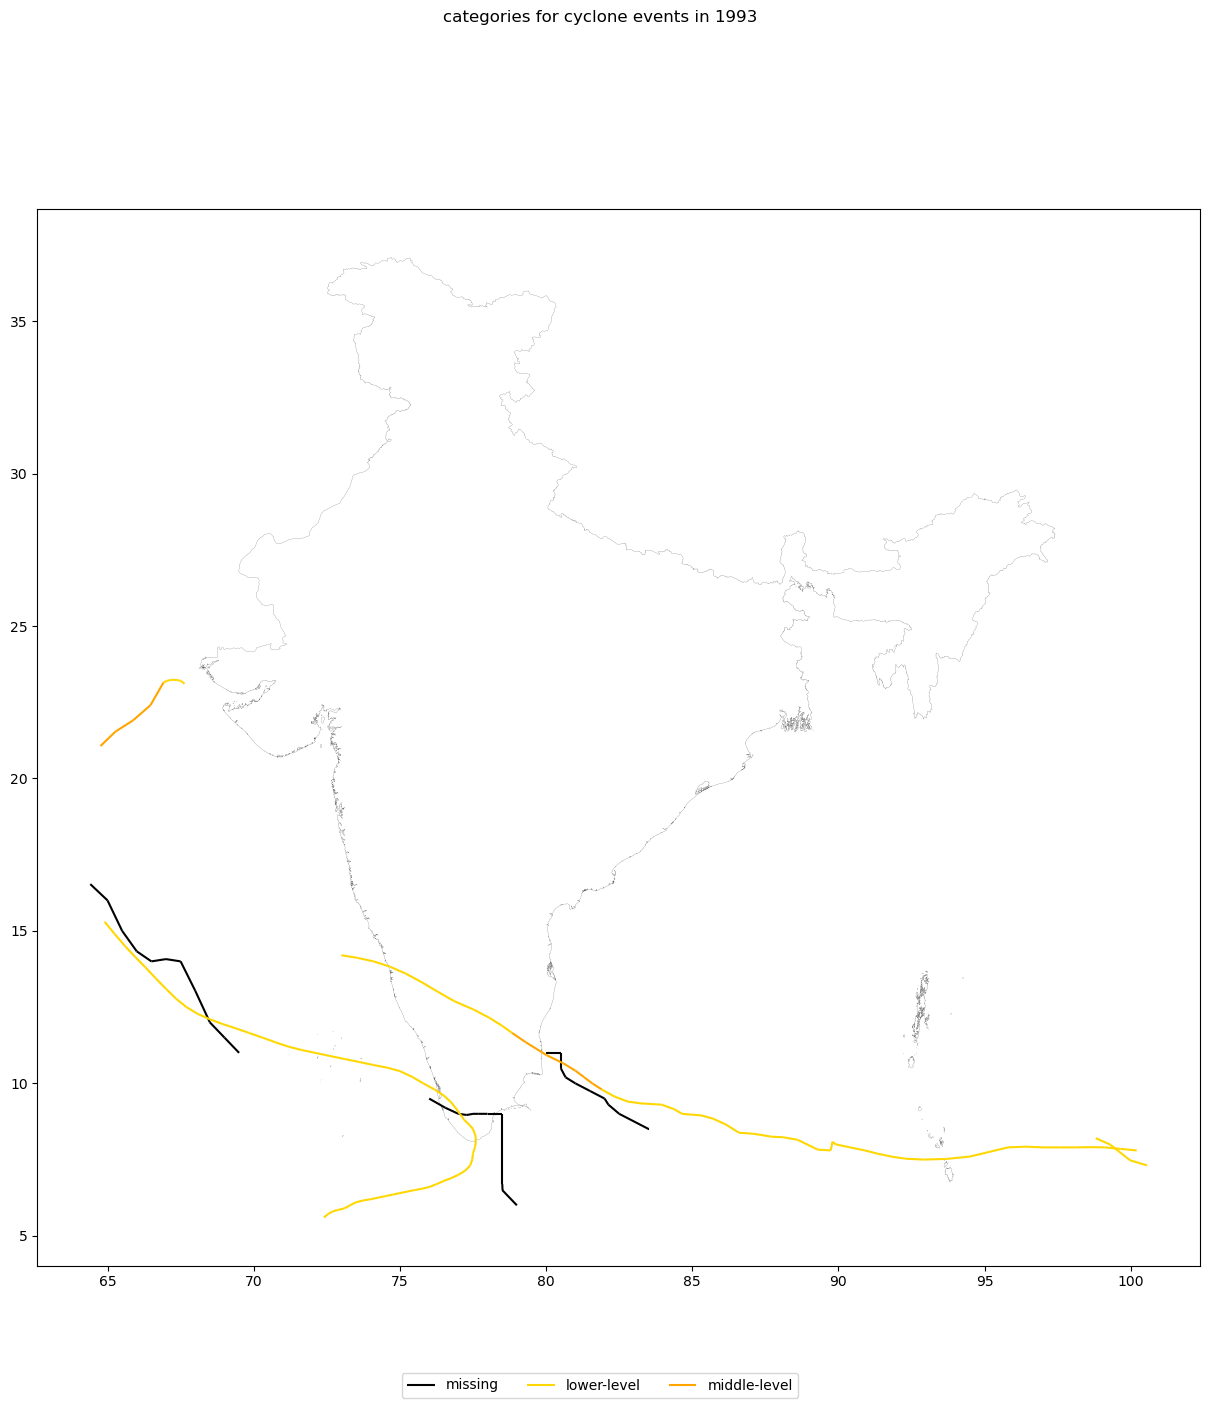

1993


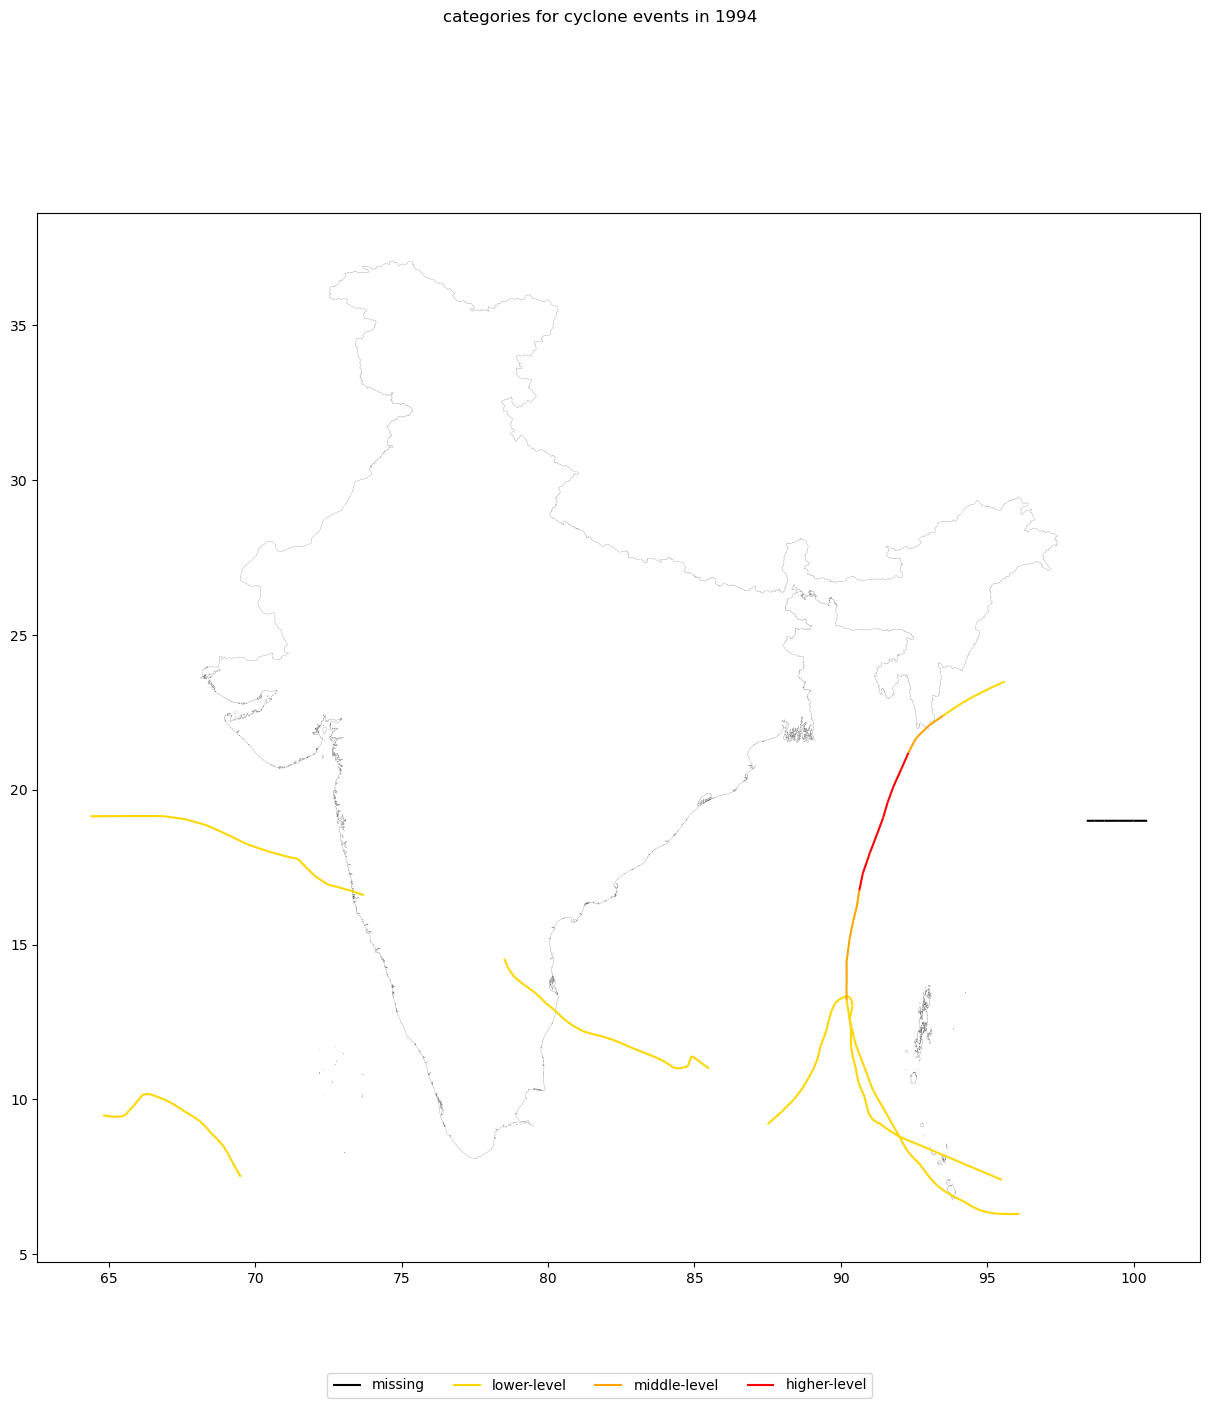

1994


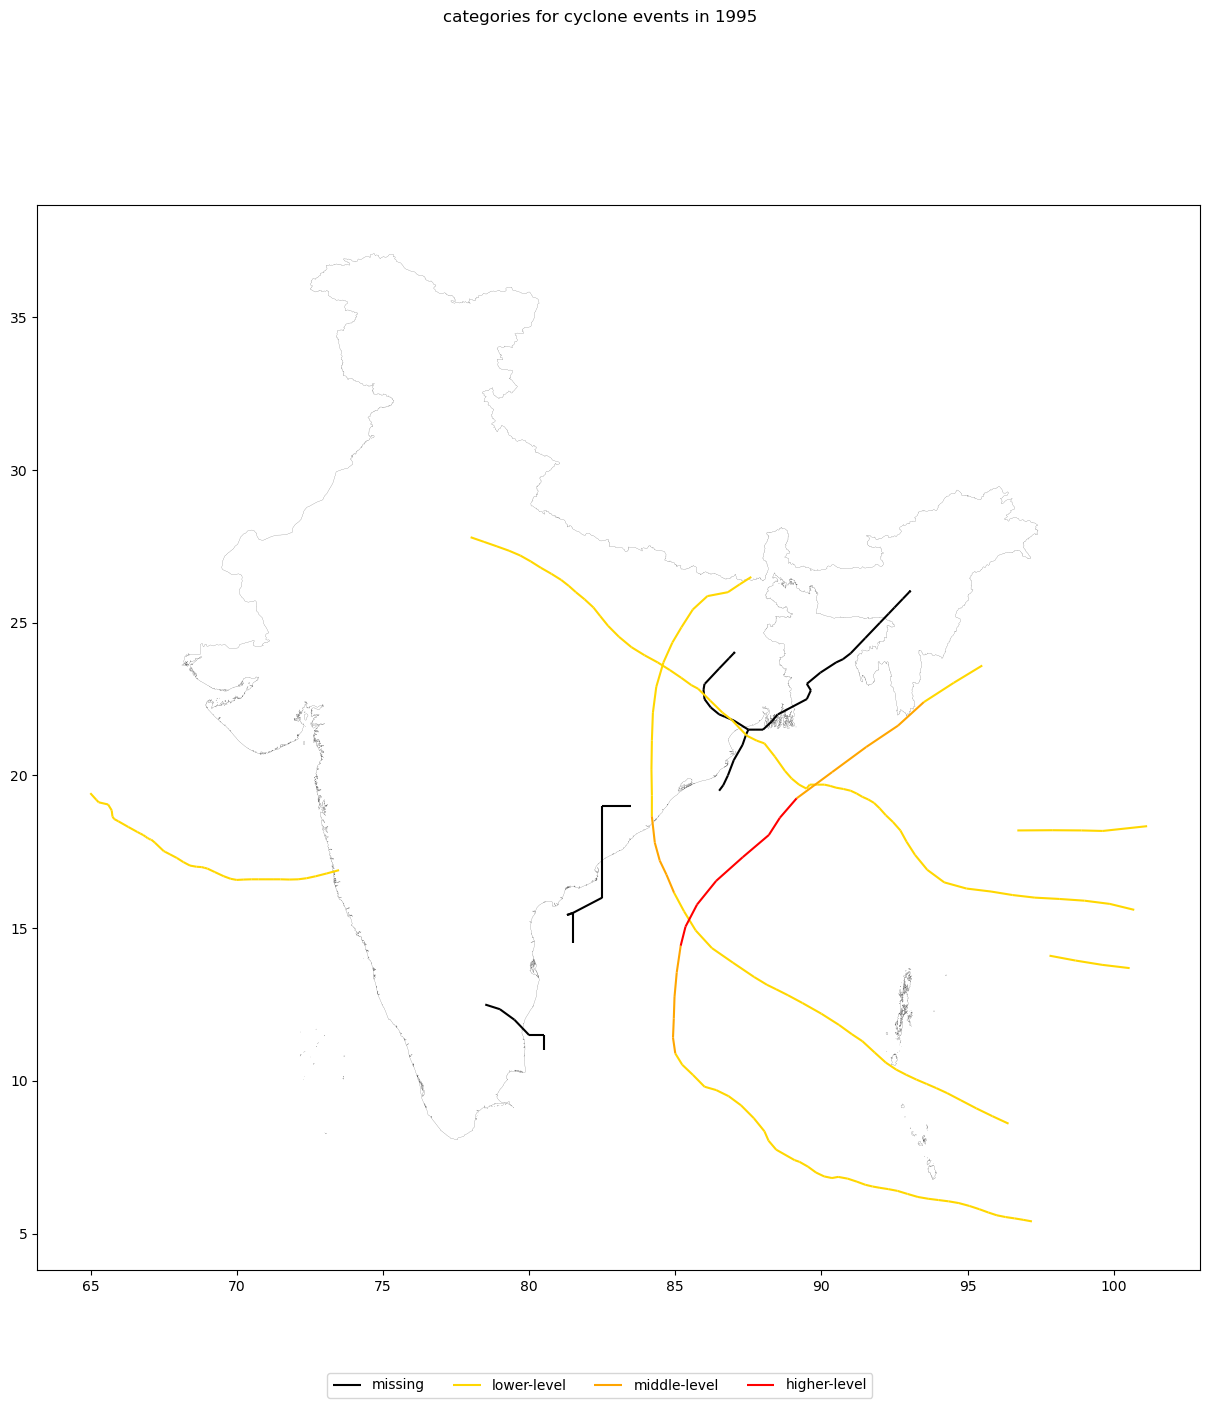

1995


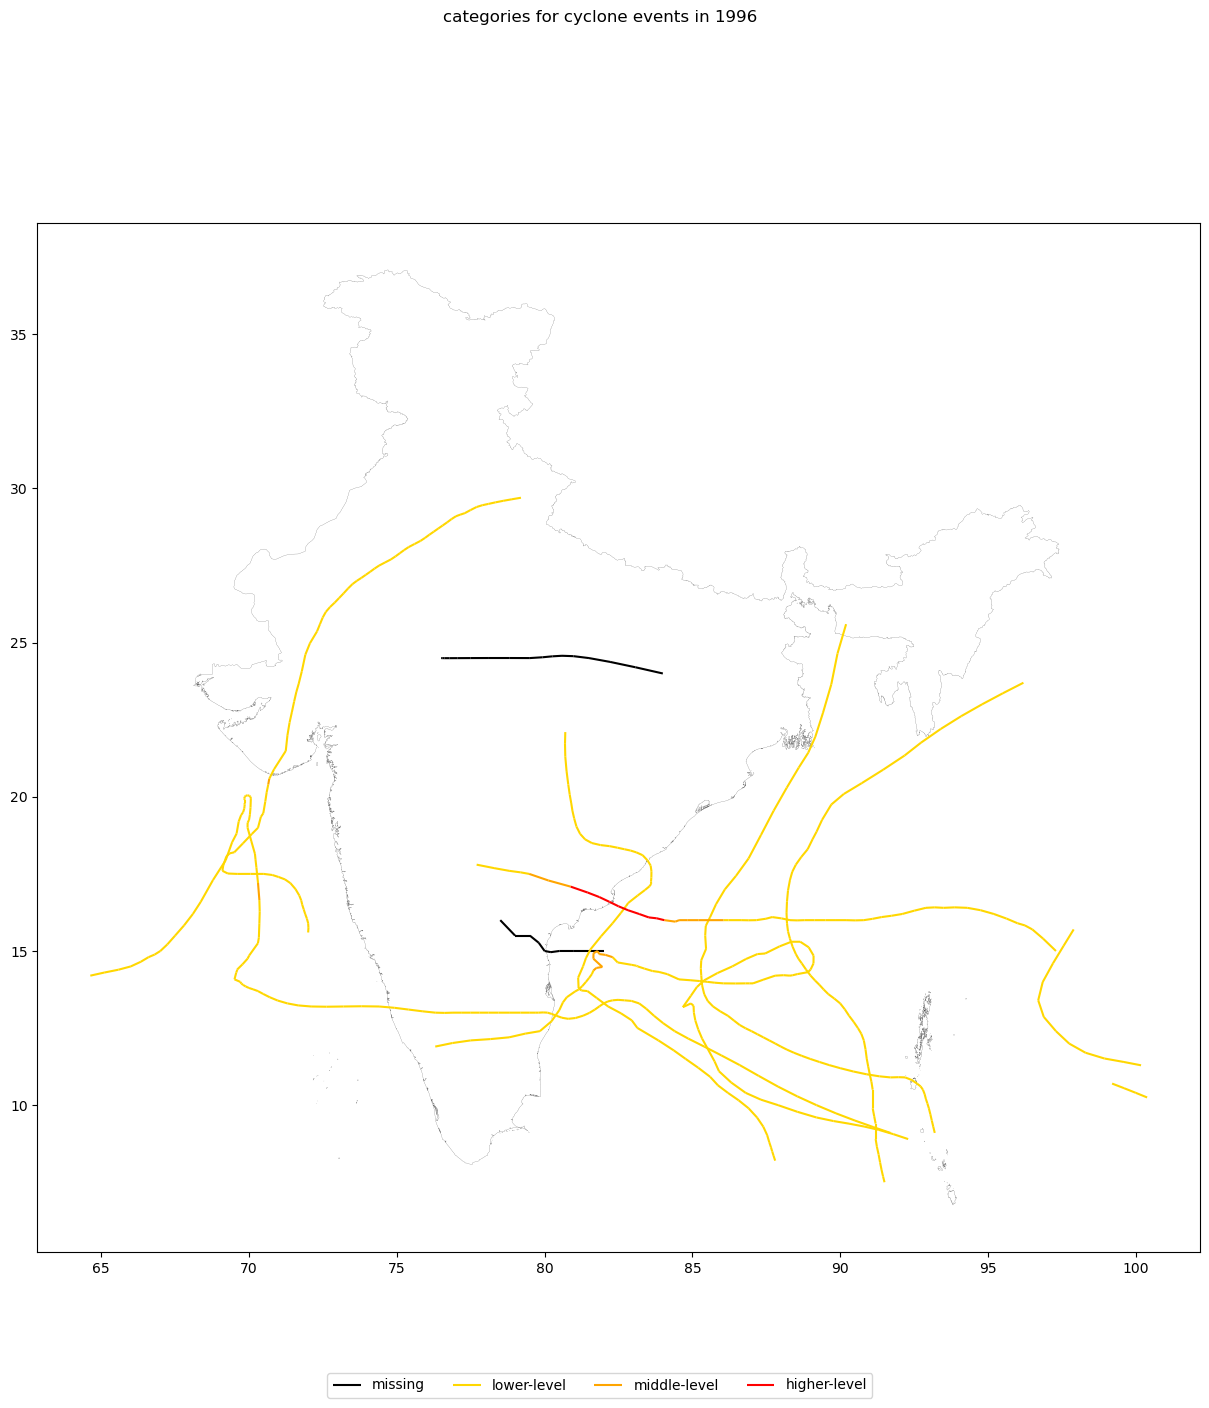

1996


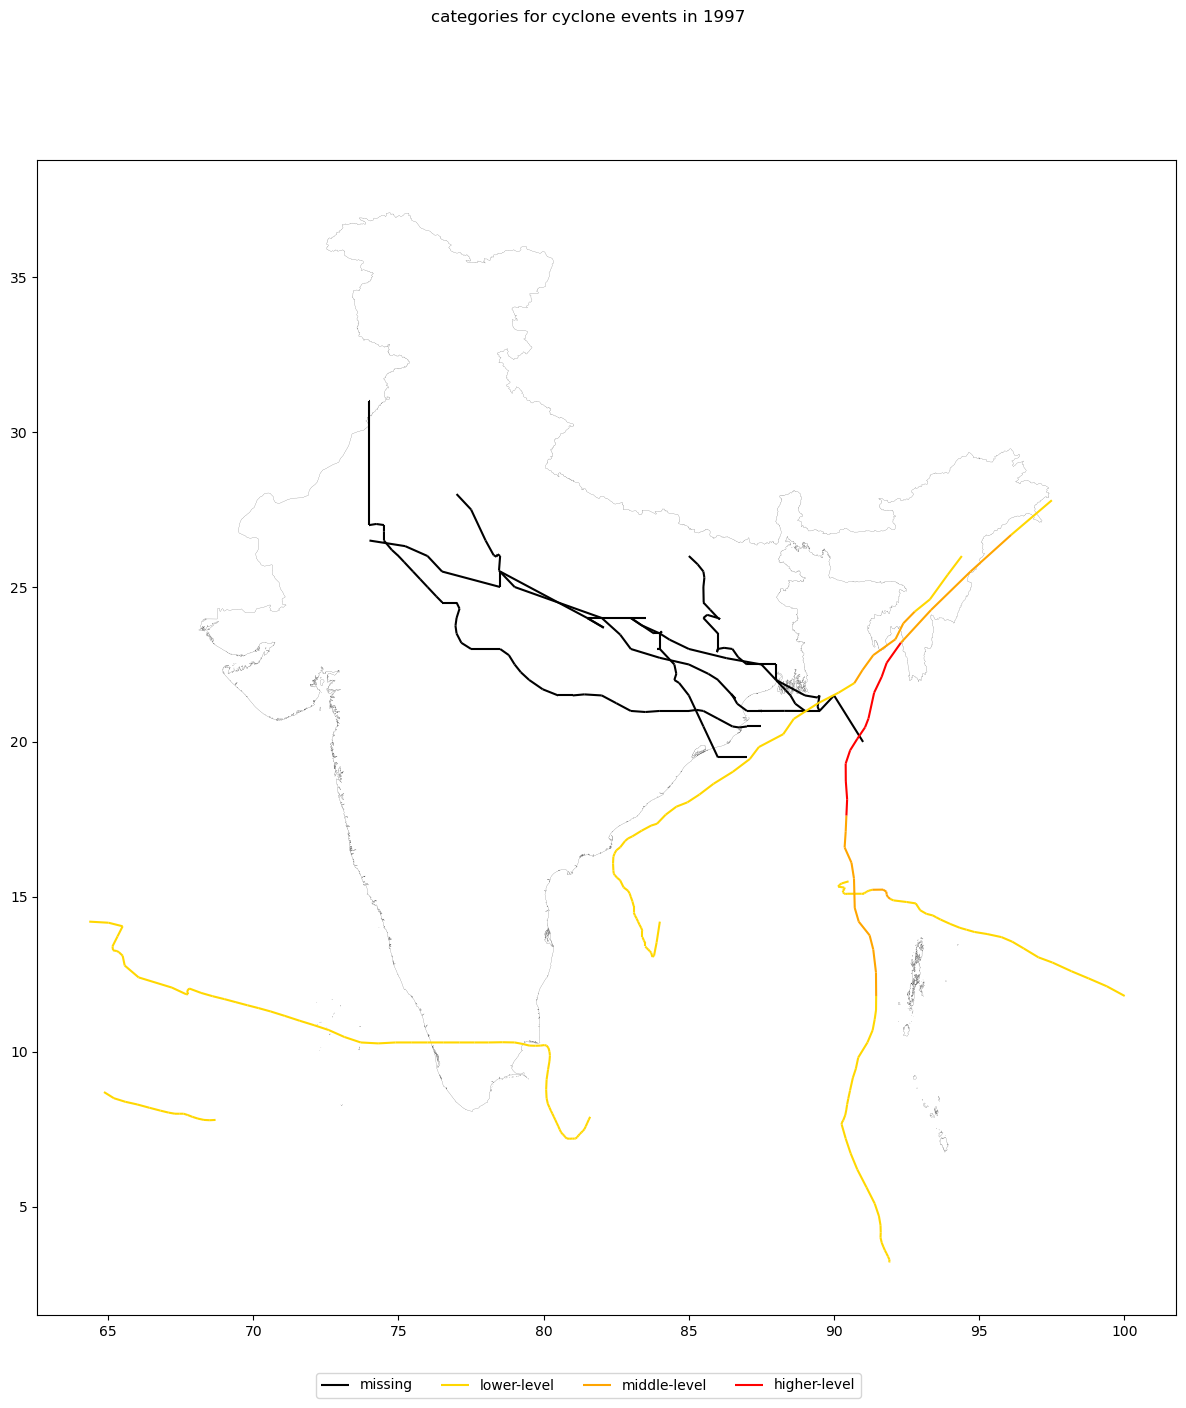

1997


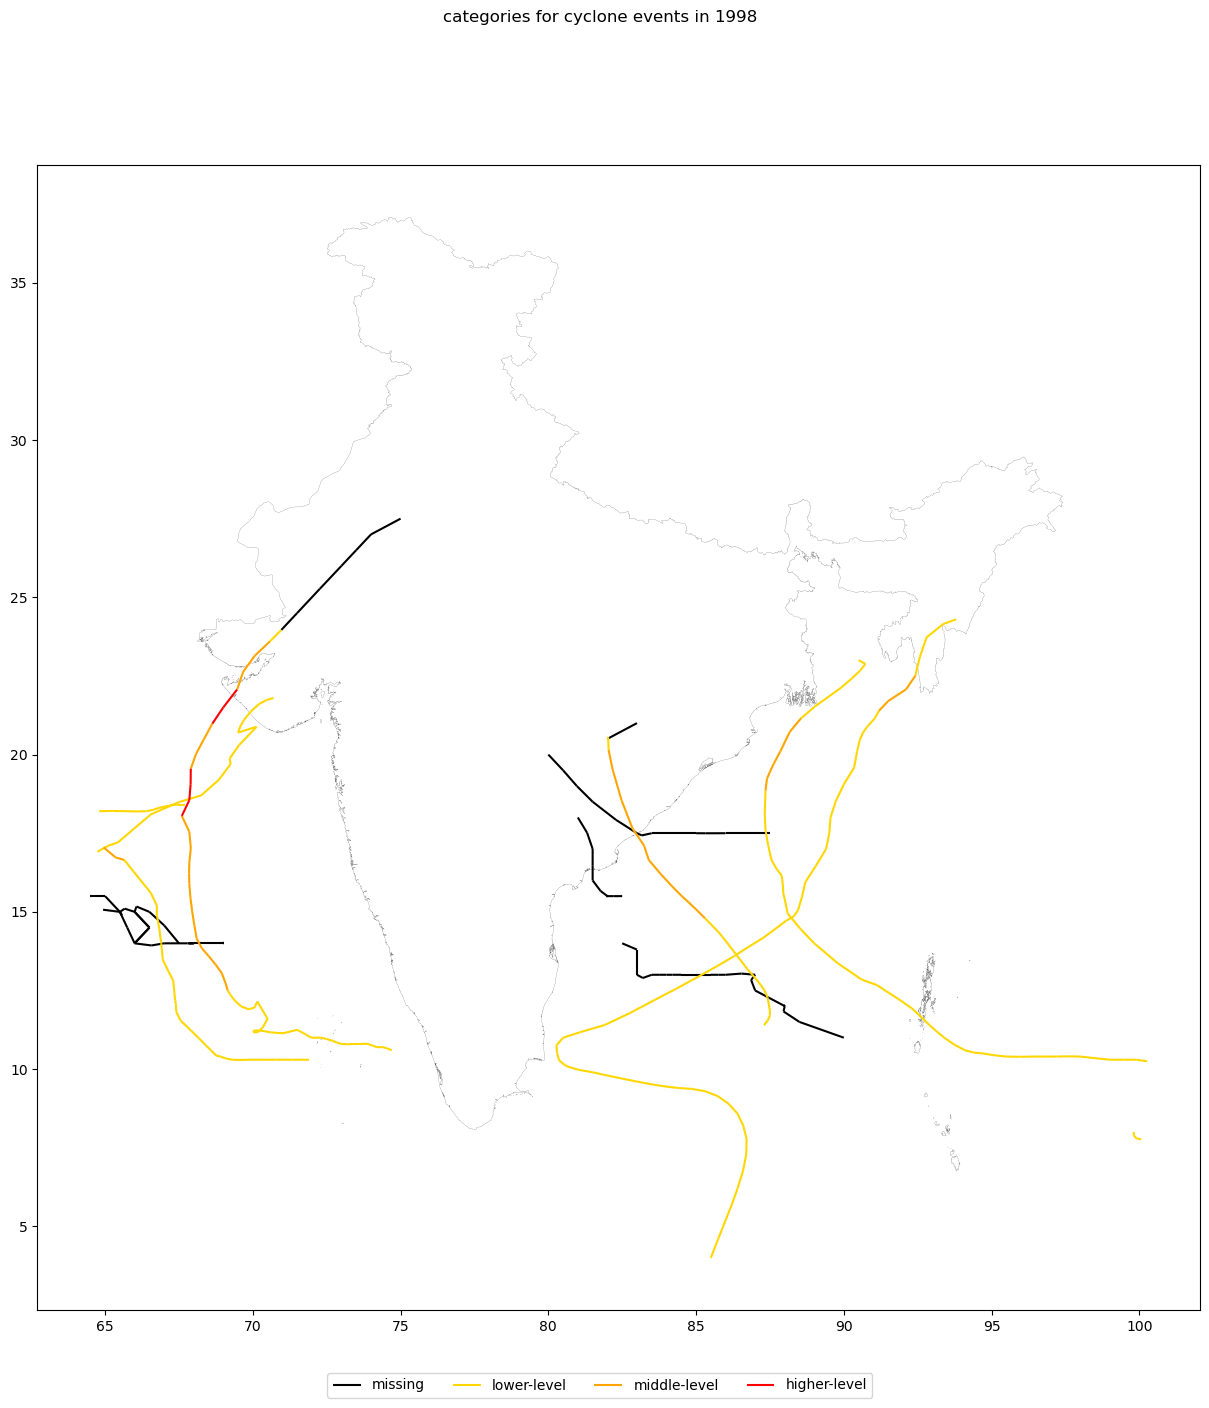

1998


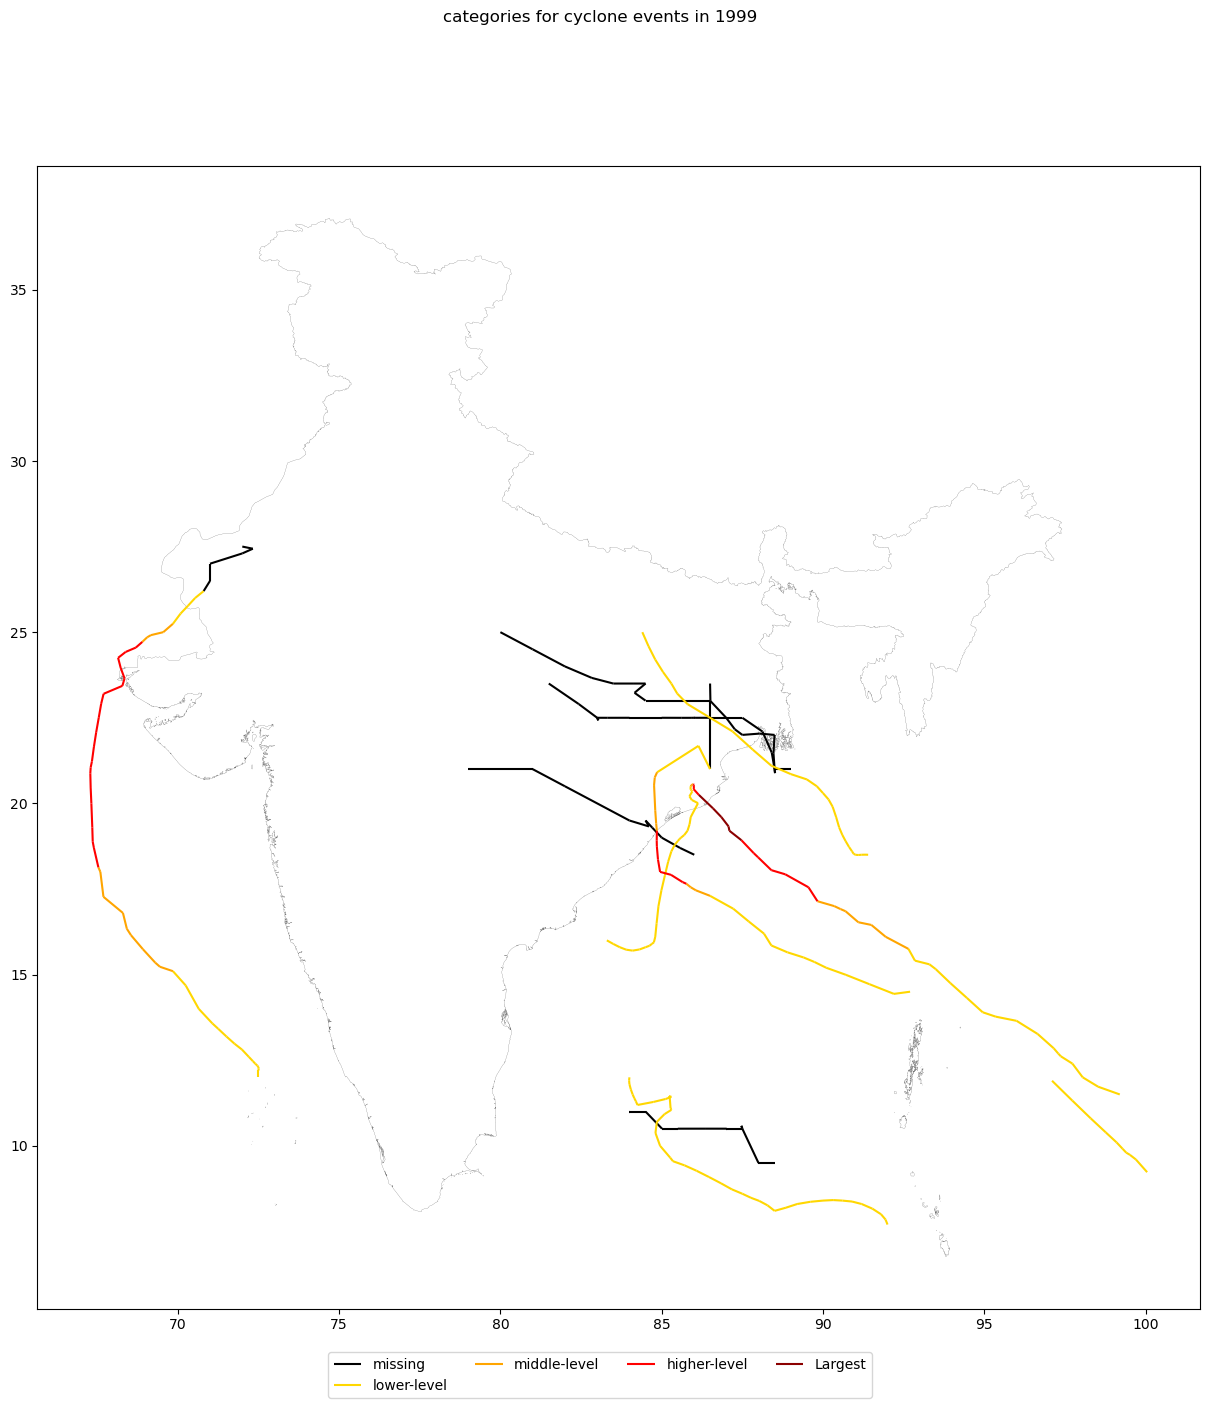

1999


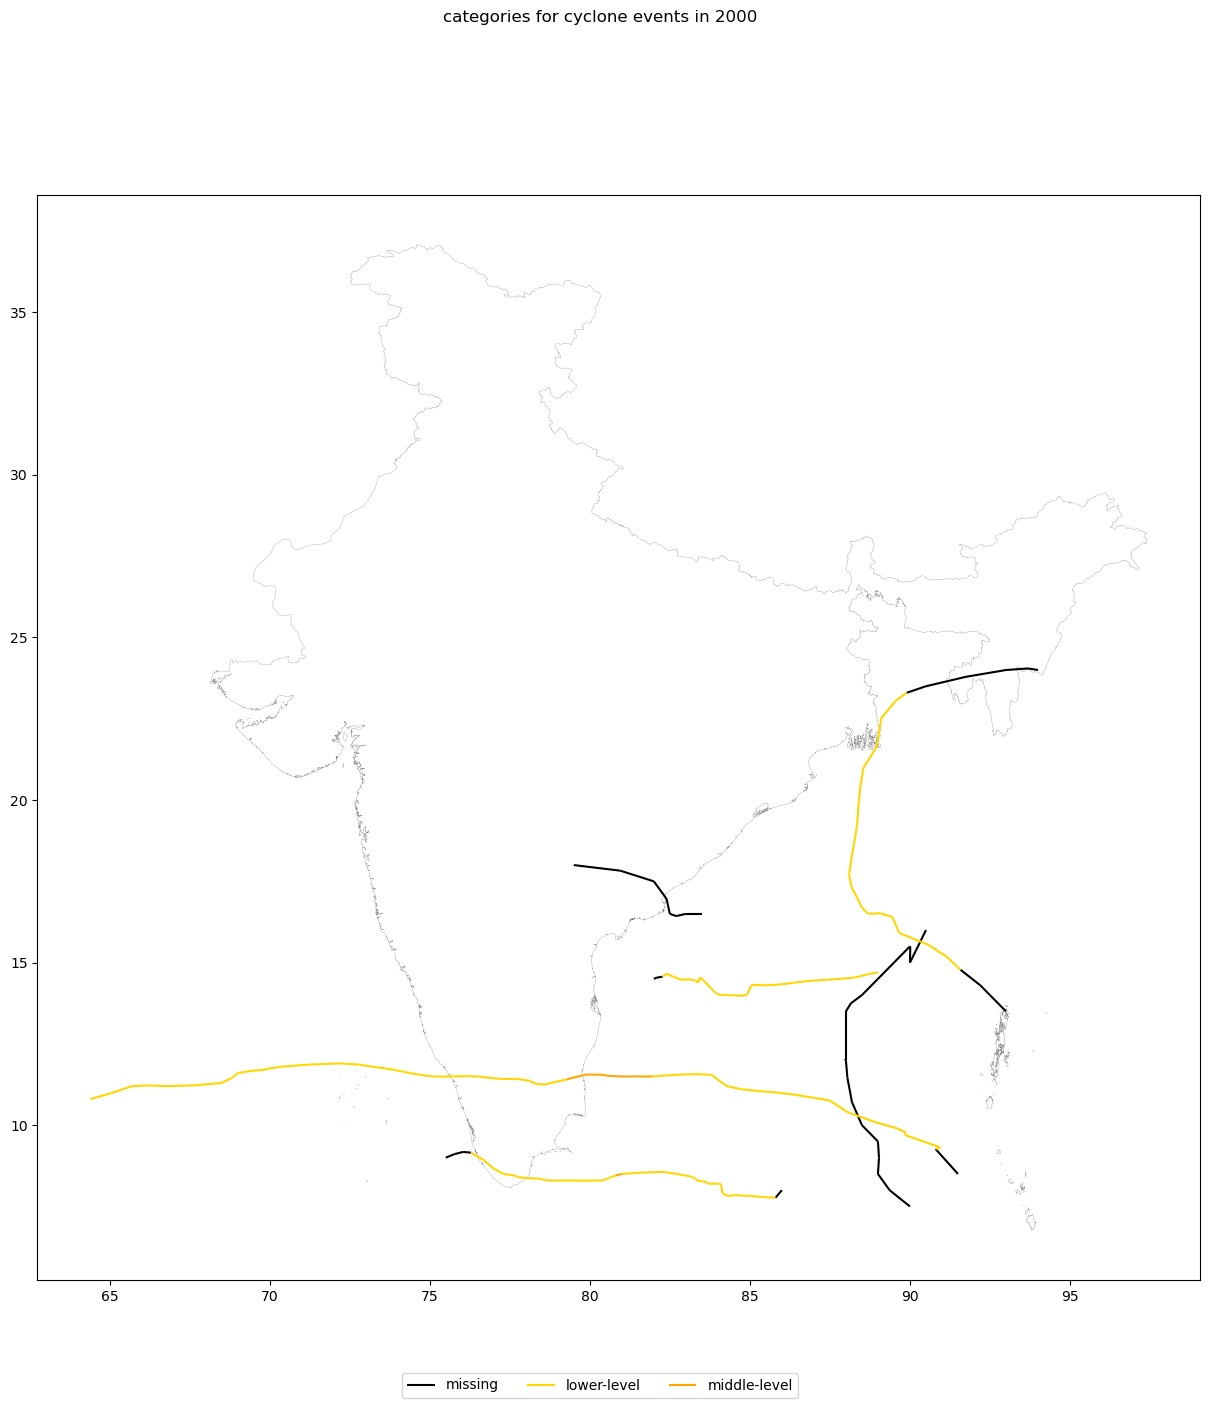

2000


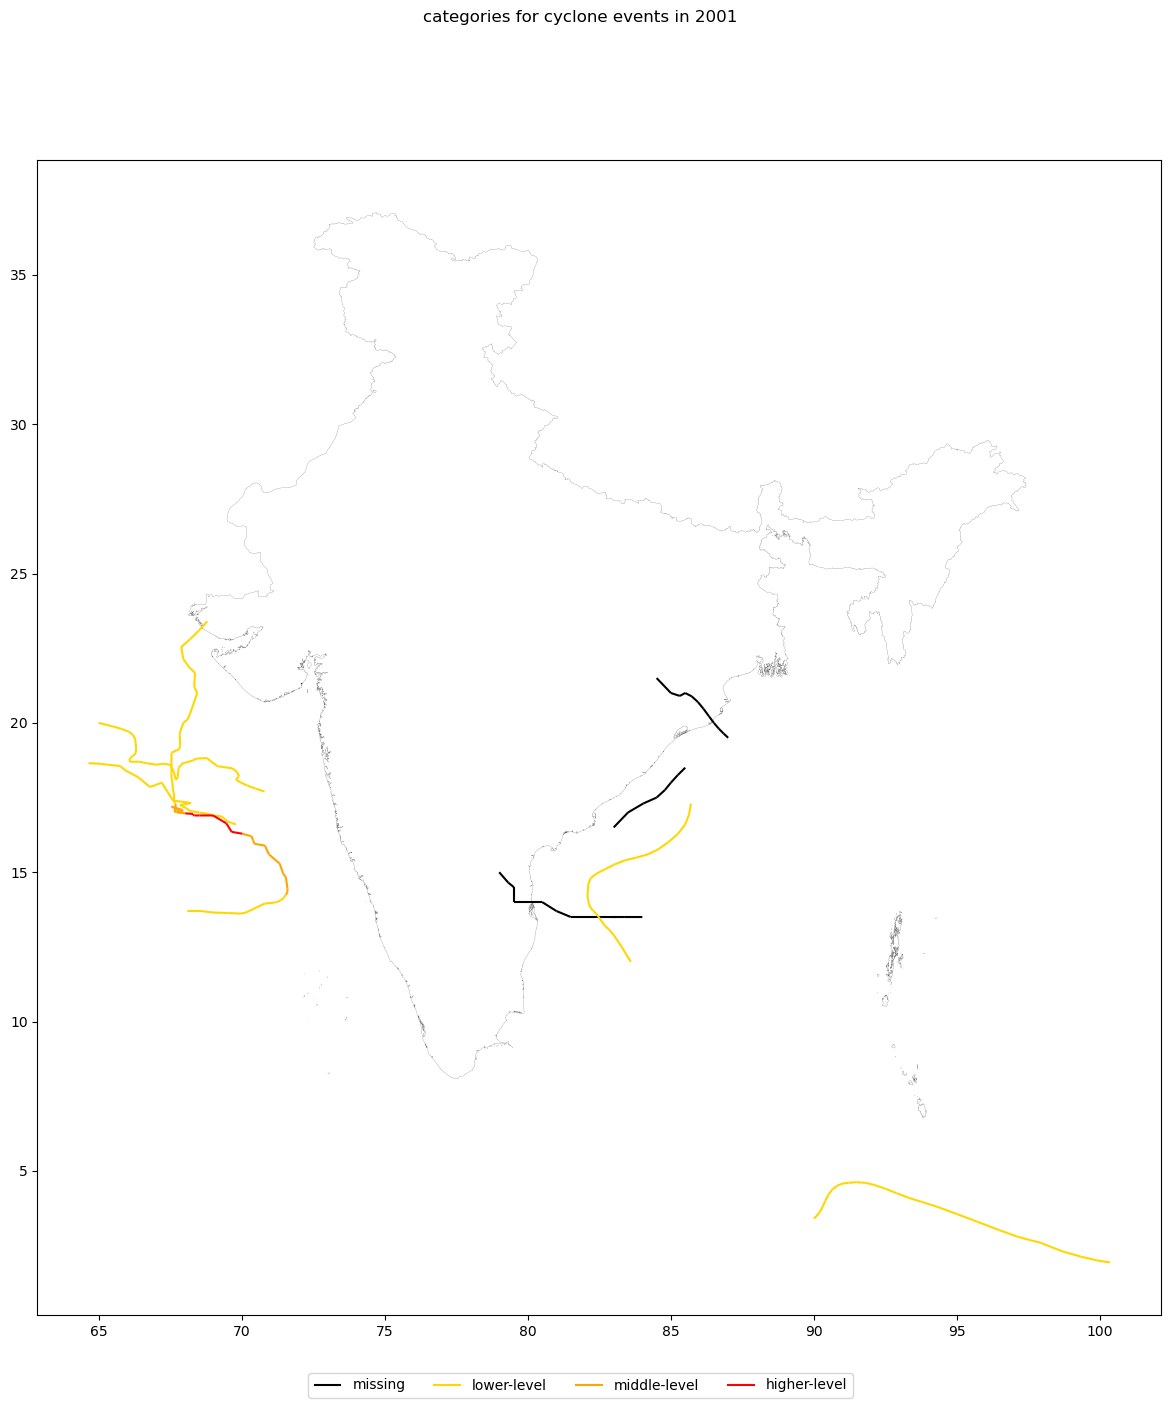

2001


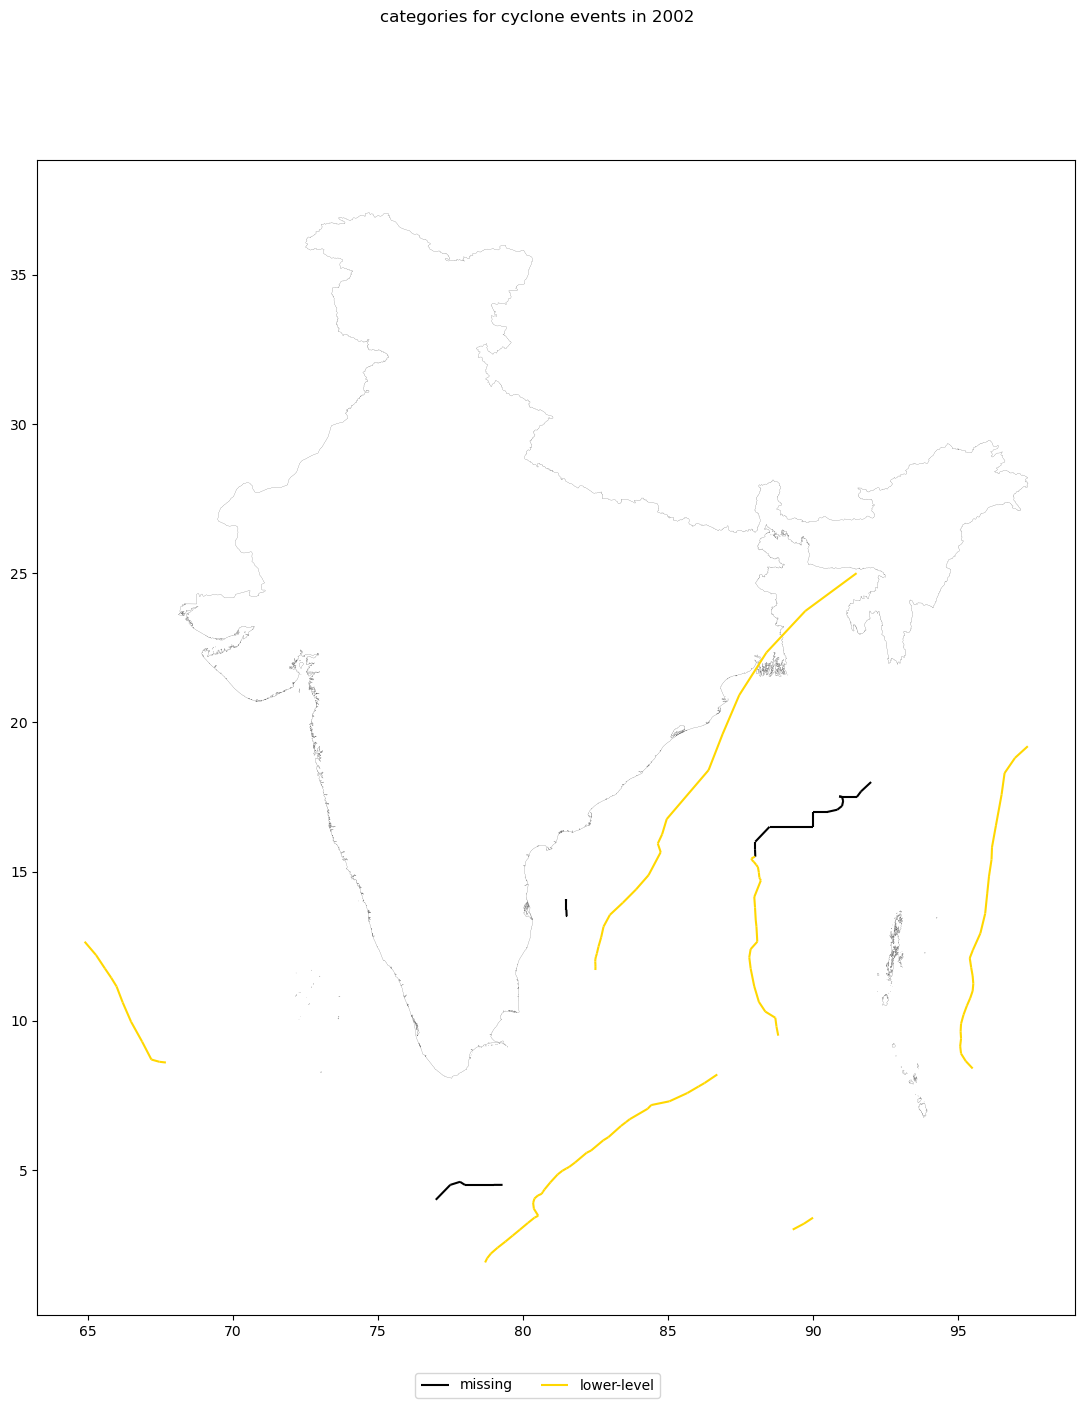

2002


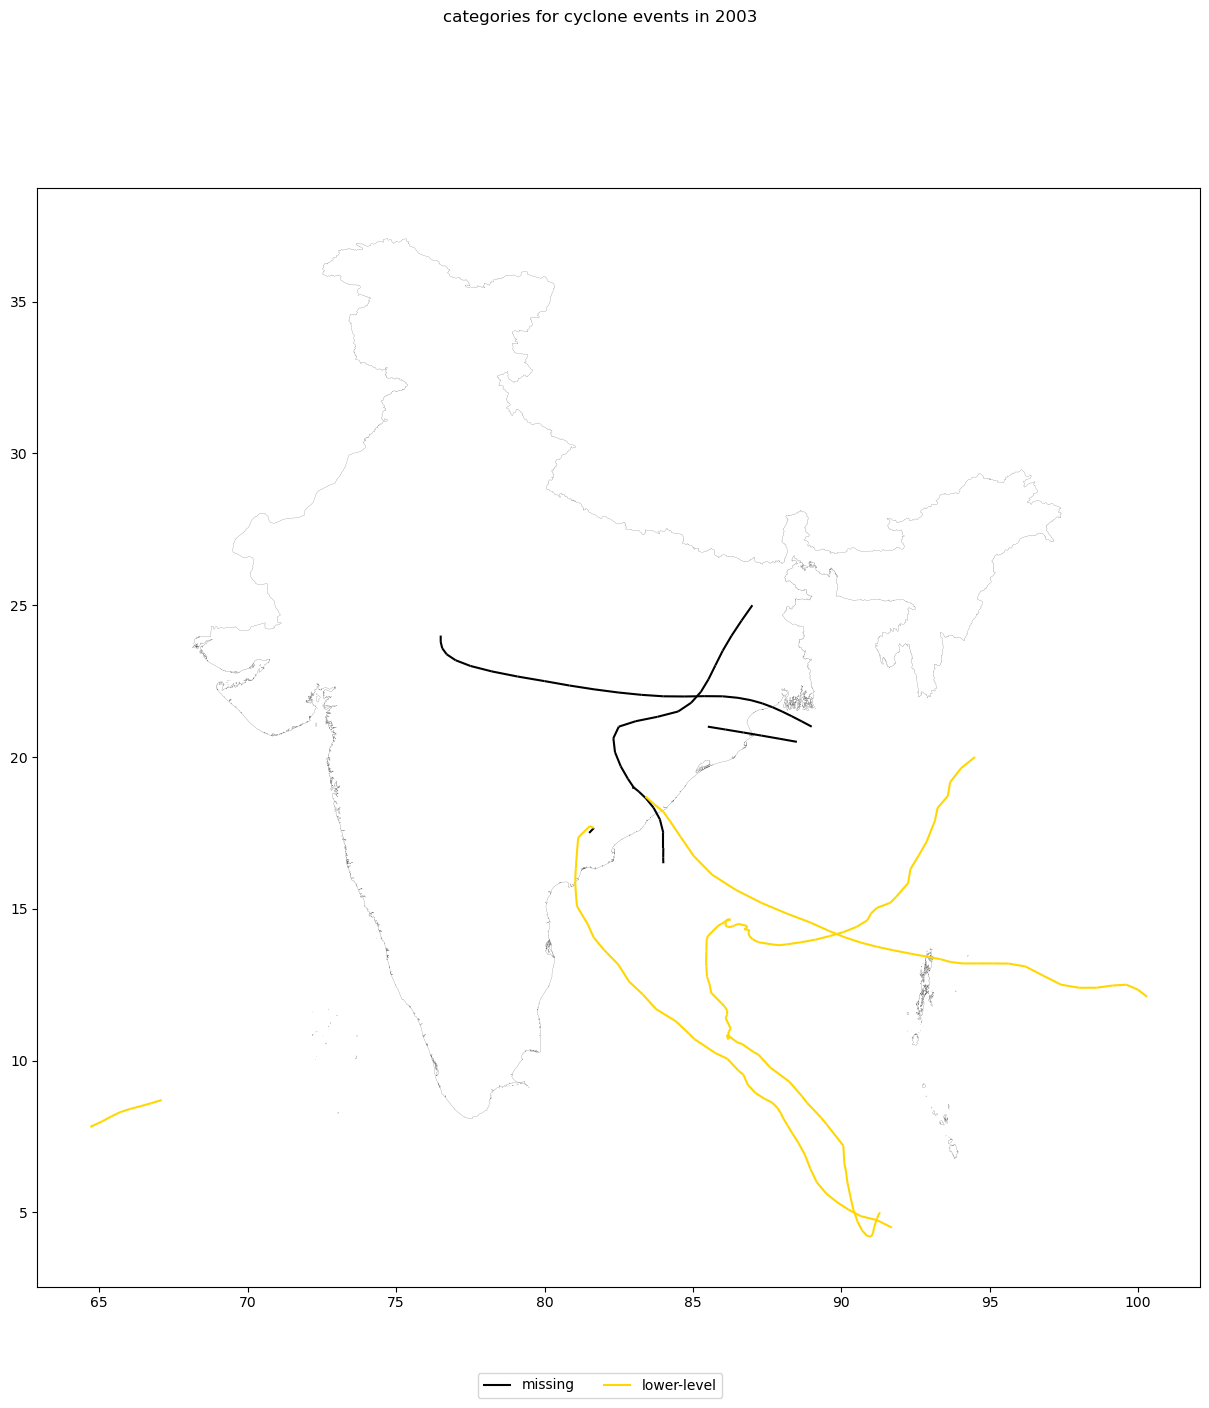

2003


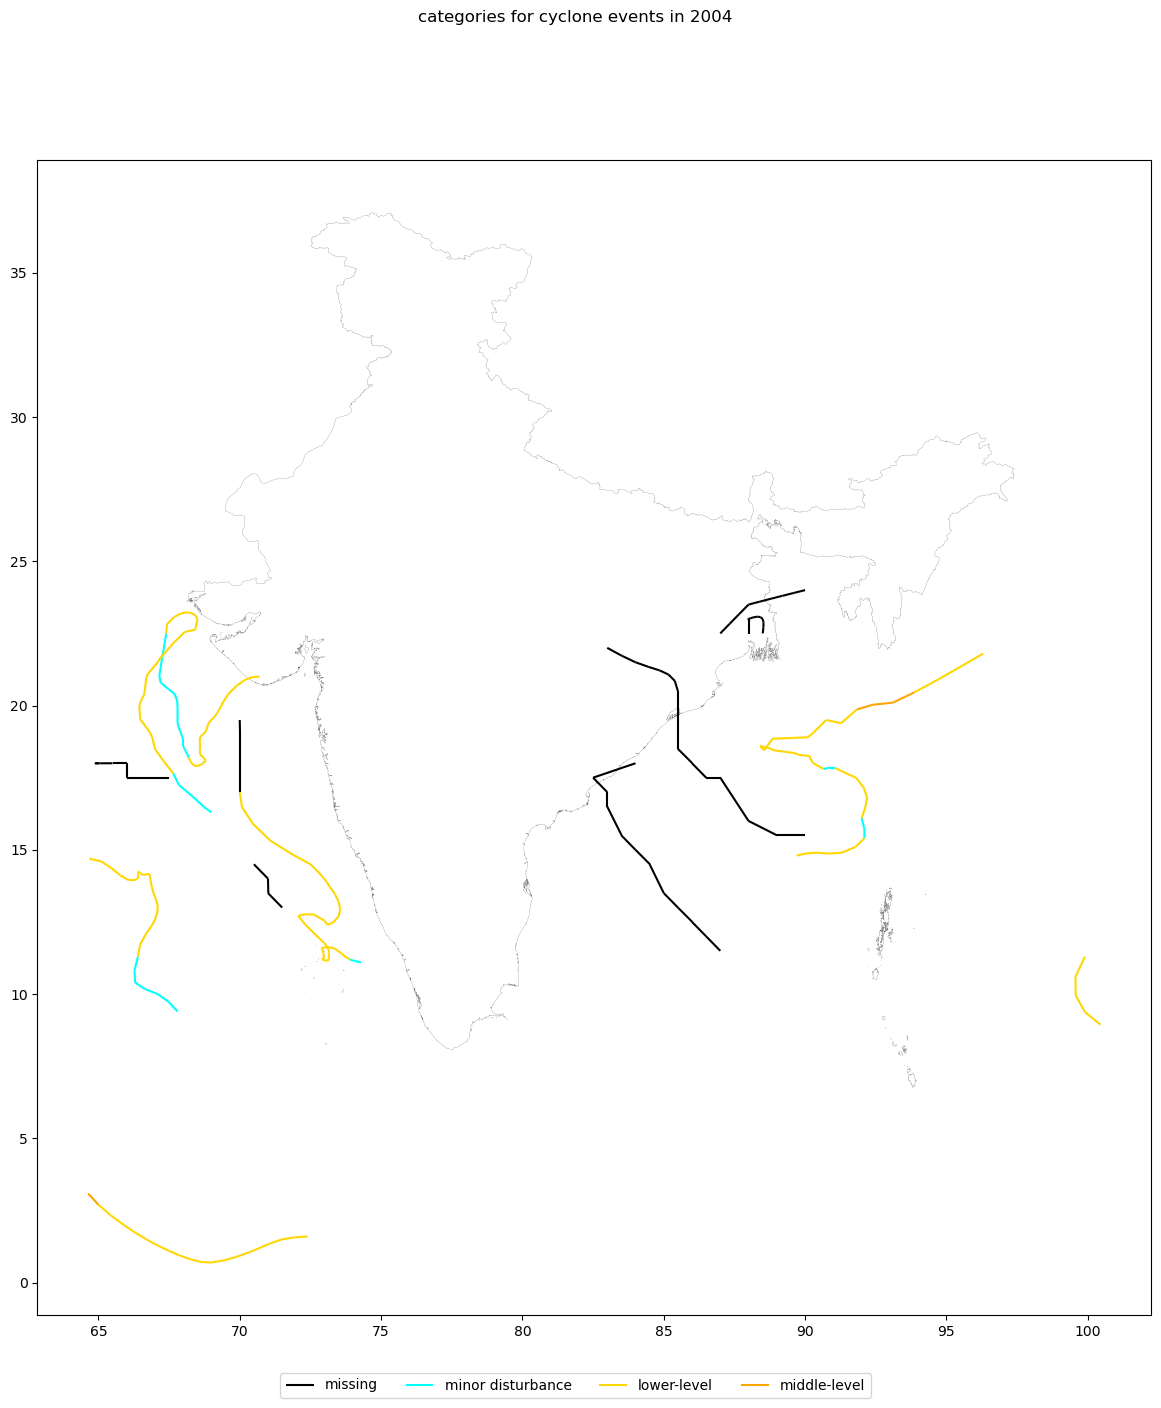

2004


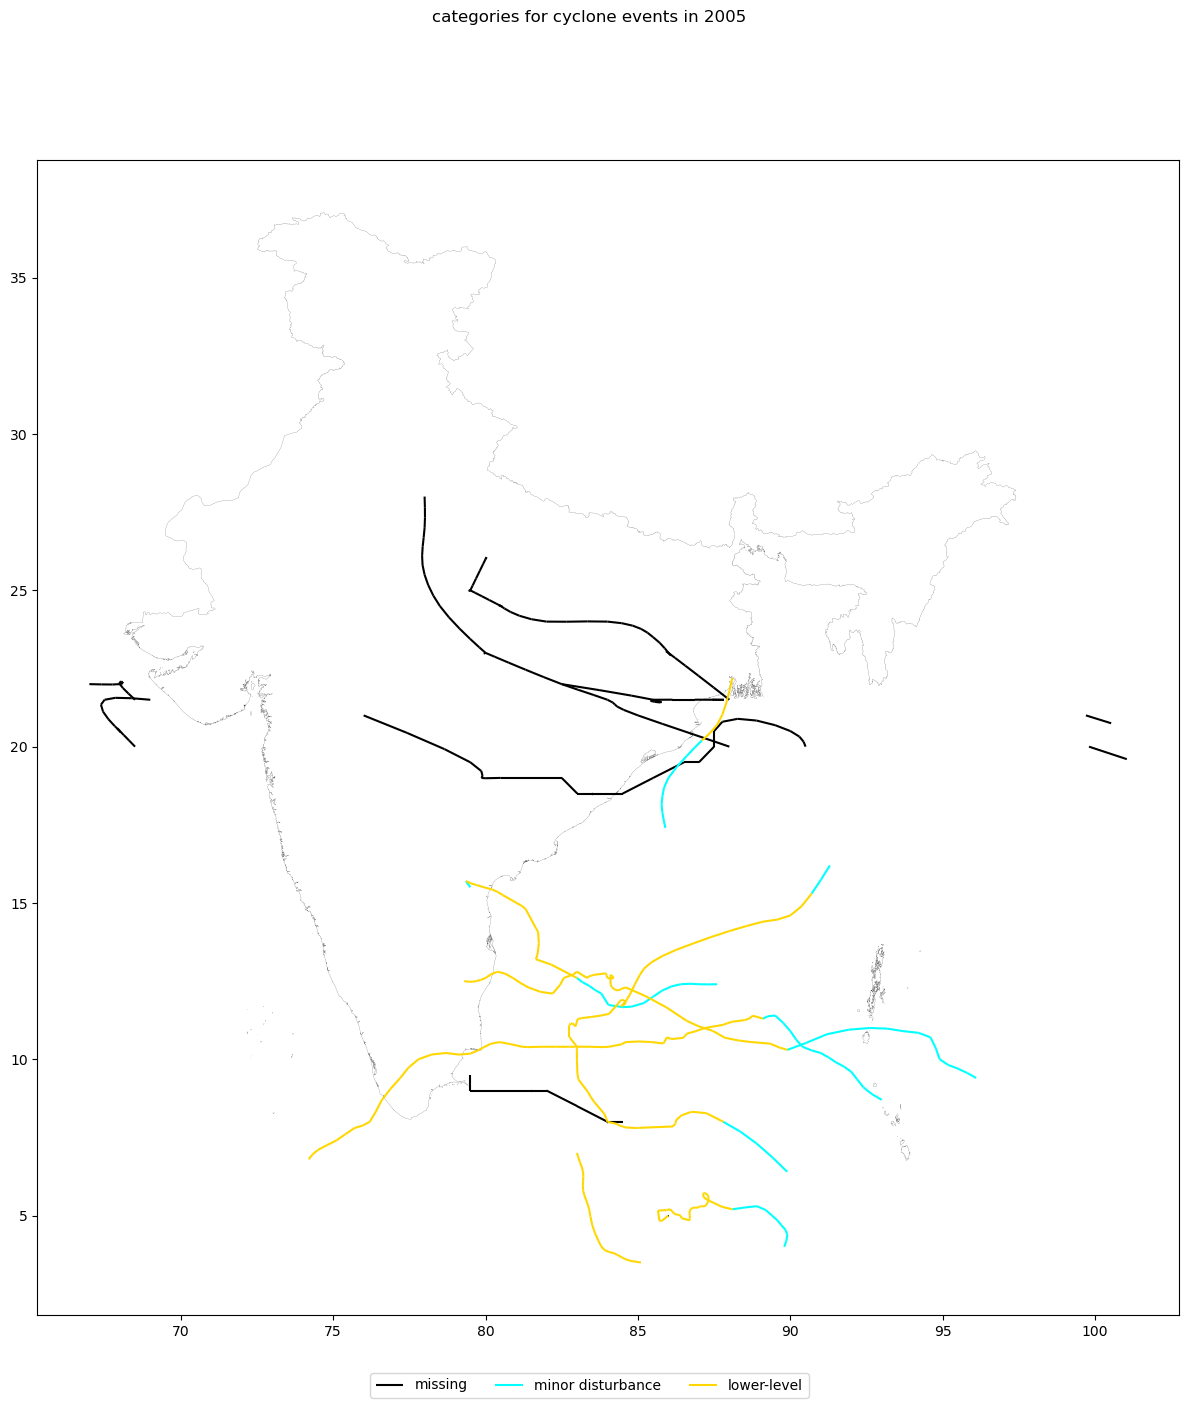

2005


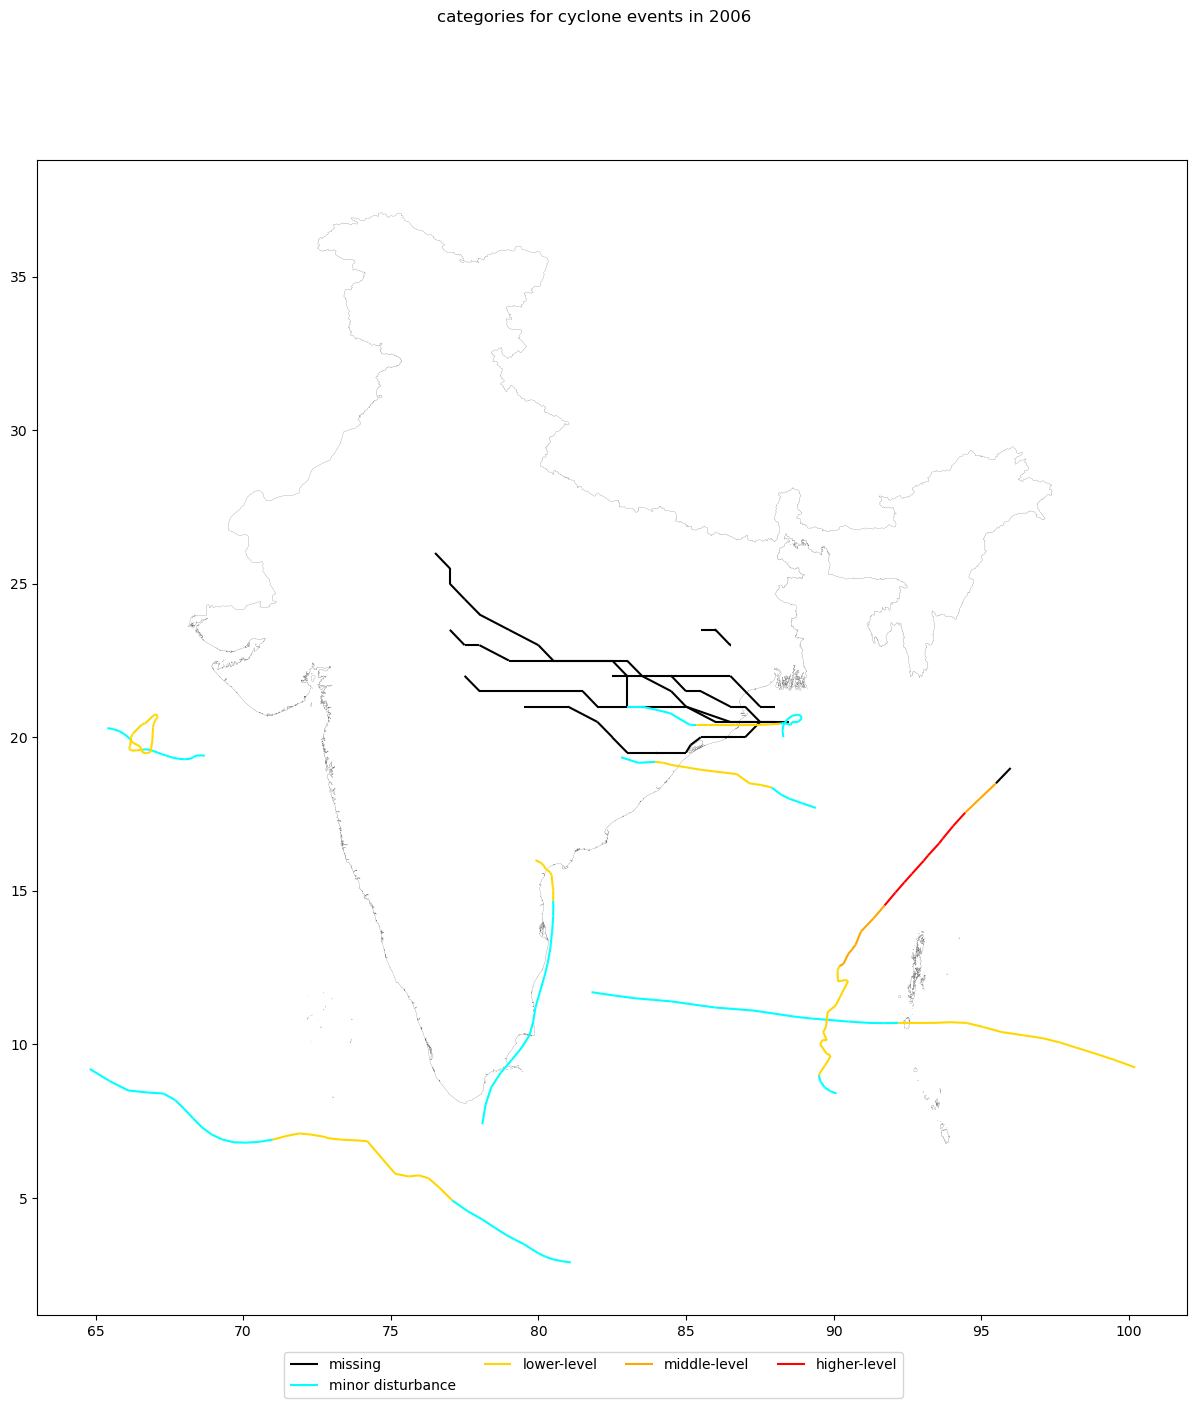

2006


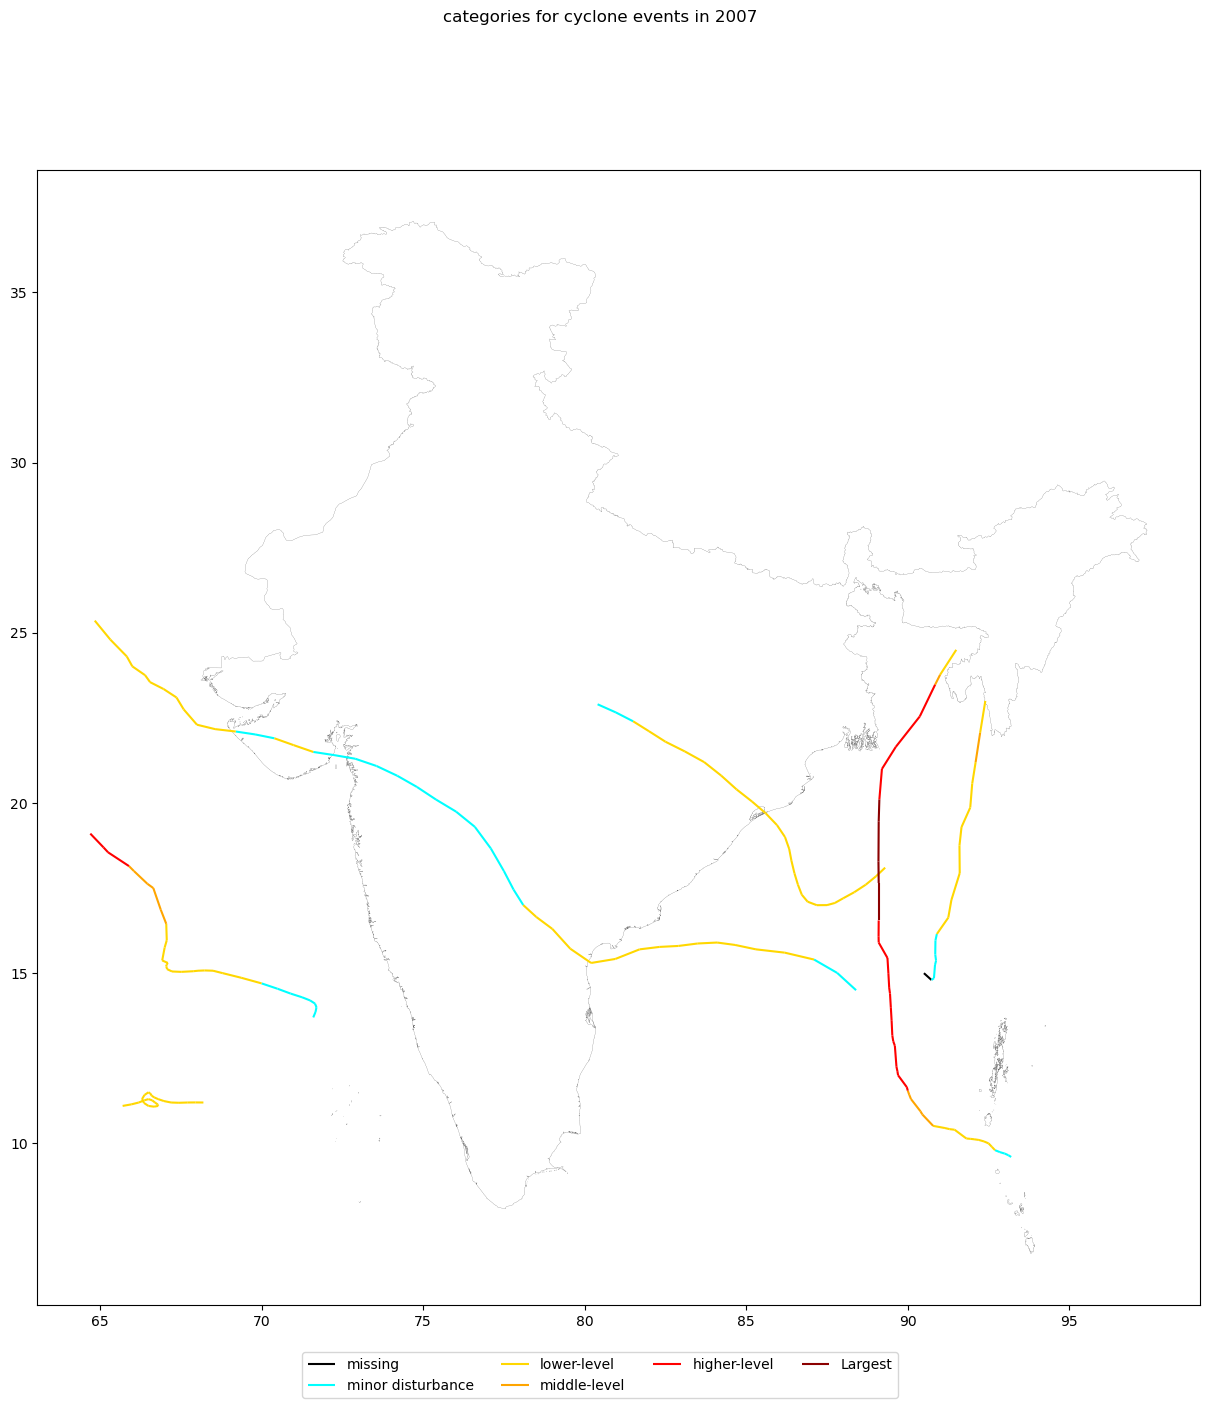

2007


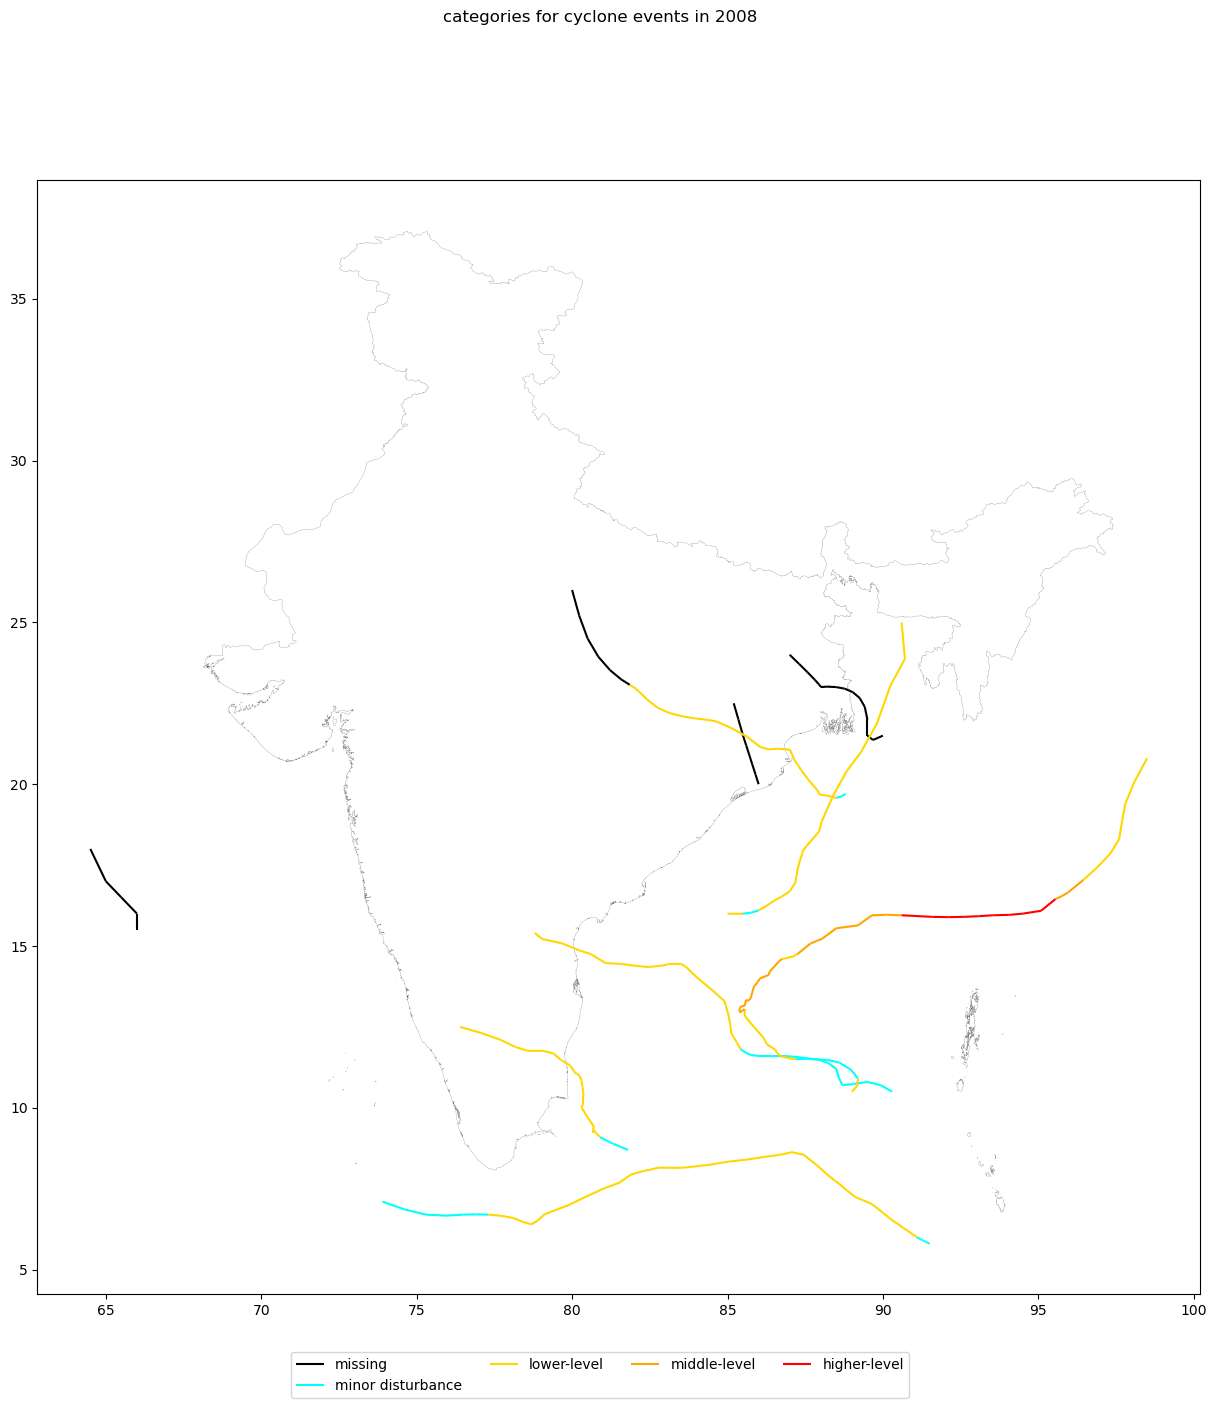

2008


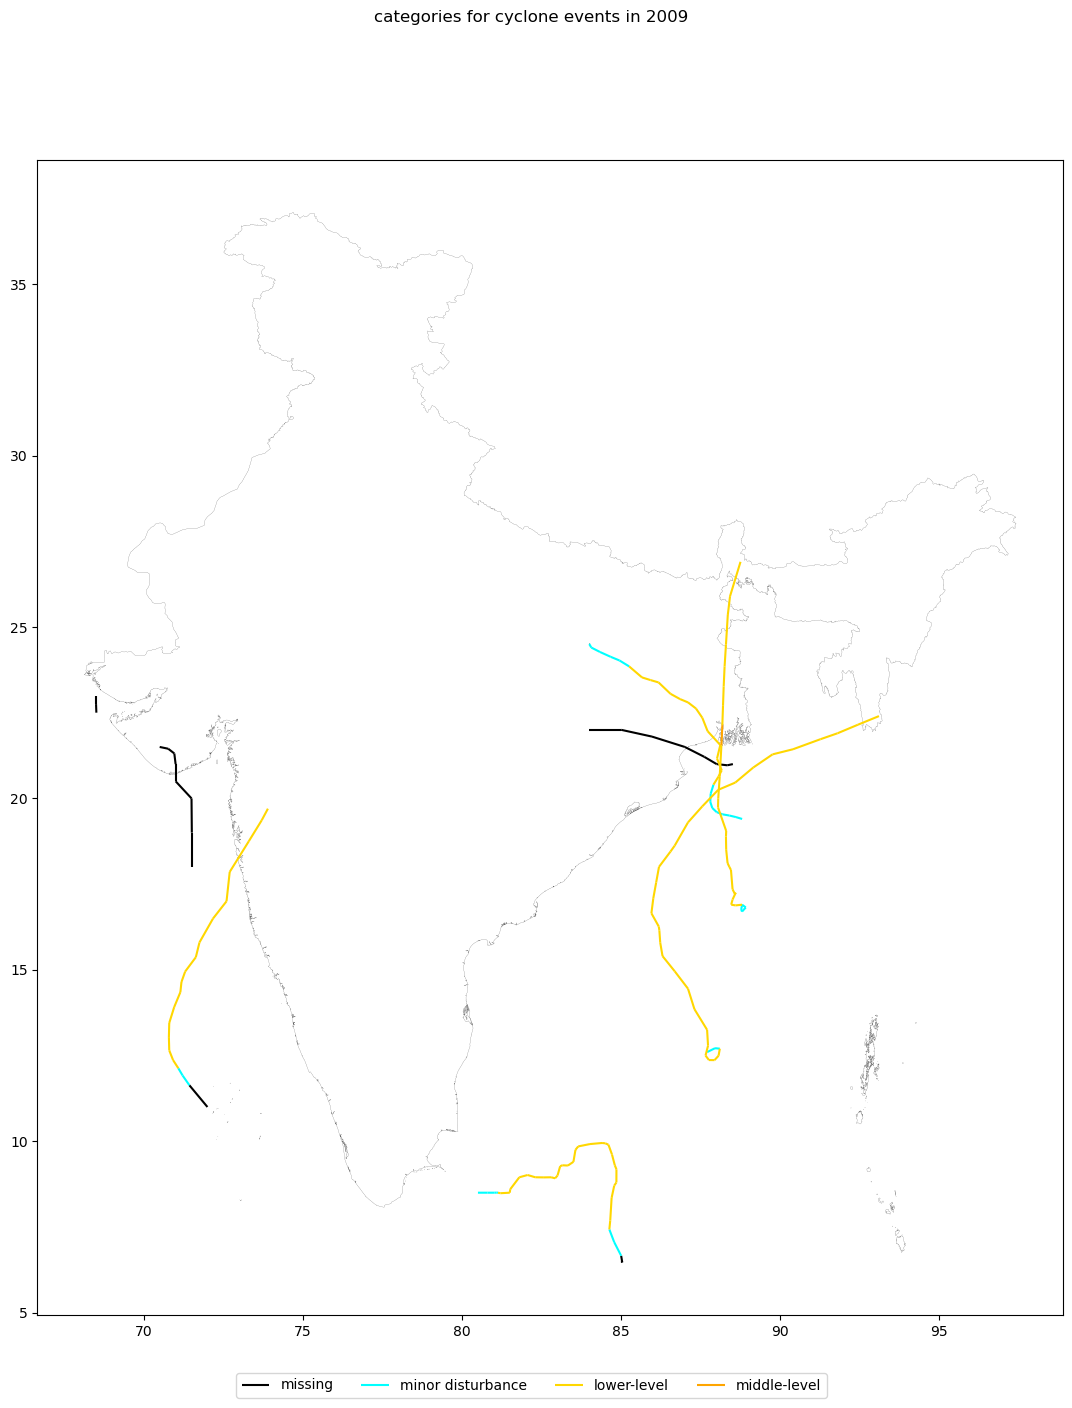

2009


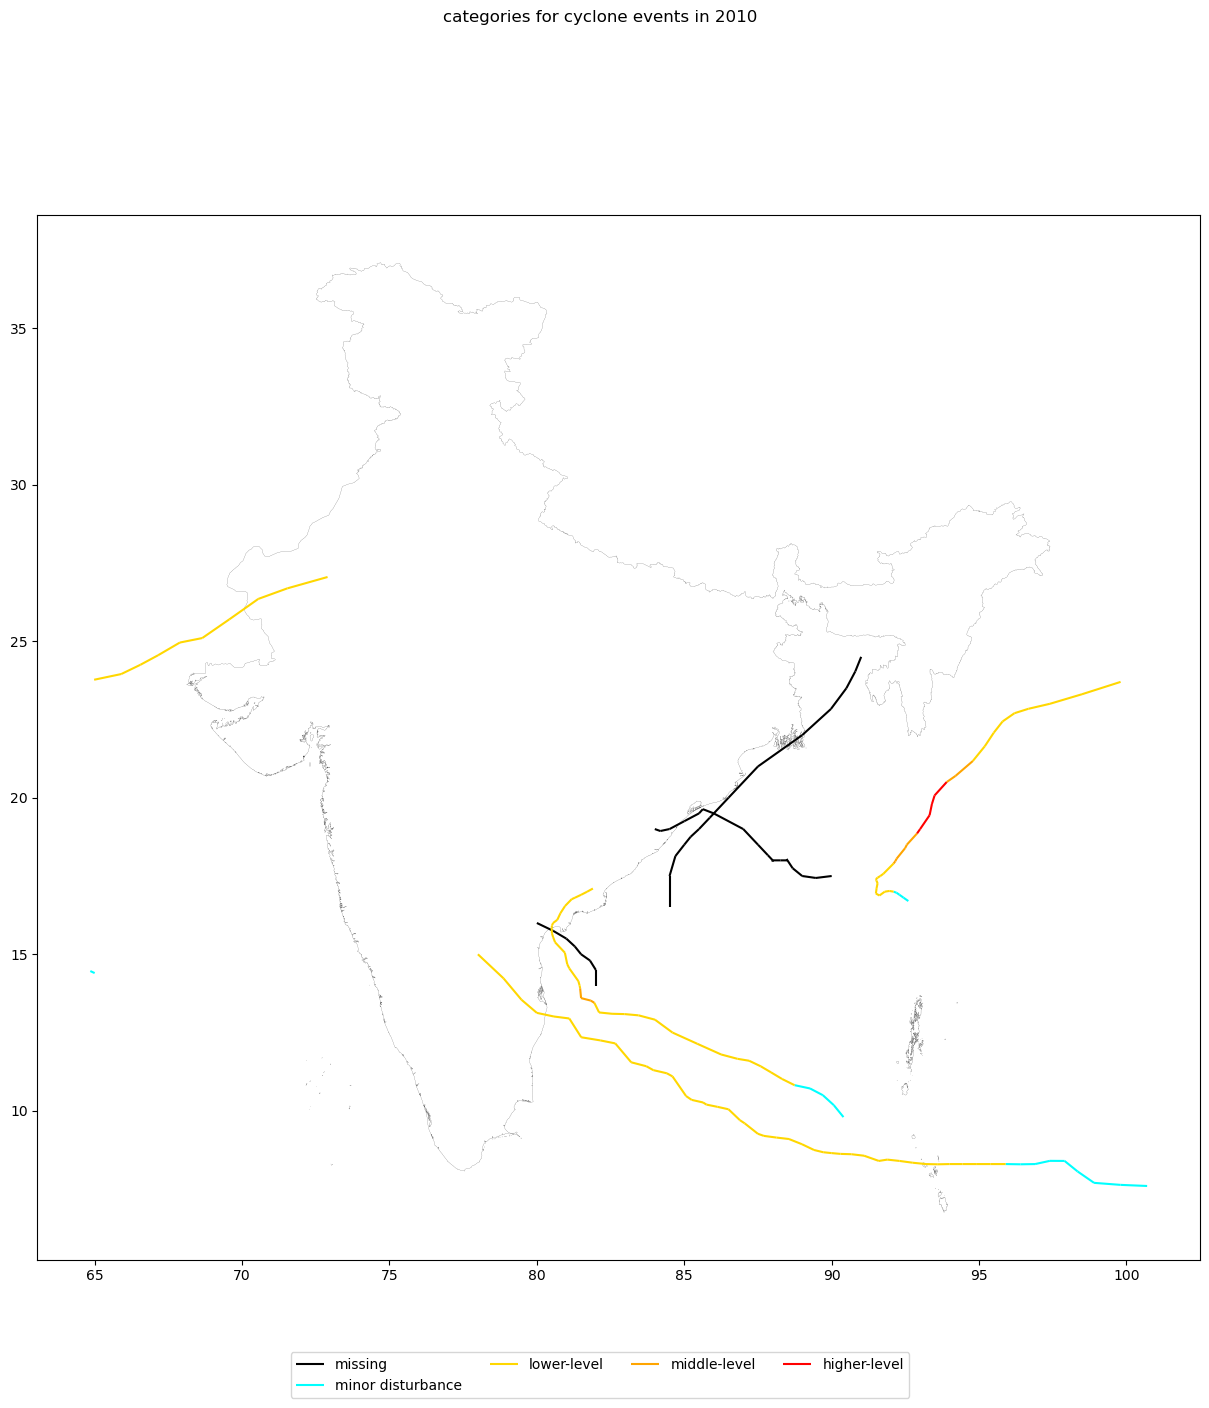

2010


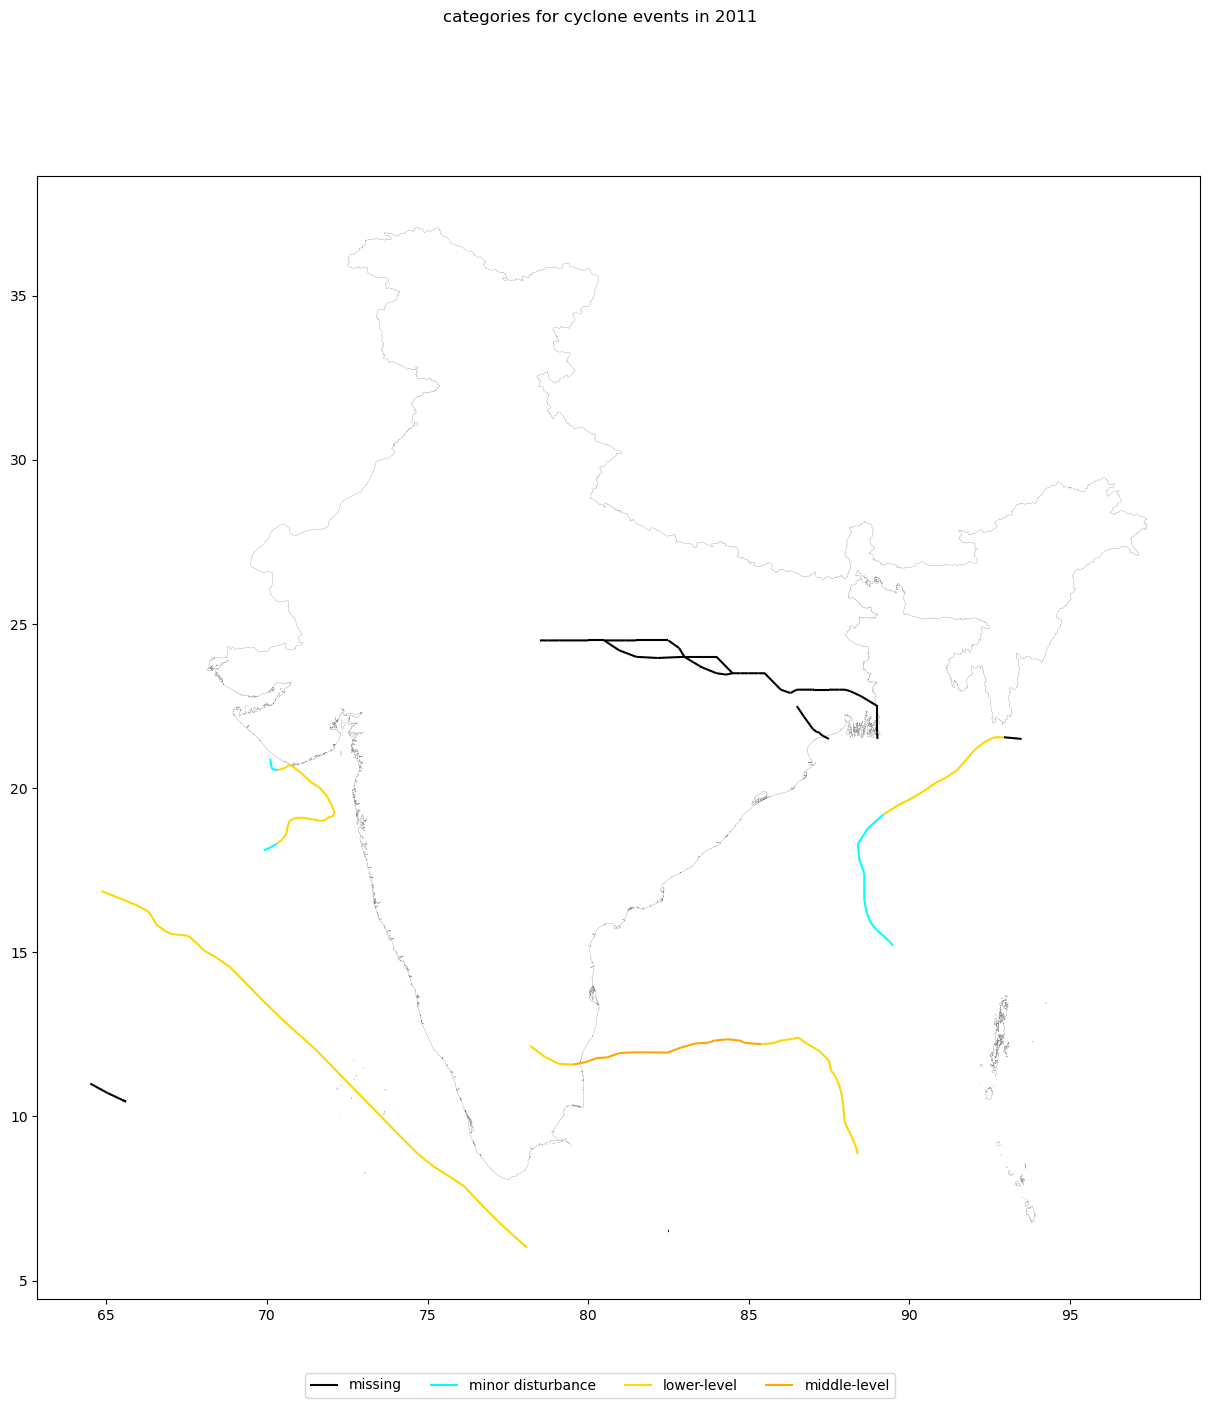

2011


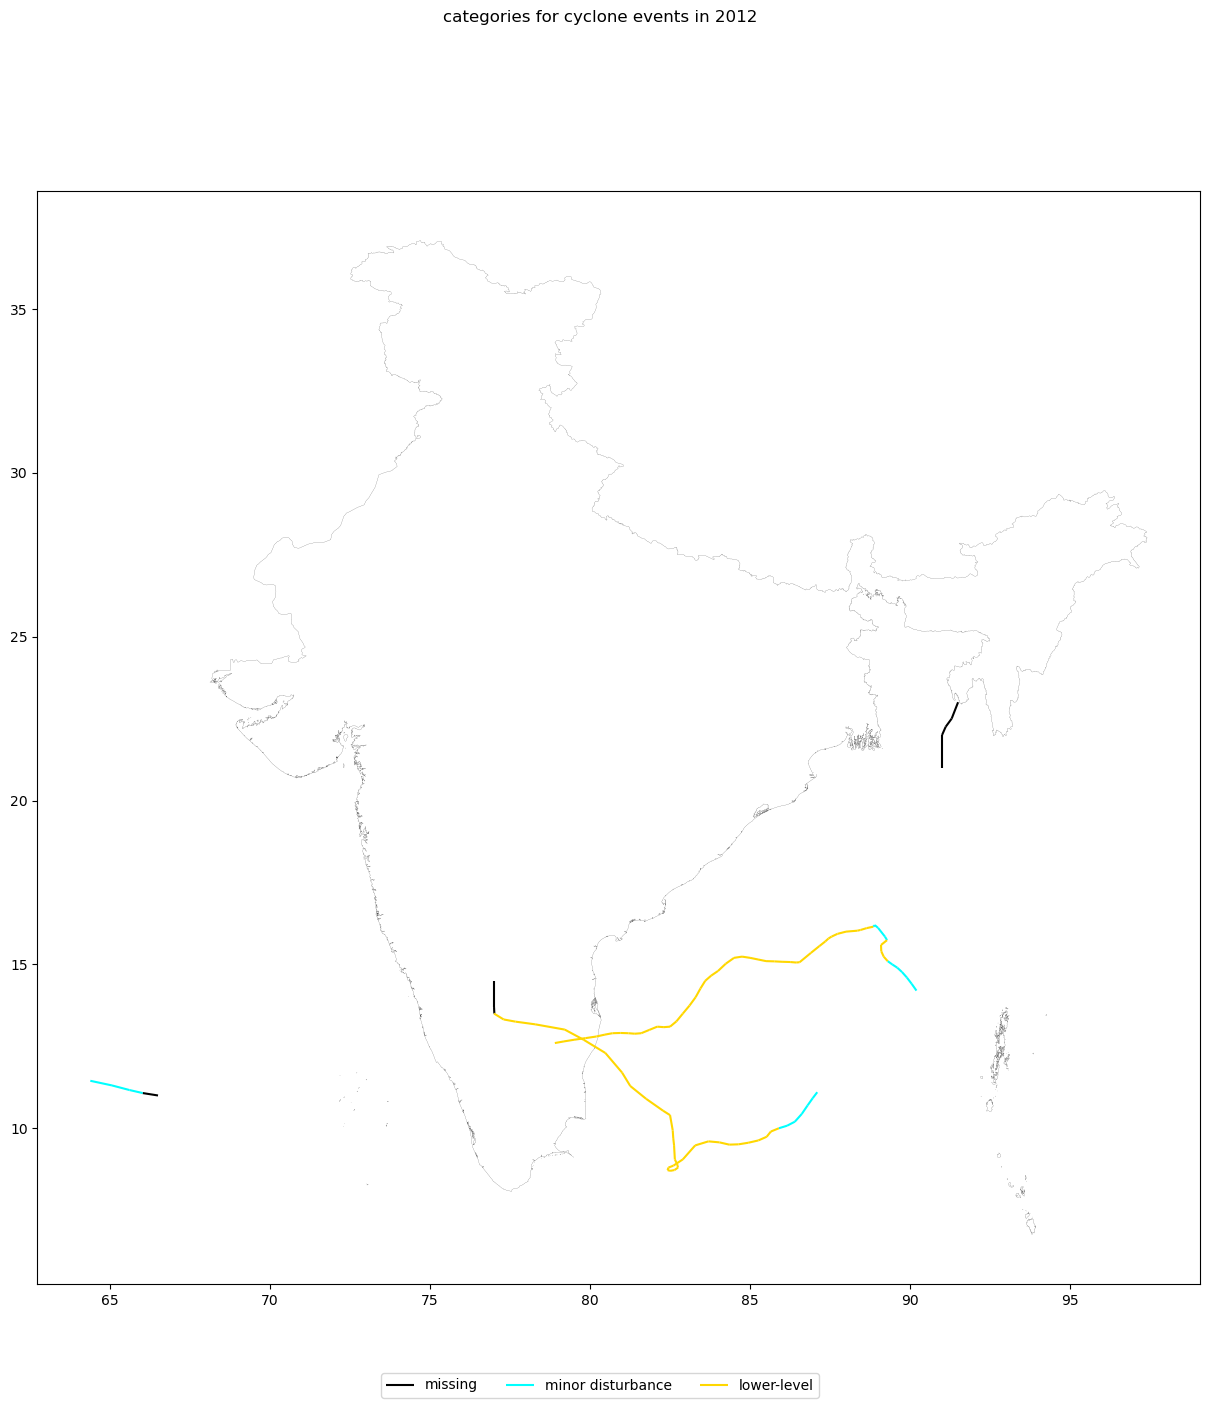

2012


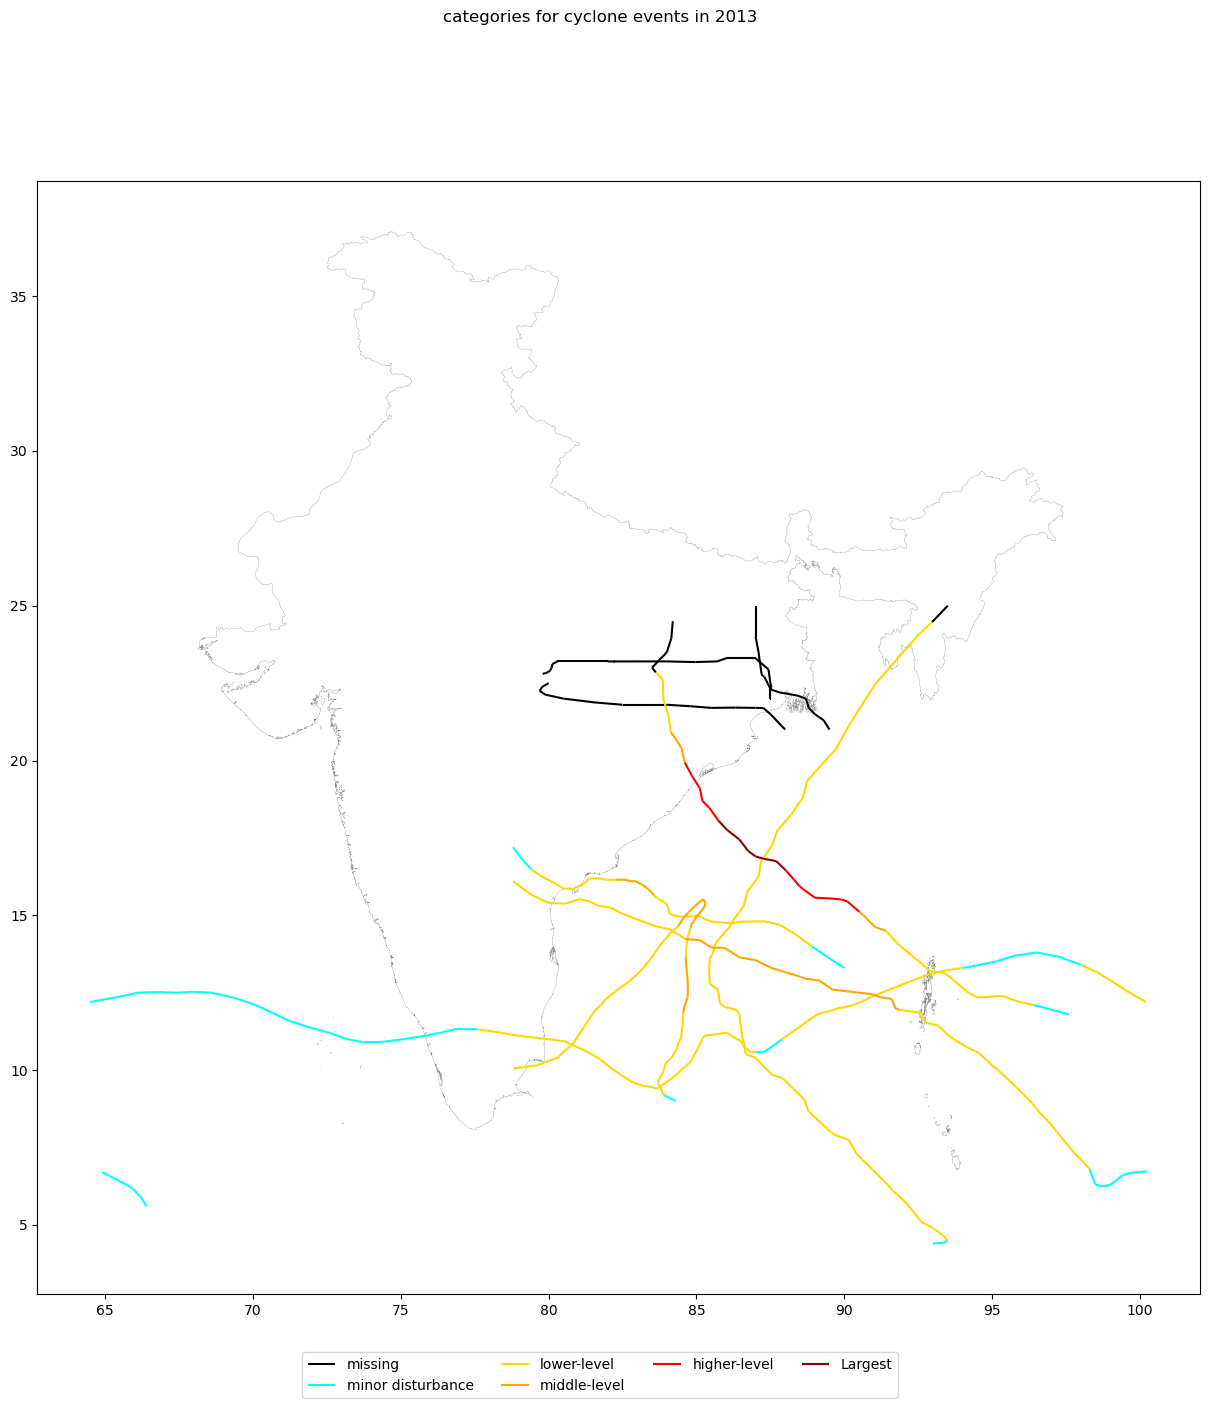

2013


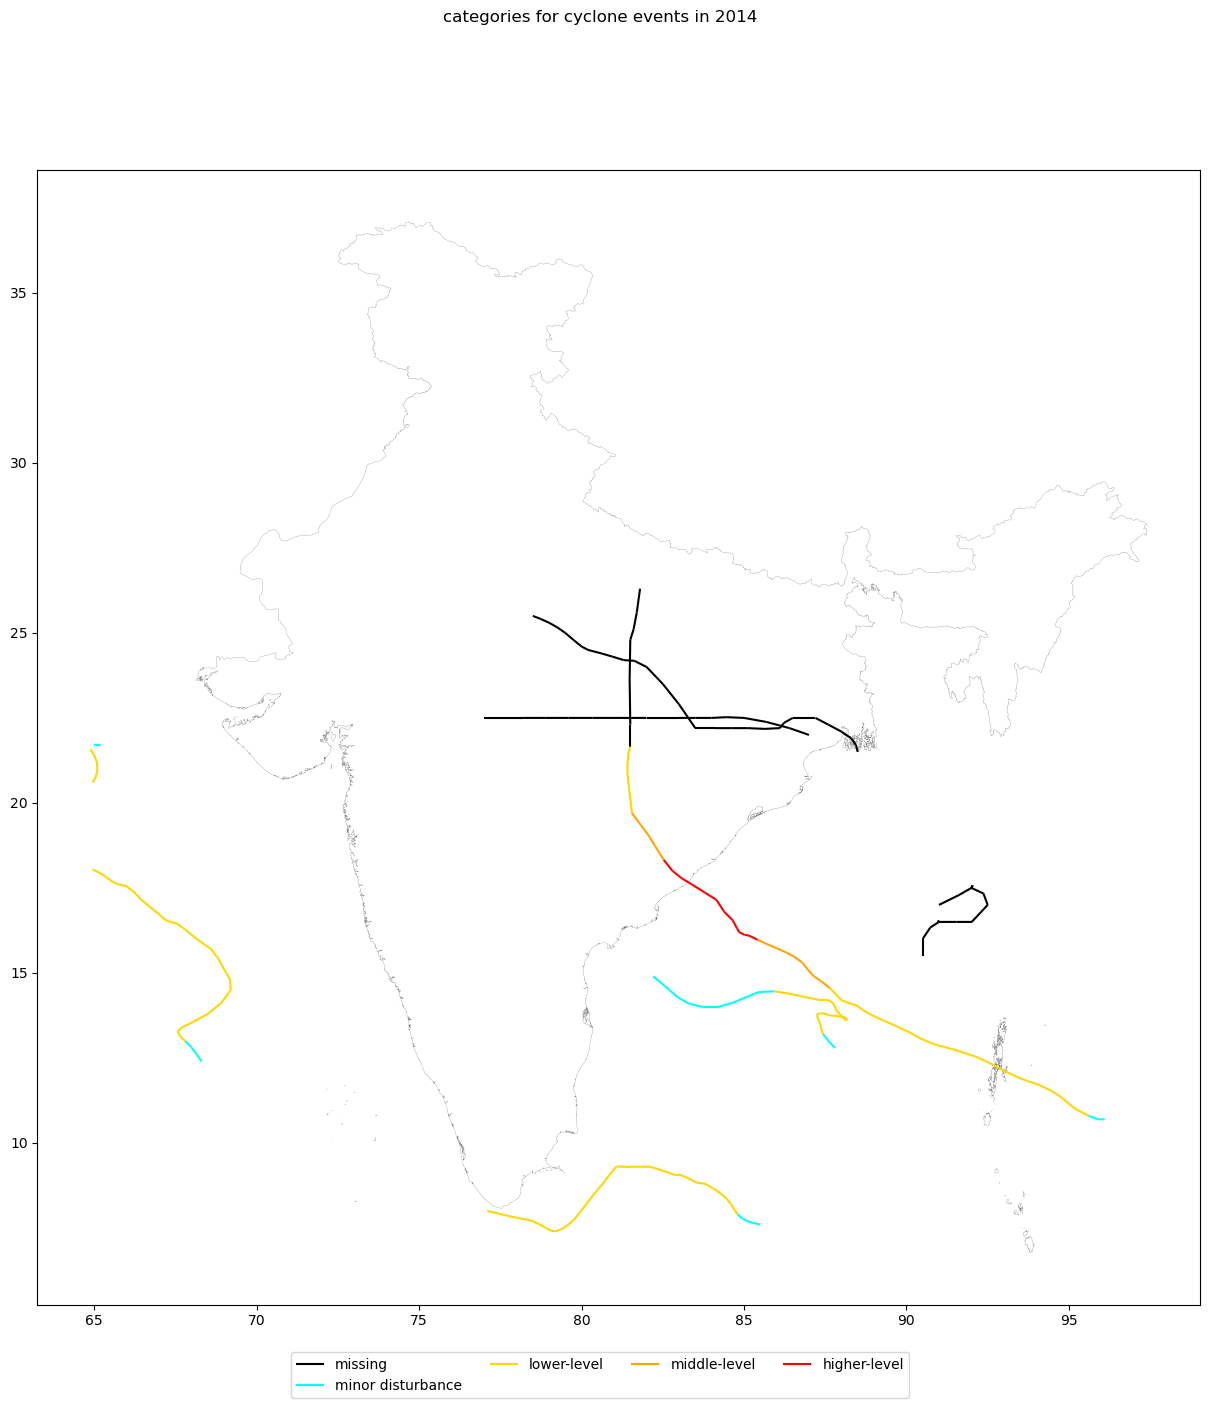

2014


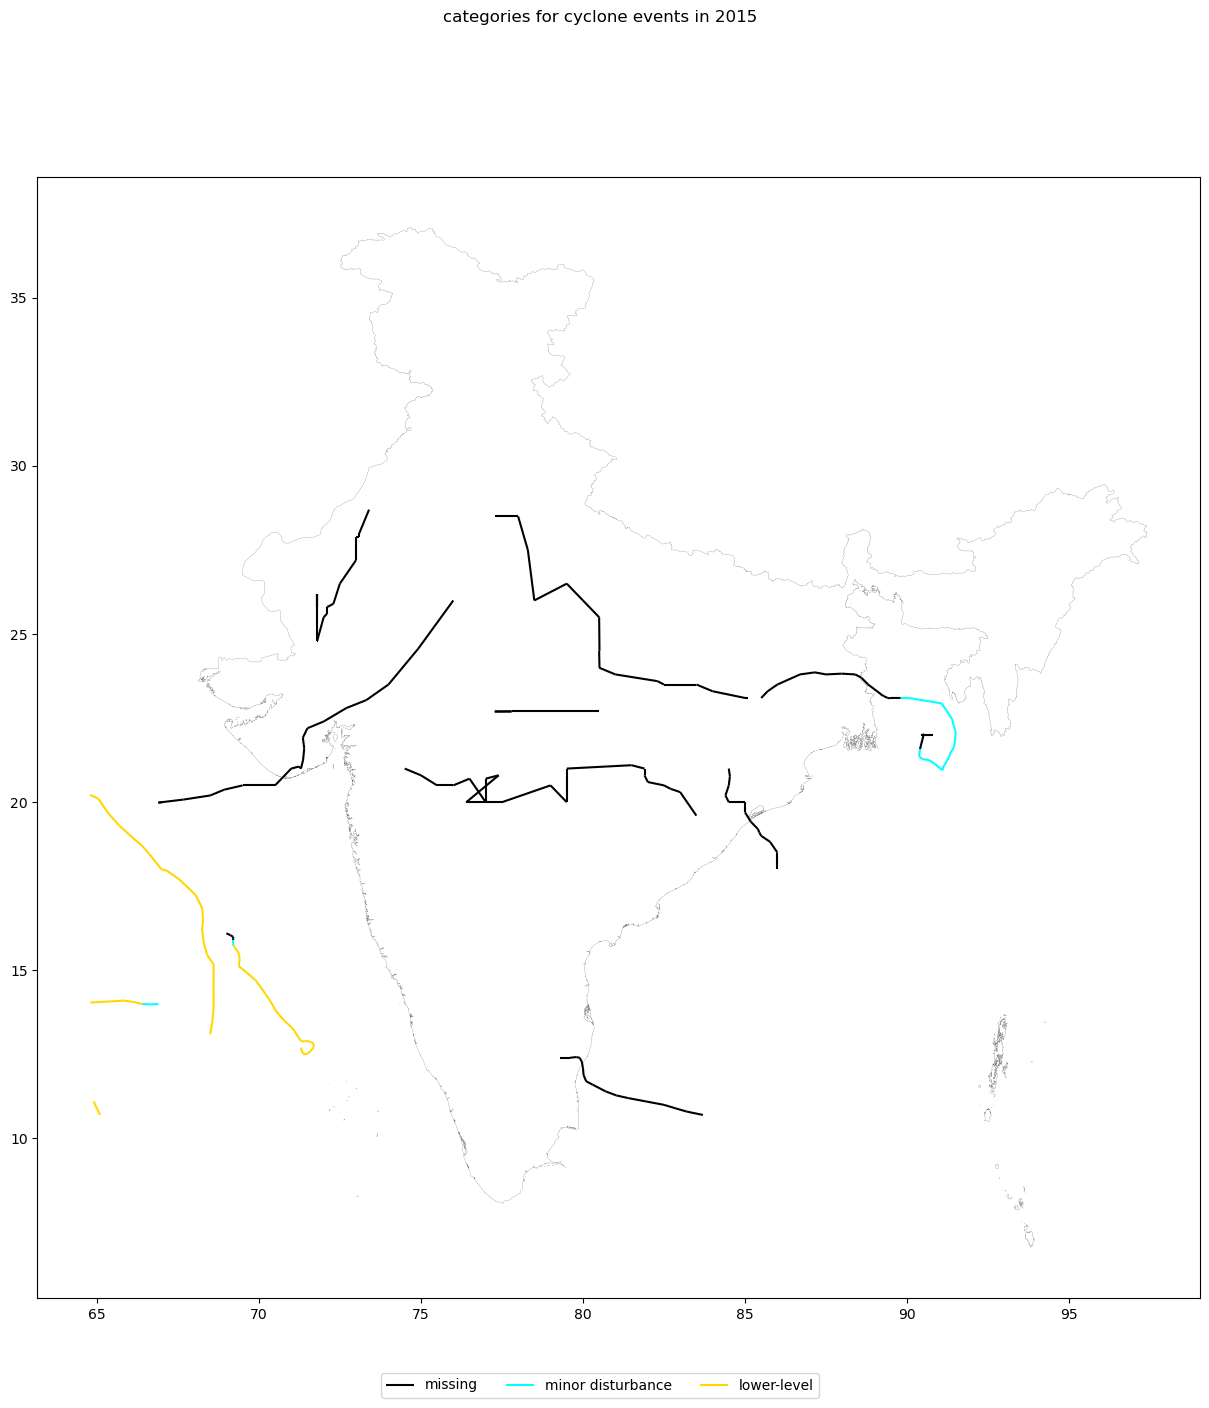

2015


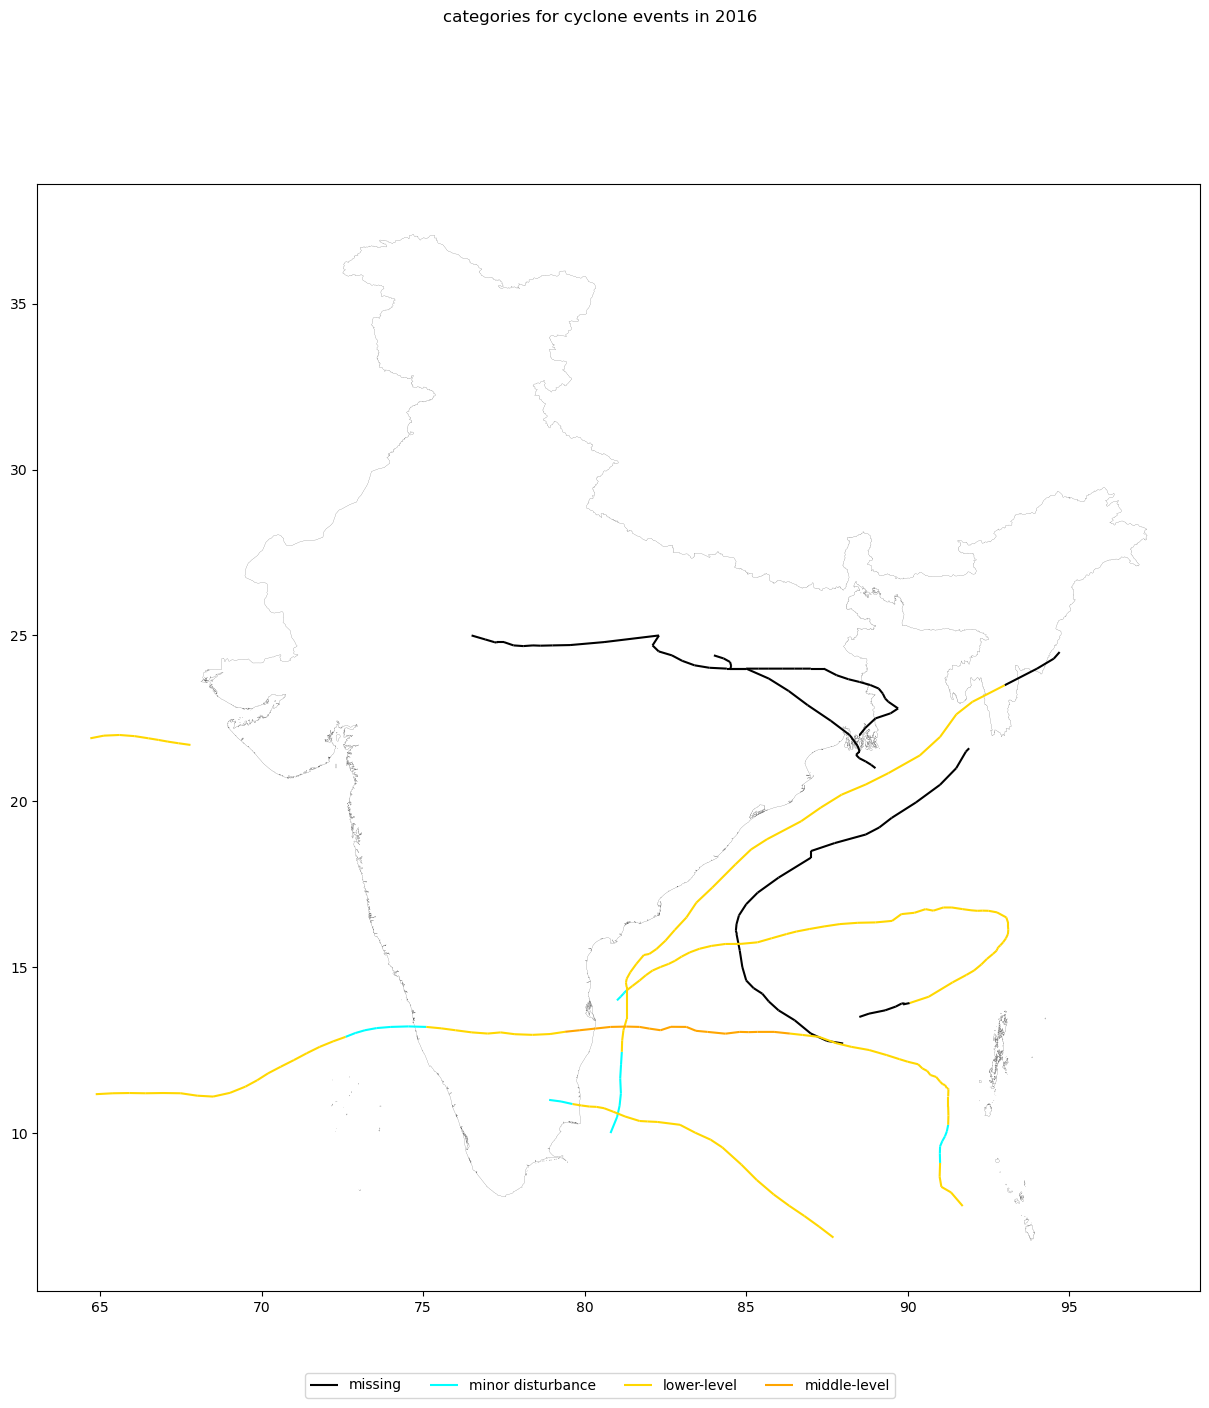

2016


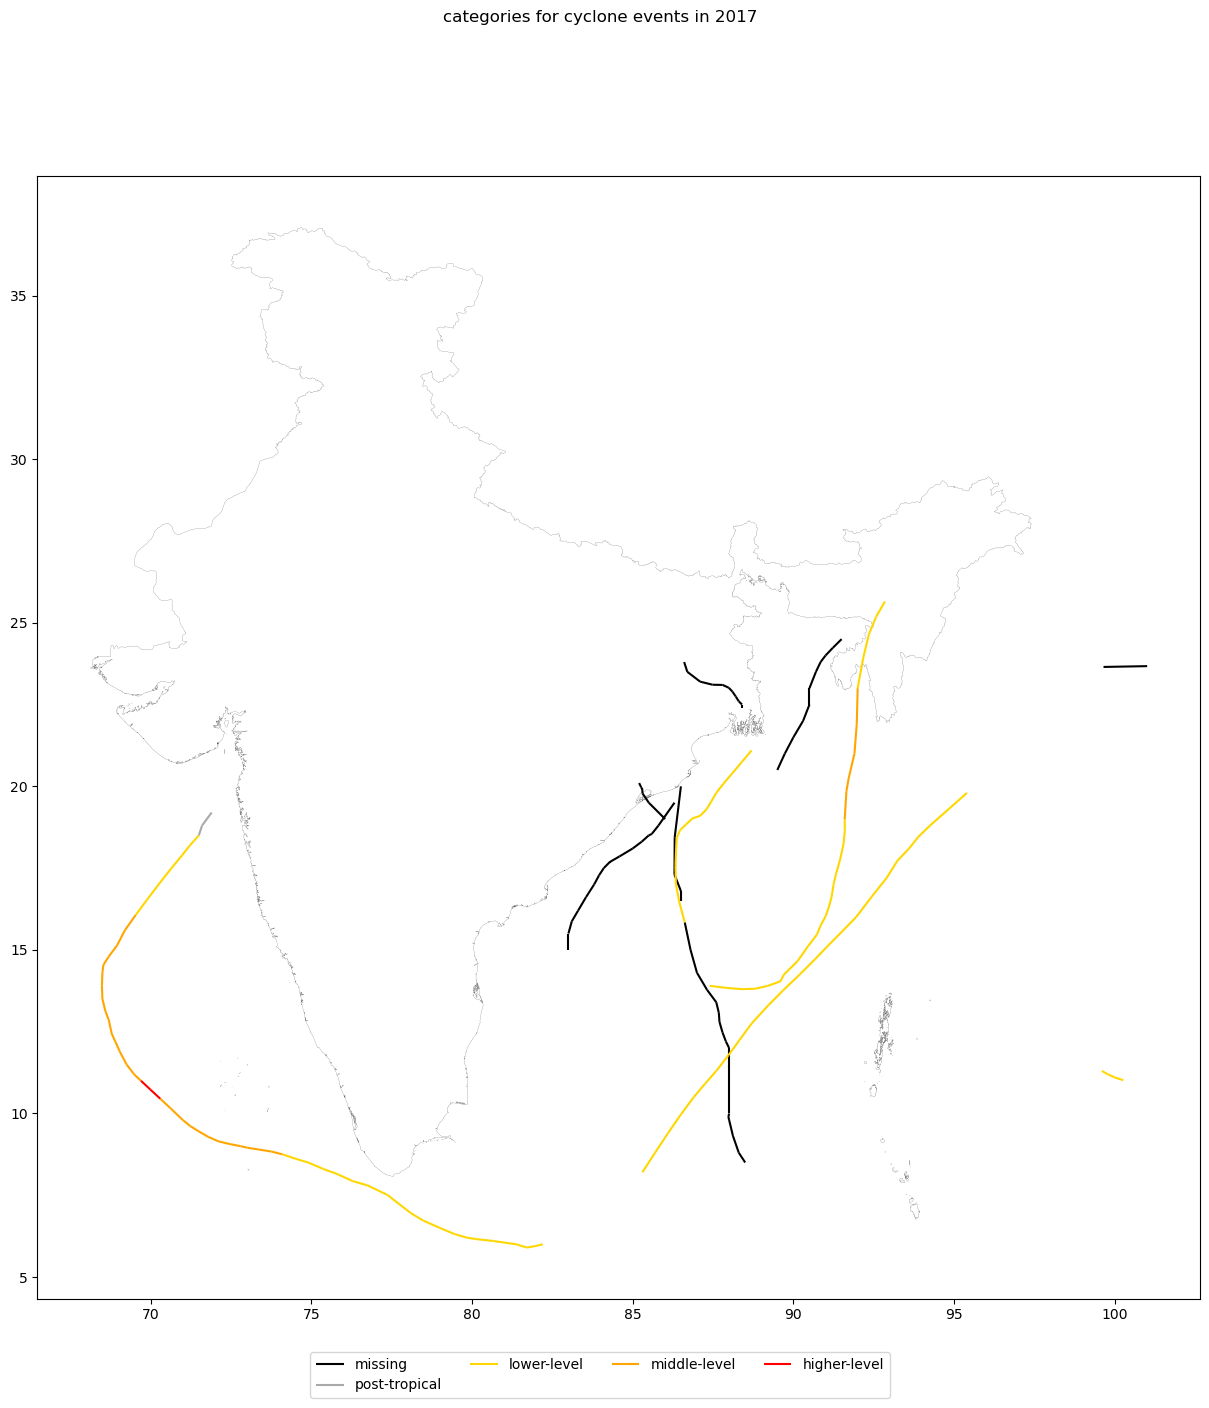

2017


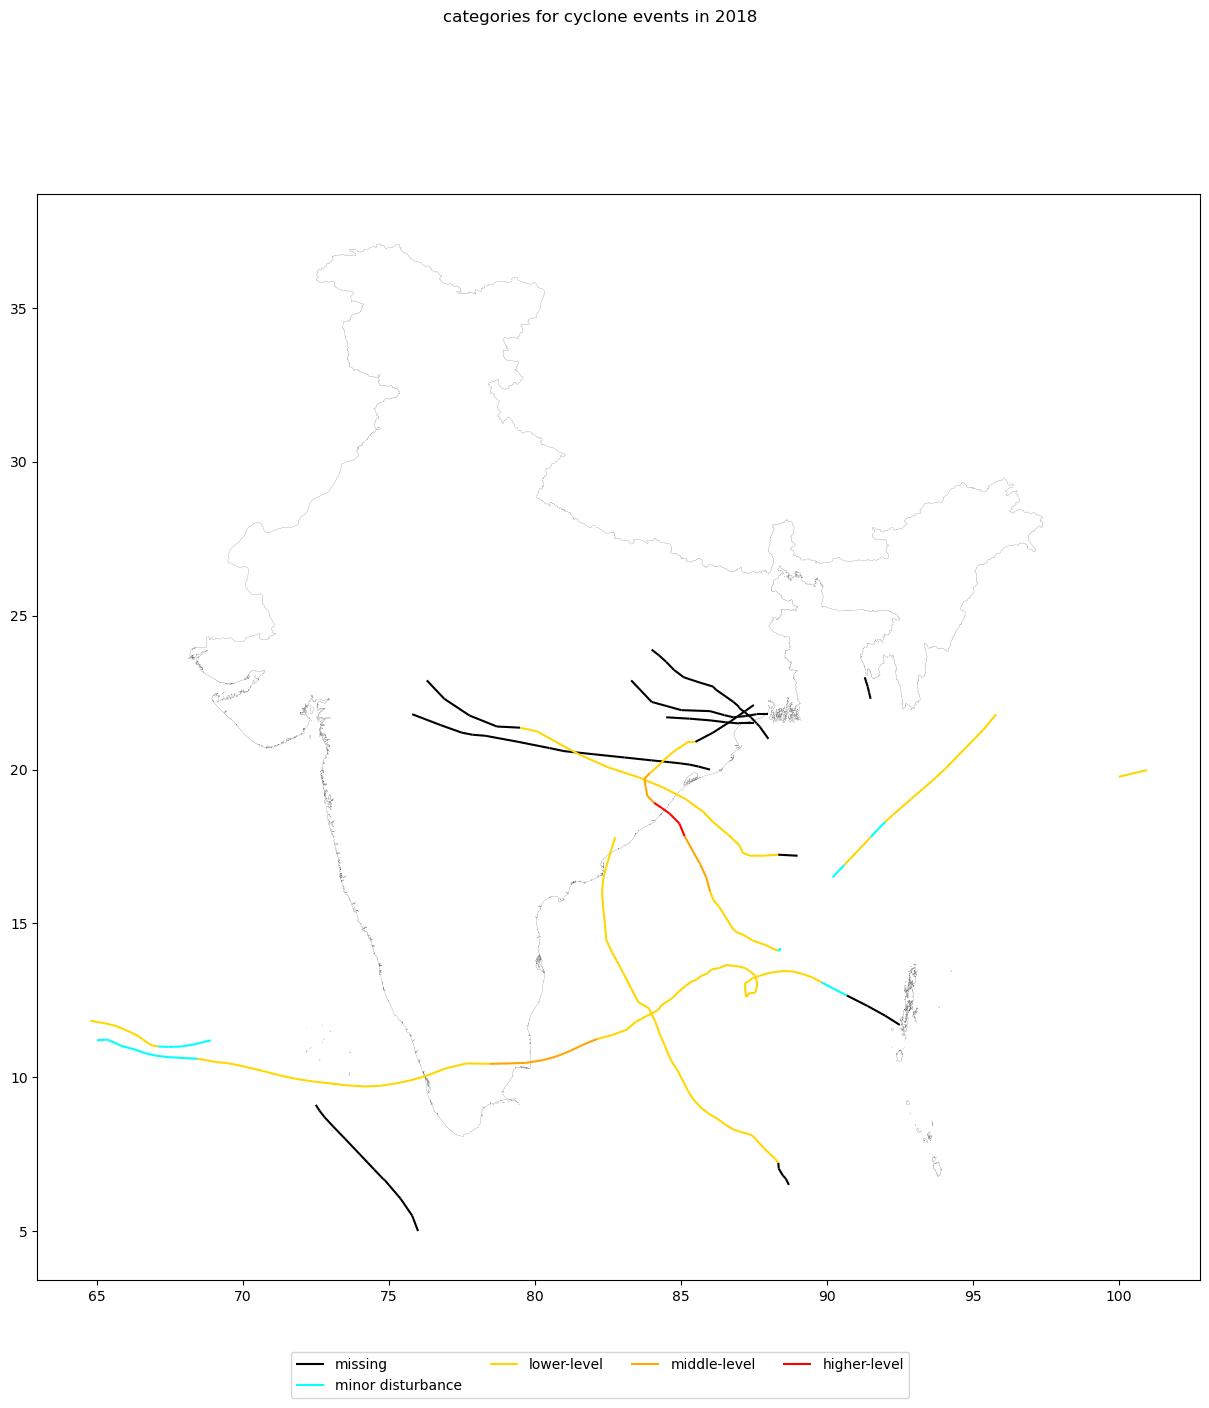

2018


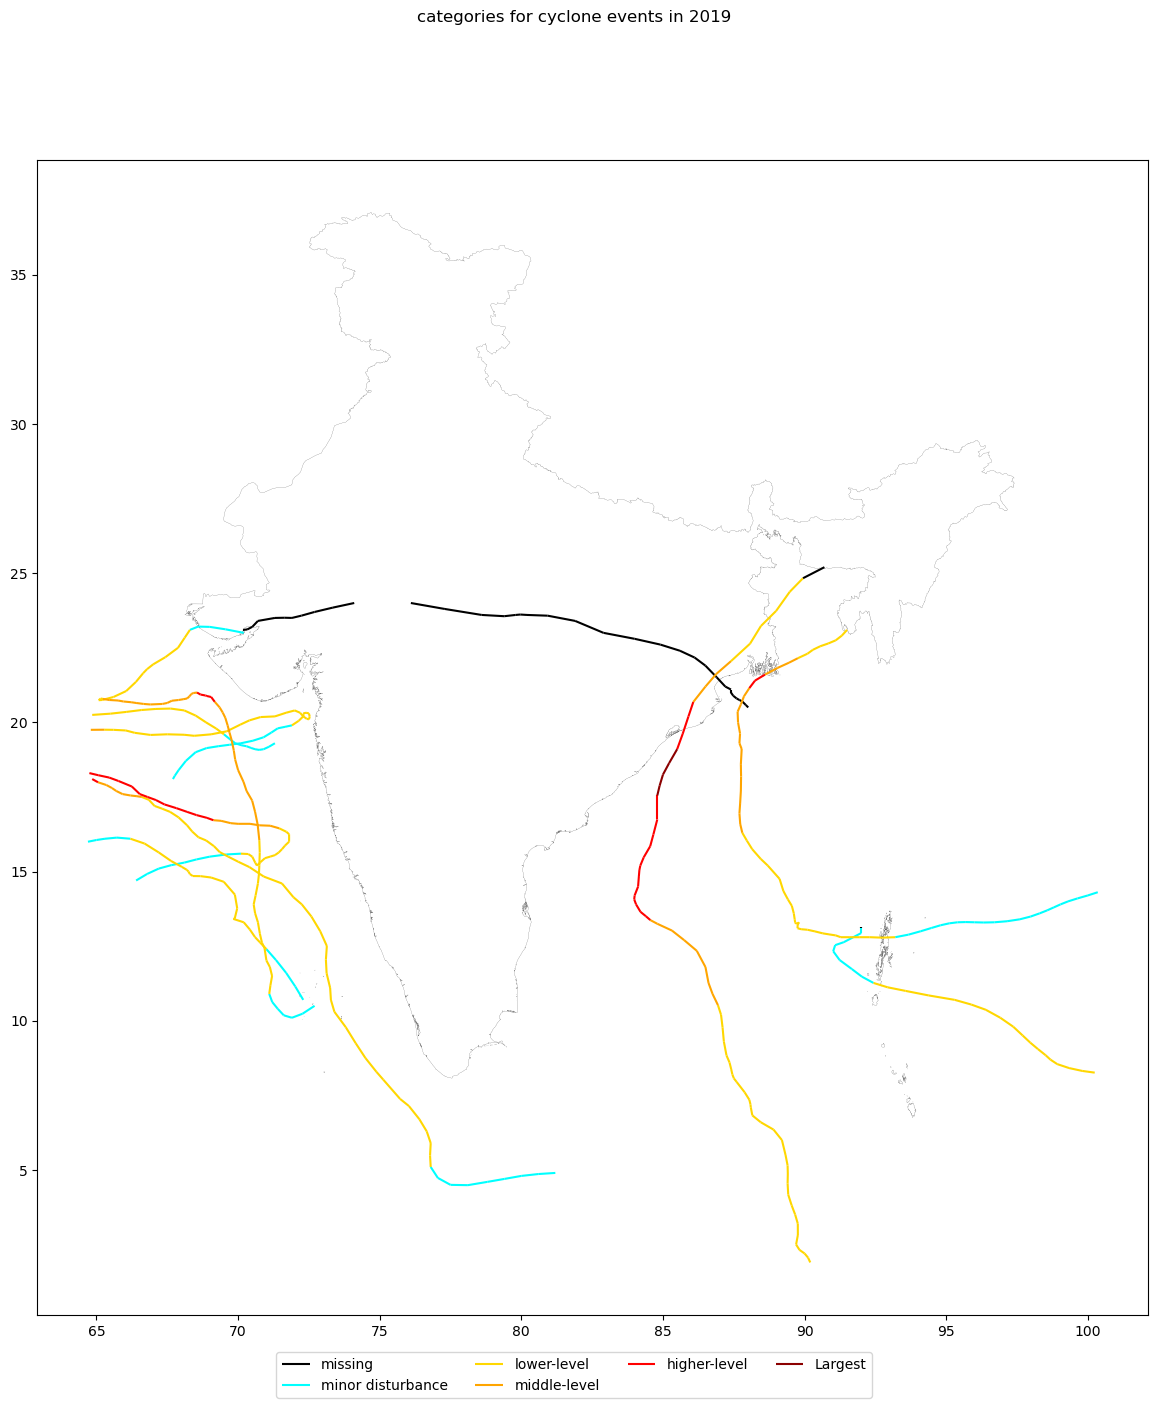

2019


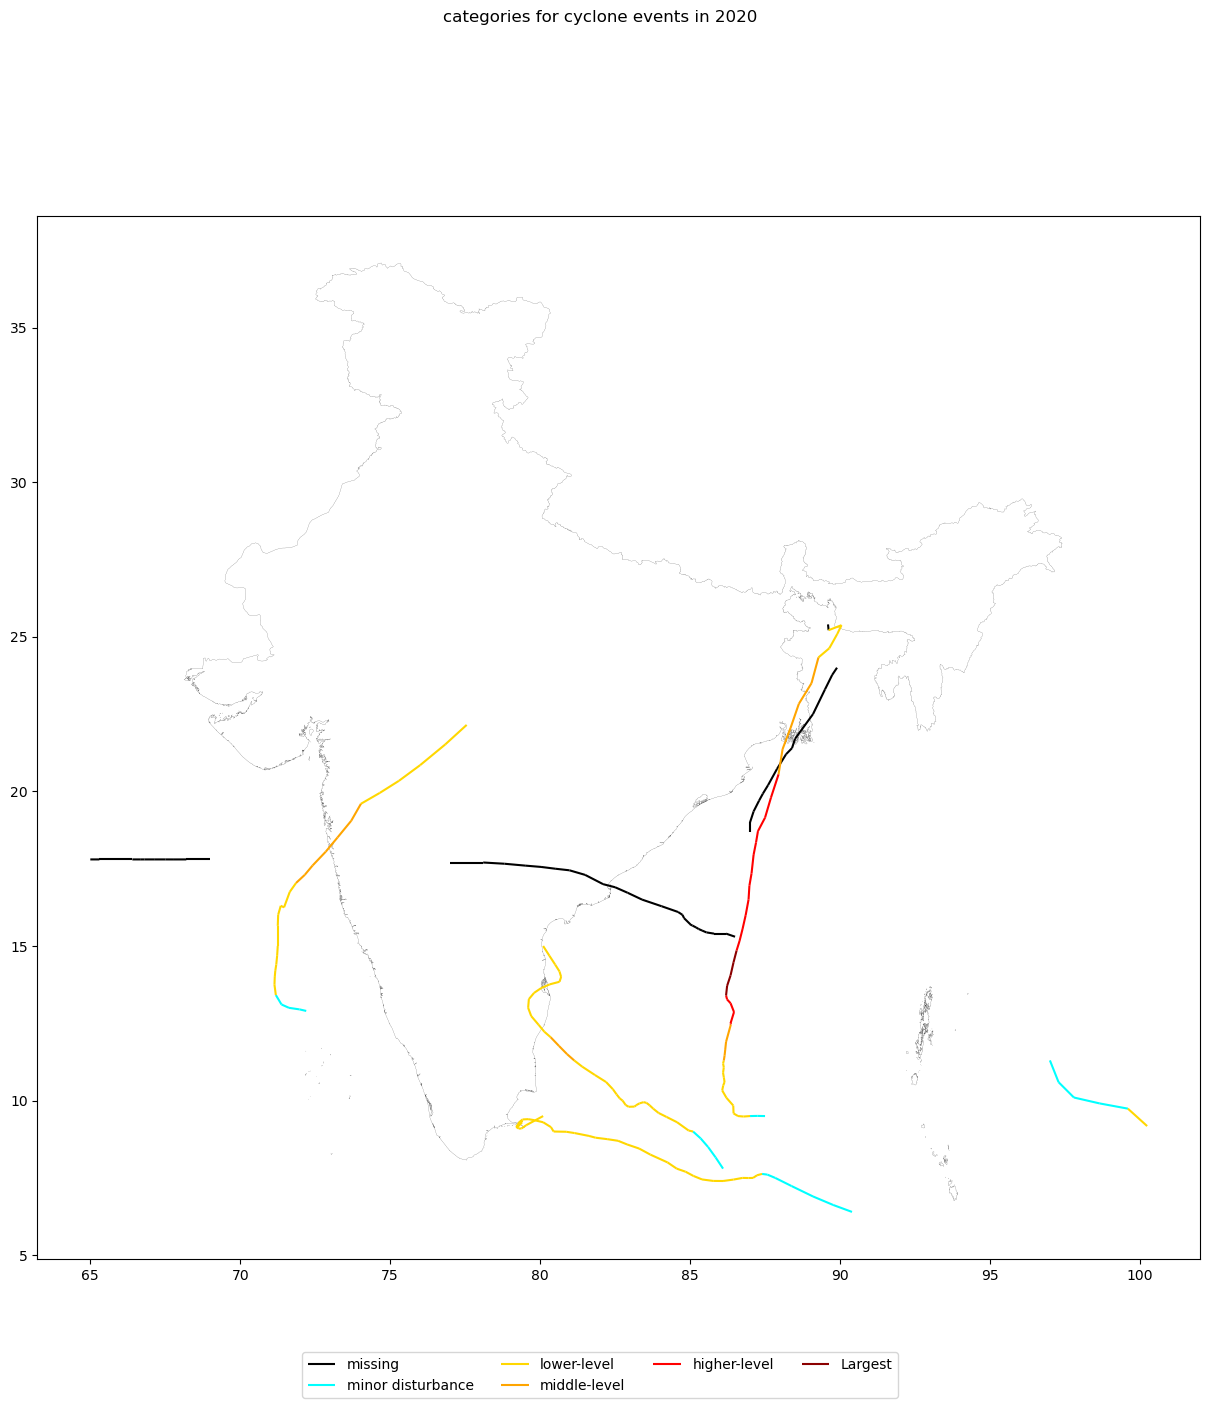

2020


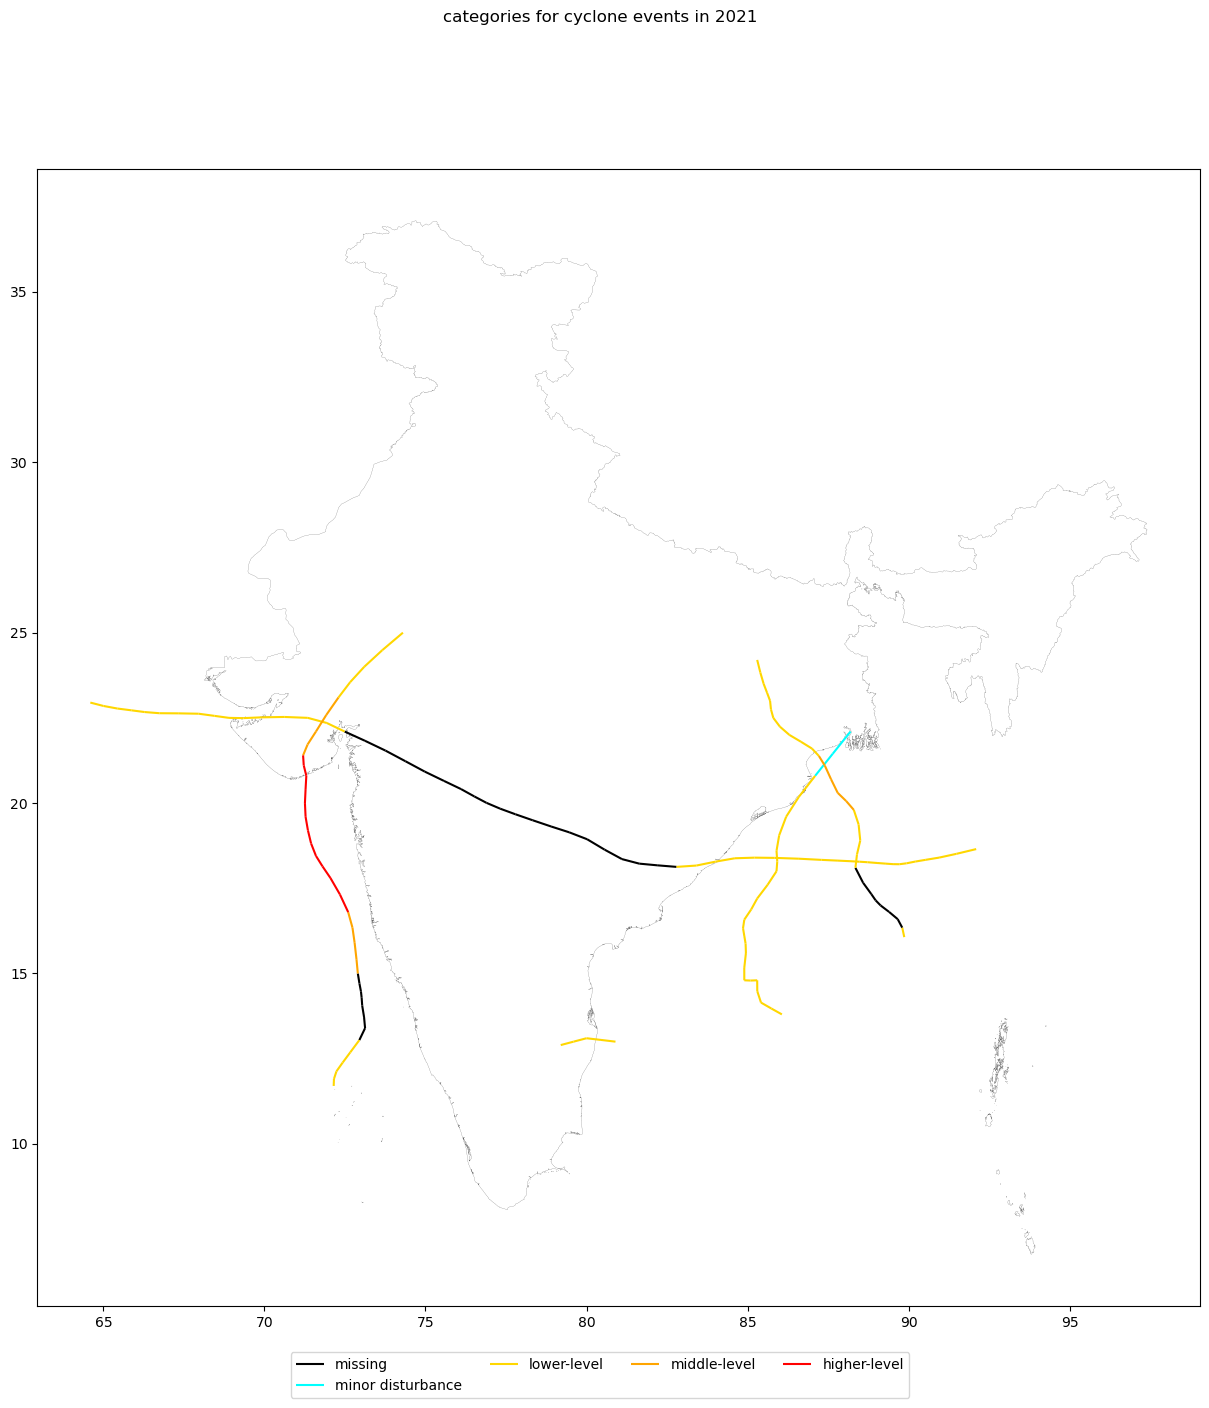

2021


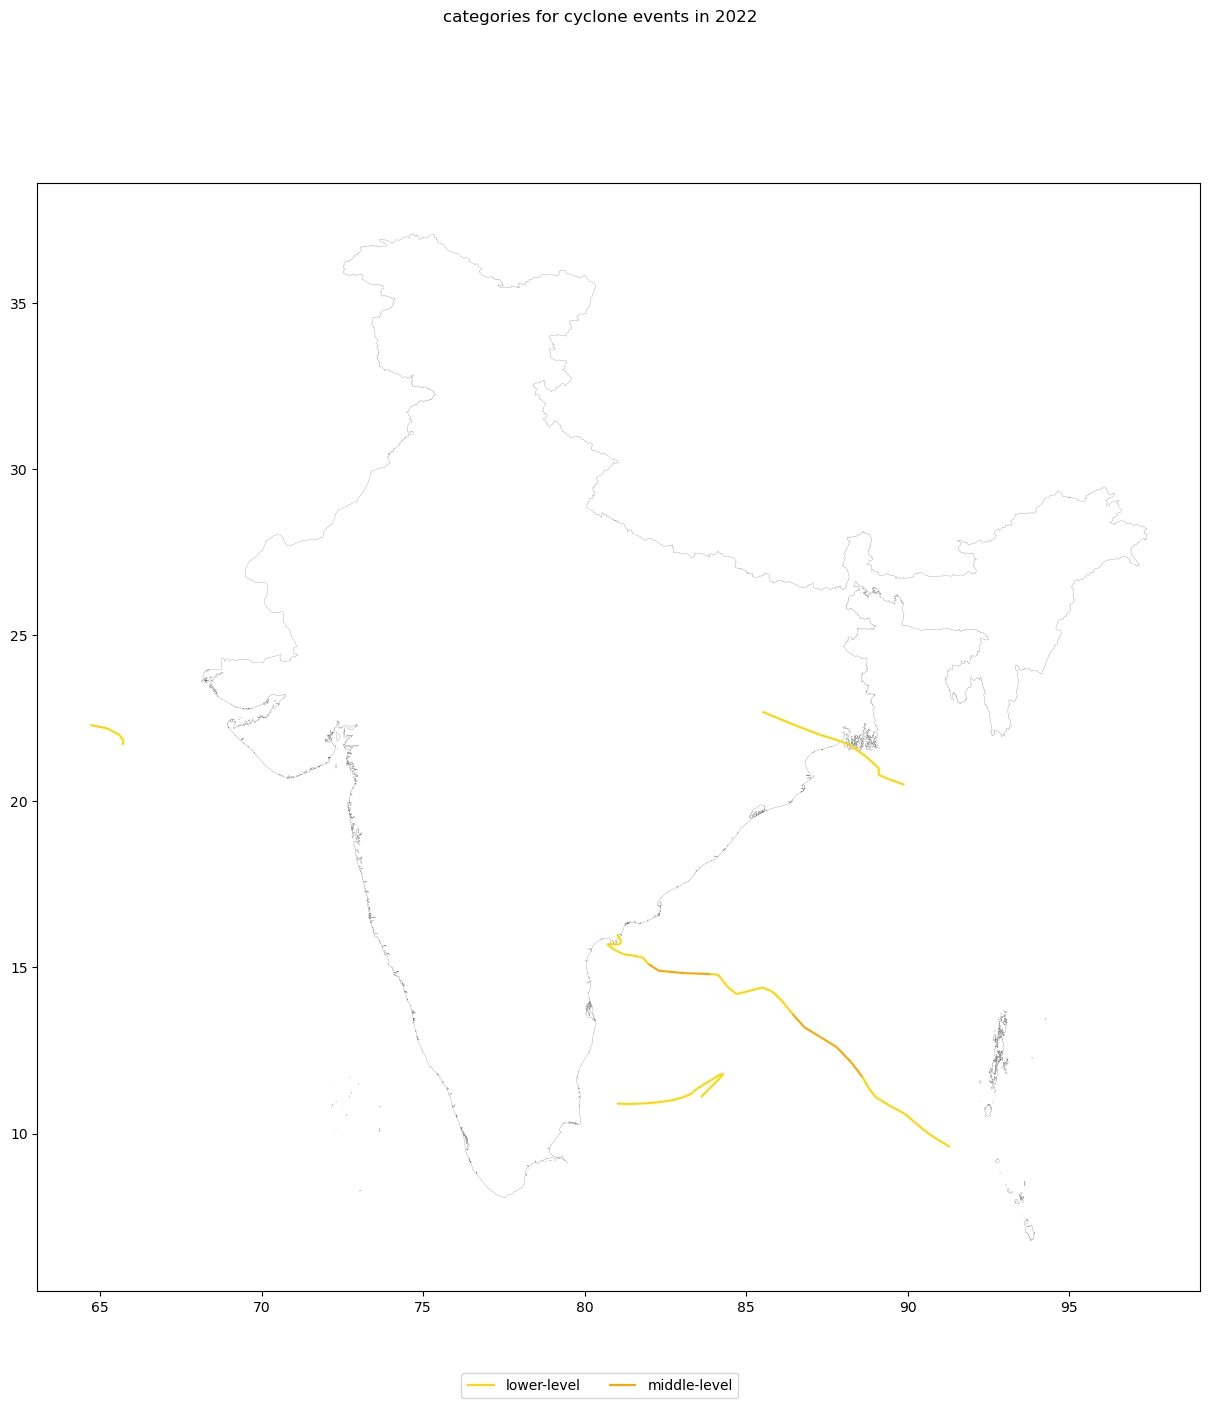

2022


In [41]:
for year in range(1990,2023):  
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    # plot india boundary
    gdf_india.boundary.plot(ax=ax, color='Black', linewidth=0.1)

    # graph all cyclone tracks with color indicating different categories
    gdf_plot=gdf_cyclone[gdf_cyclone['year']==year].copy()
    
    if len(gdf_plot[(gdf_plot['USA_SSHS']==-5)])>0:
        gdf_plot[(gdf_plot['USA_SSHS']==-5)].plot(ax=ax,color='black',label="missing")
    if len(gdf_plot[(gdf_plot['USA_SSHS']==-4)])>0:
        gdf_plot[(gdf_plot['USA_SSHS']==-4)].plot(ax=ax,color='darkgray',label="post-tropical")
    if len(gdf_plot[(gdf_plot['USA_SSHS']>=-3)&(gdf_plot['USA_SSHS']<=-2)])>0:
        gdf_plot[(gdf_plot['USA_SSHS']>=-3)&(gdf_plot['USA_SSHS']<=-2)].plot(ax=ax,color='cyan',label="minor disturbance")
    if len(gdf_plot[(gdf_plot['USA_SSHS']>=-1)&(gdf_plot['USA_SSHS']<=0)])>0:
        gdf_plot[(gdf_plot['USA_SSHS']>=-1)&(gdf_plot['USA_SSHS']<=0)].plot(ax=ax,color='gold',label="lower-level")
    if len(gdf_plot[(gdf_plot['USA_SSHS']>=1)&(gdf_plot['USA_SSHS']<=2)])>0:
        gdf_plot[(gdf_plot['USA_SSHS']>=1)&(gdf_plot['USA_SSHS']<=2)].plot(ax=ax,color='orange',label="middle-level")
    if len(gdf_plot[(gdf_plot['USA_SSHS']>=3)&(gdf_plot['USA_SSHS']<=4)])>0:
        gdf_plot[(gdf_plot['USA_SSHS']>=3)&(gdf_plot['USA_SSHS']<=4)].plot(ax=ax,color='red',label="higher-level")
    if len(gdf_plot[(gdf_plot['USA_SSHS']==5)])>0:
        gdf_plot[(gdf_plot['USA_SSHS']==5)].plot(ax=ax,color='darkred',label="Largest")
    fig.legend(loc='lower center',bbox_to_anchor=(0.5, 0.05),ncol=4)
    fig.suptitle("categories for cyclone events in "+str(year))
    fig.savefig("USA_categories_cyclone events in "+str(year) + ".png", dpi=200)
    plt.show()
    print(year)

Draw map of USA displaying track with associated cyclone USA windspeed

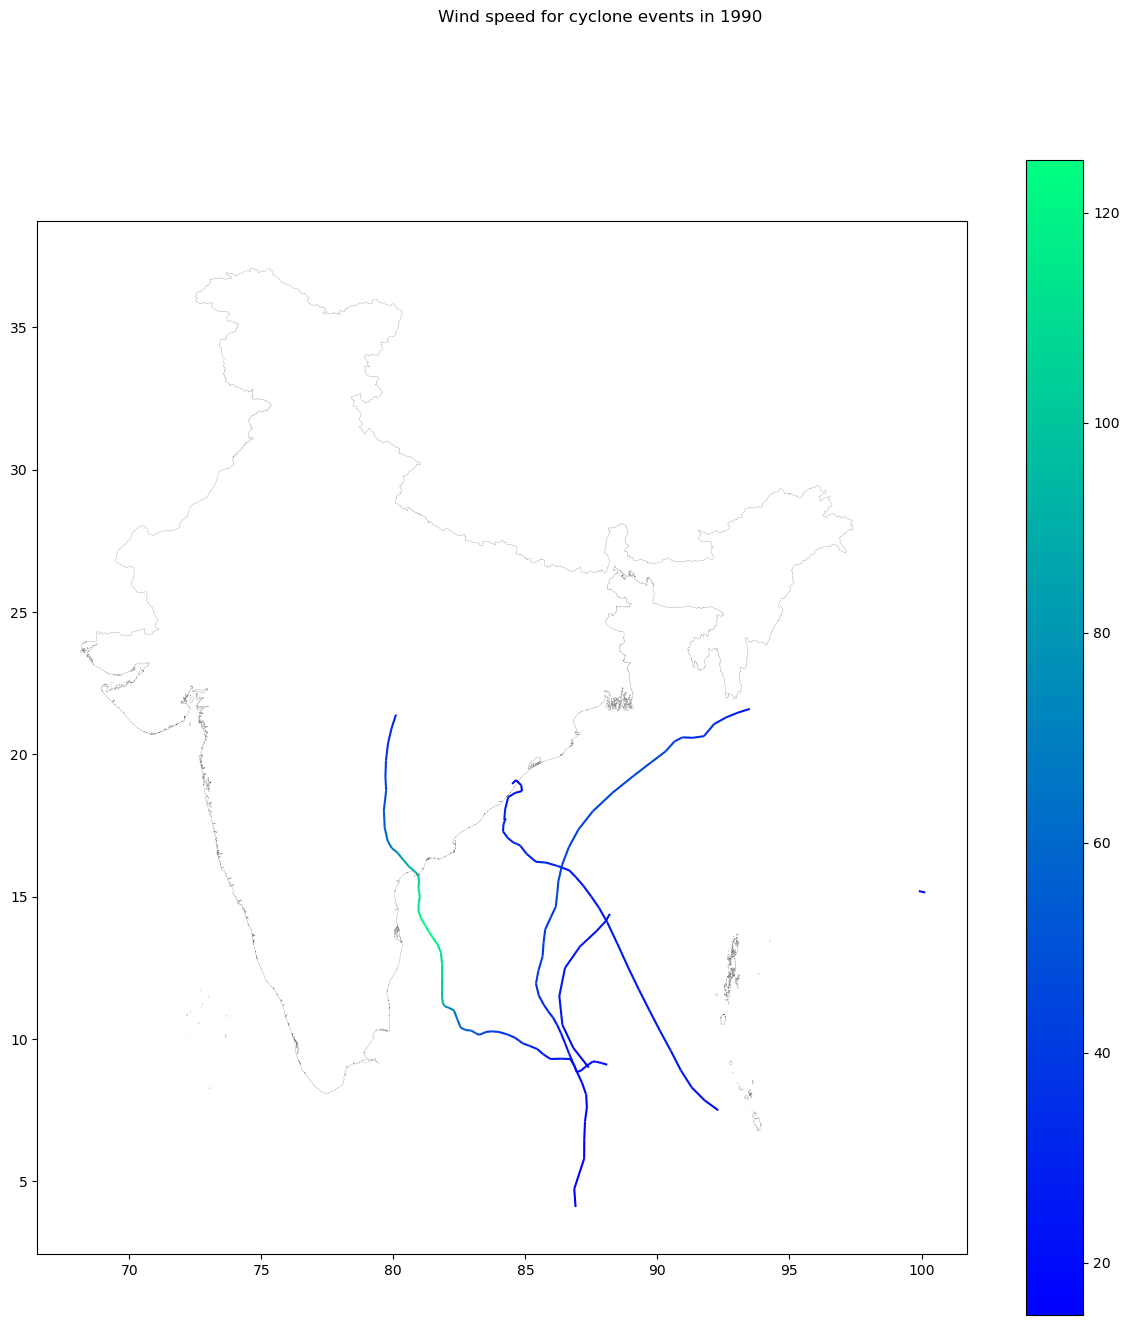

1990


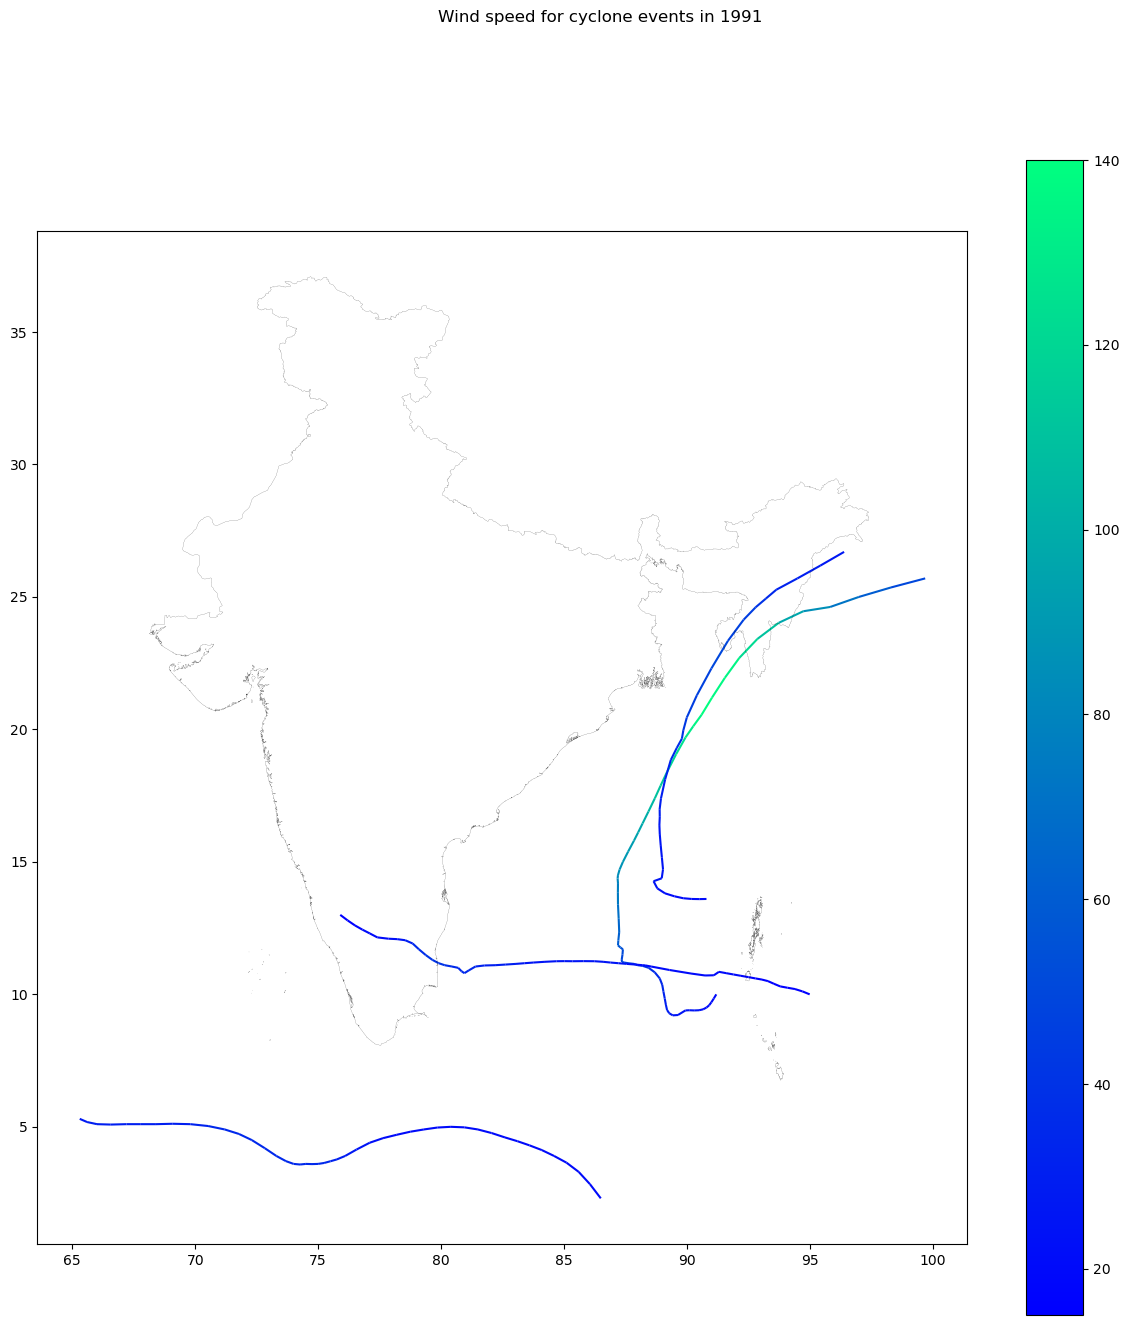

1991


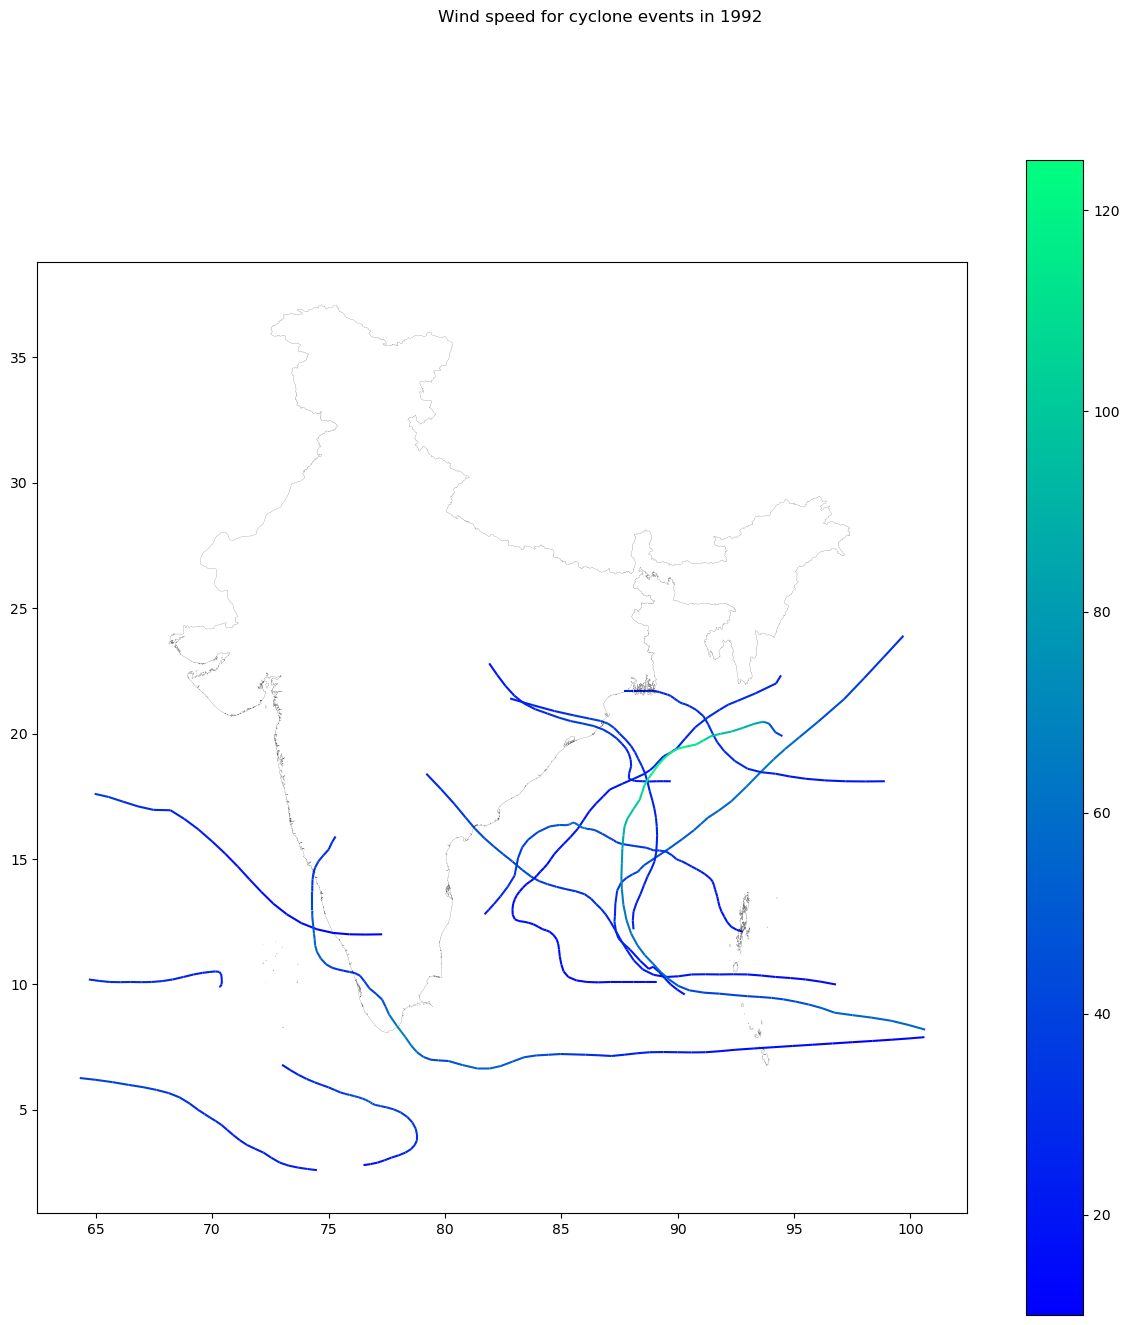

1992


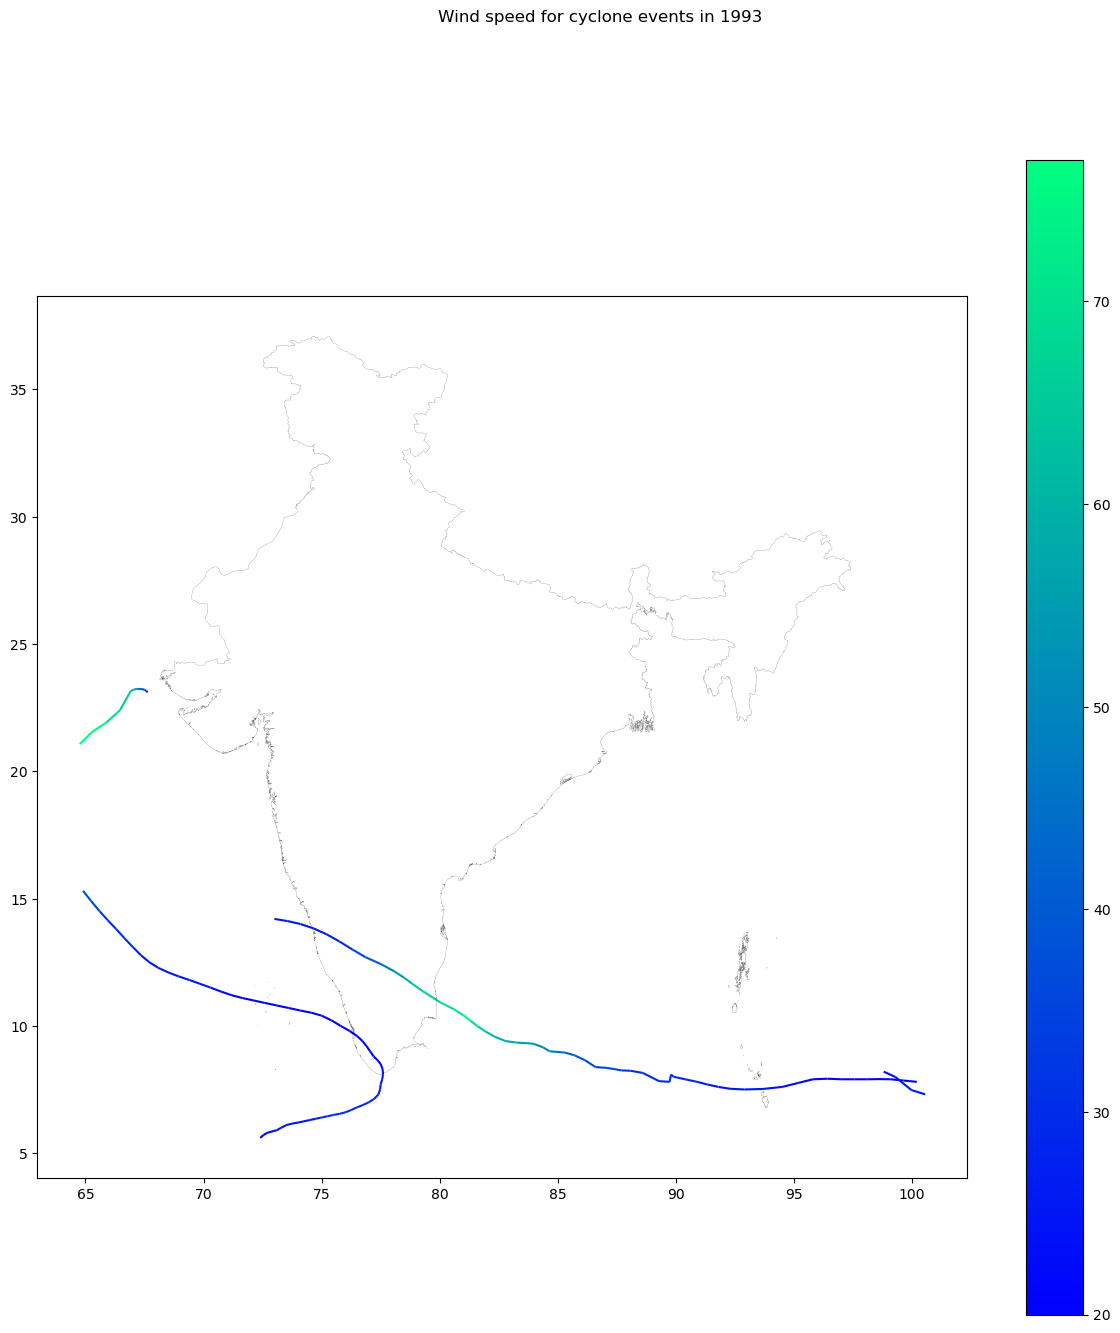

1993


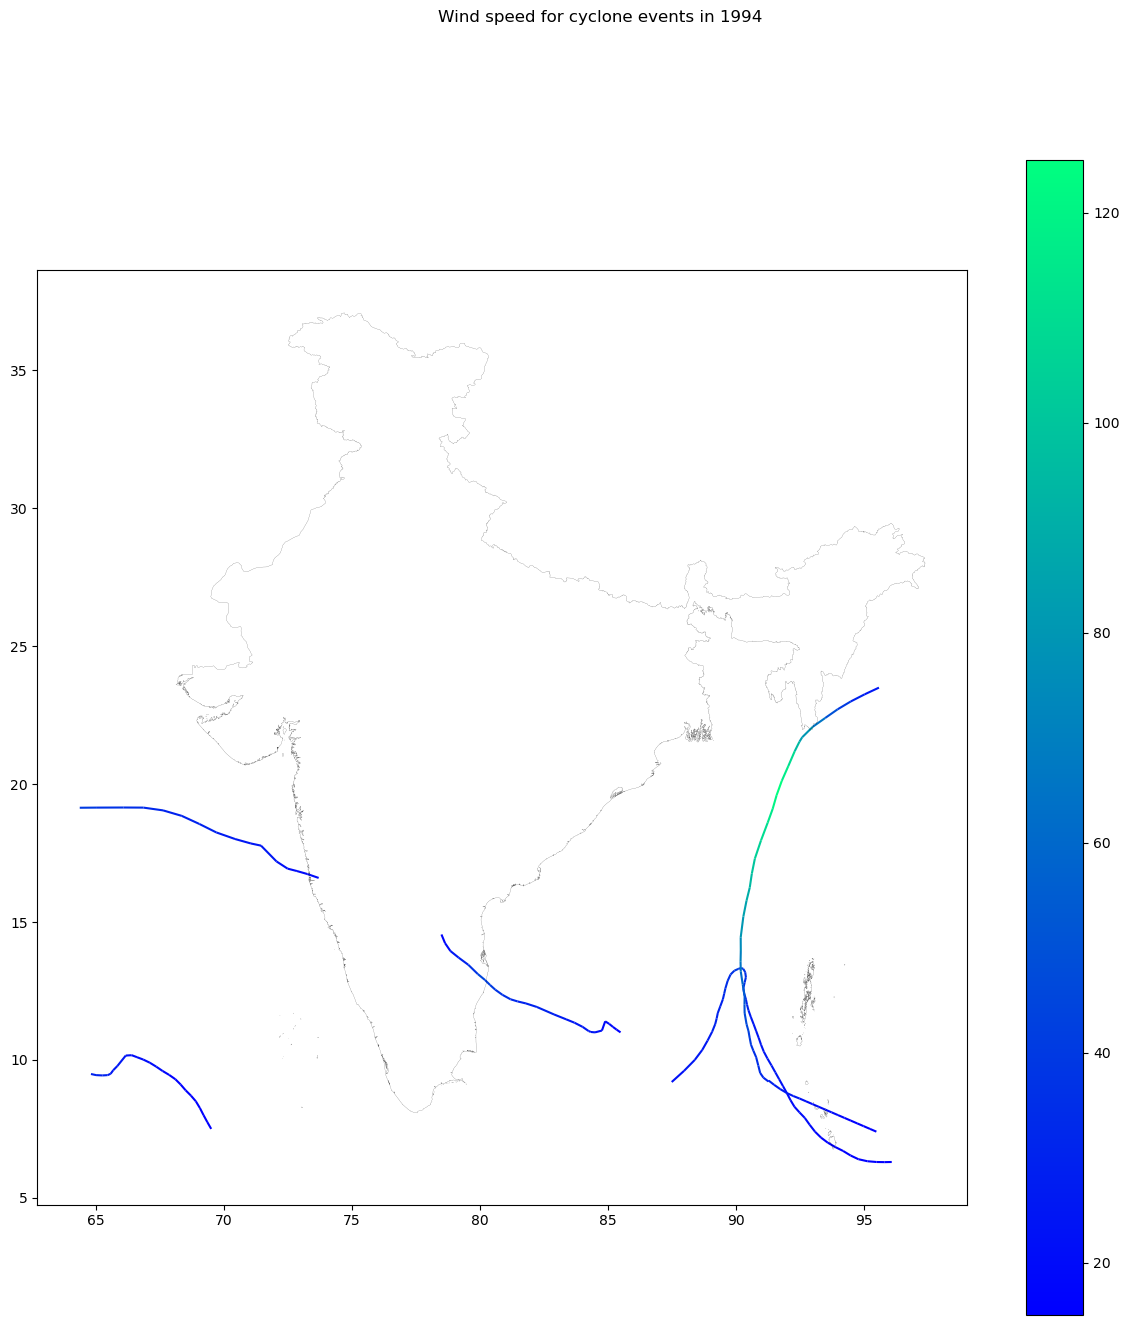

1994


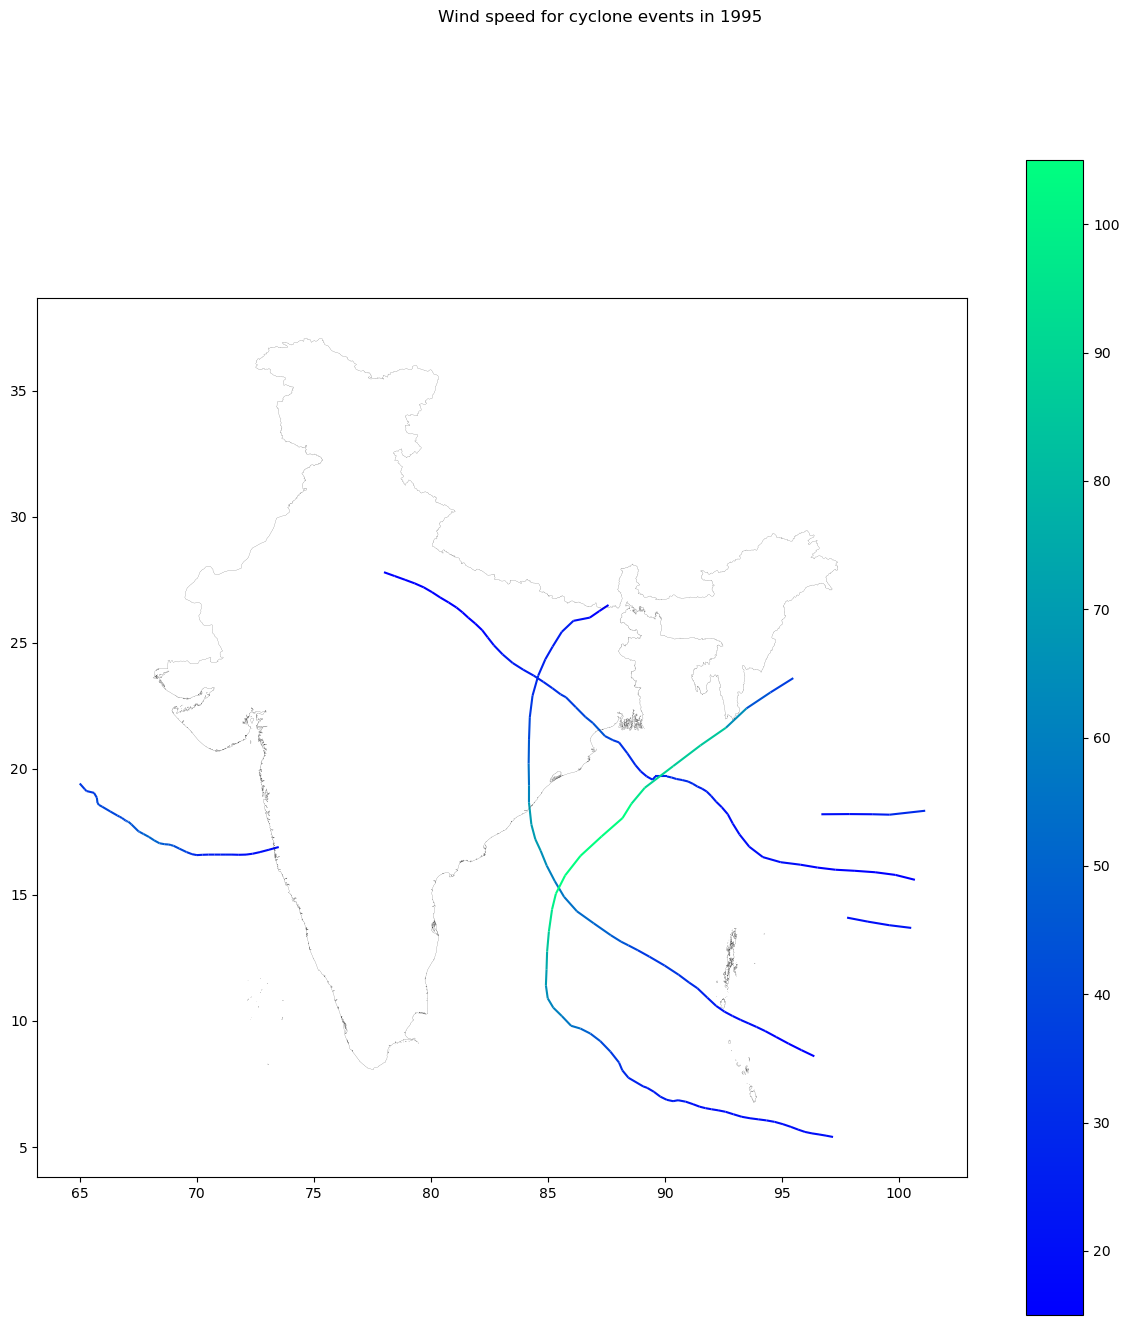

1995


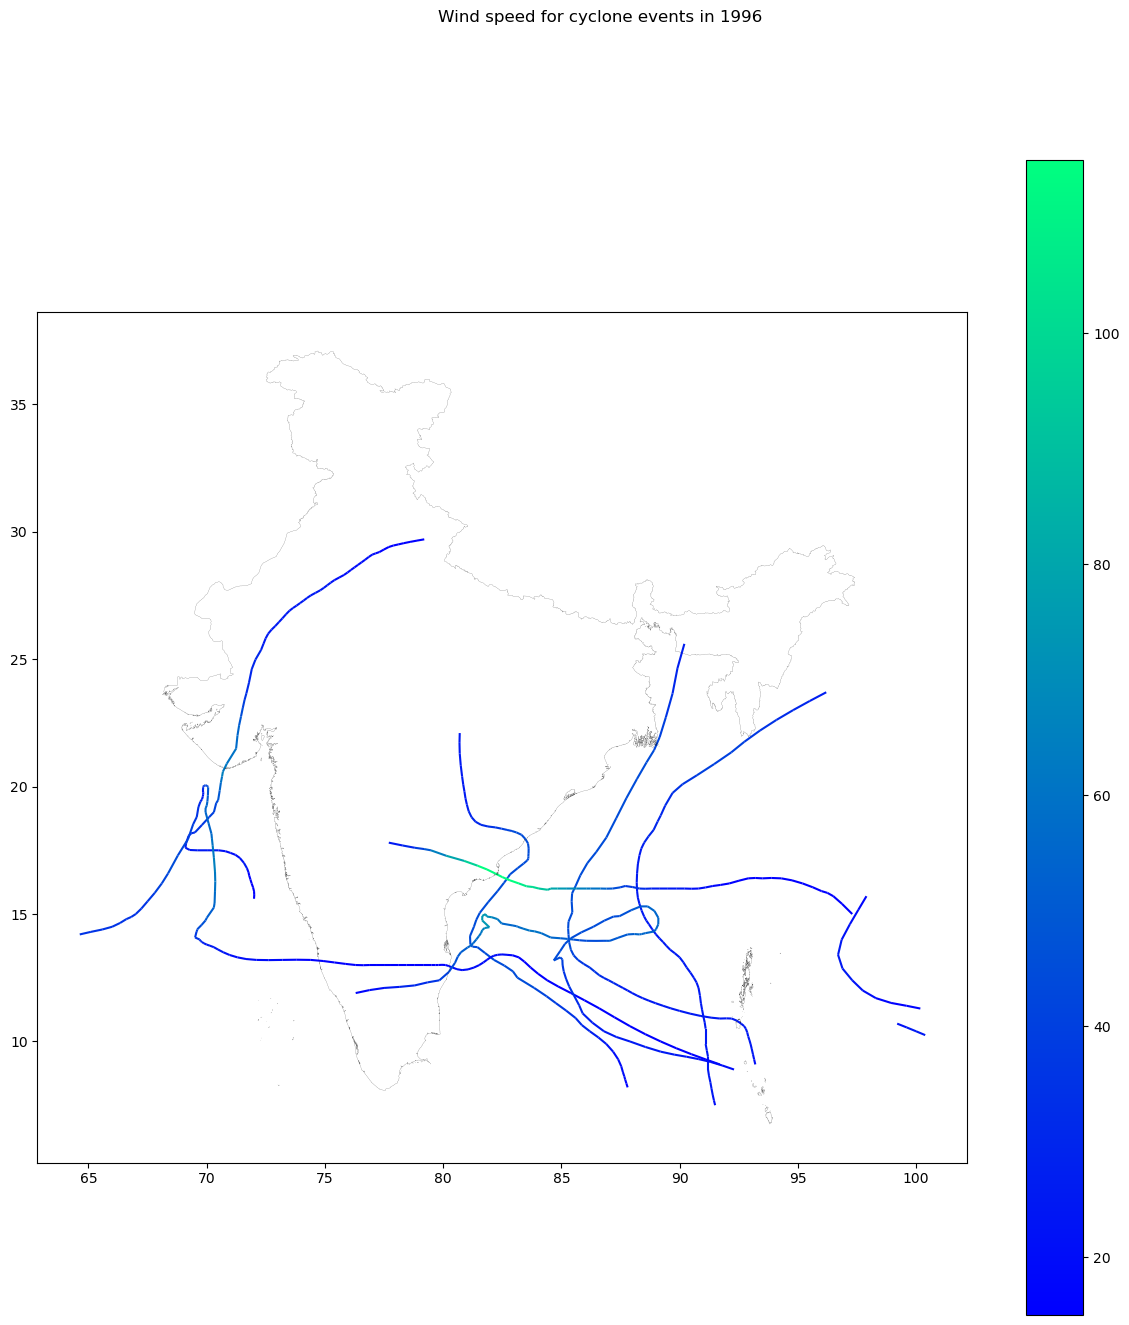

1996


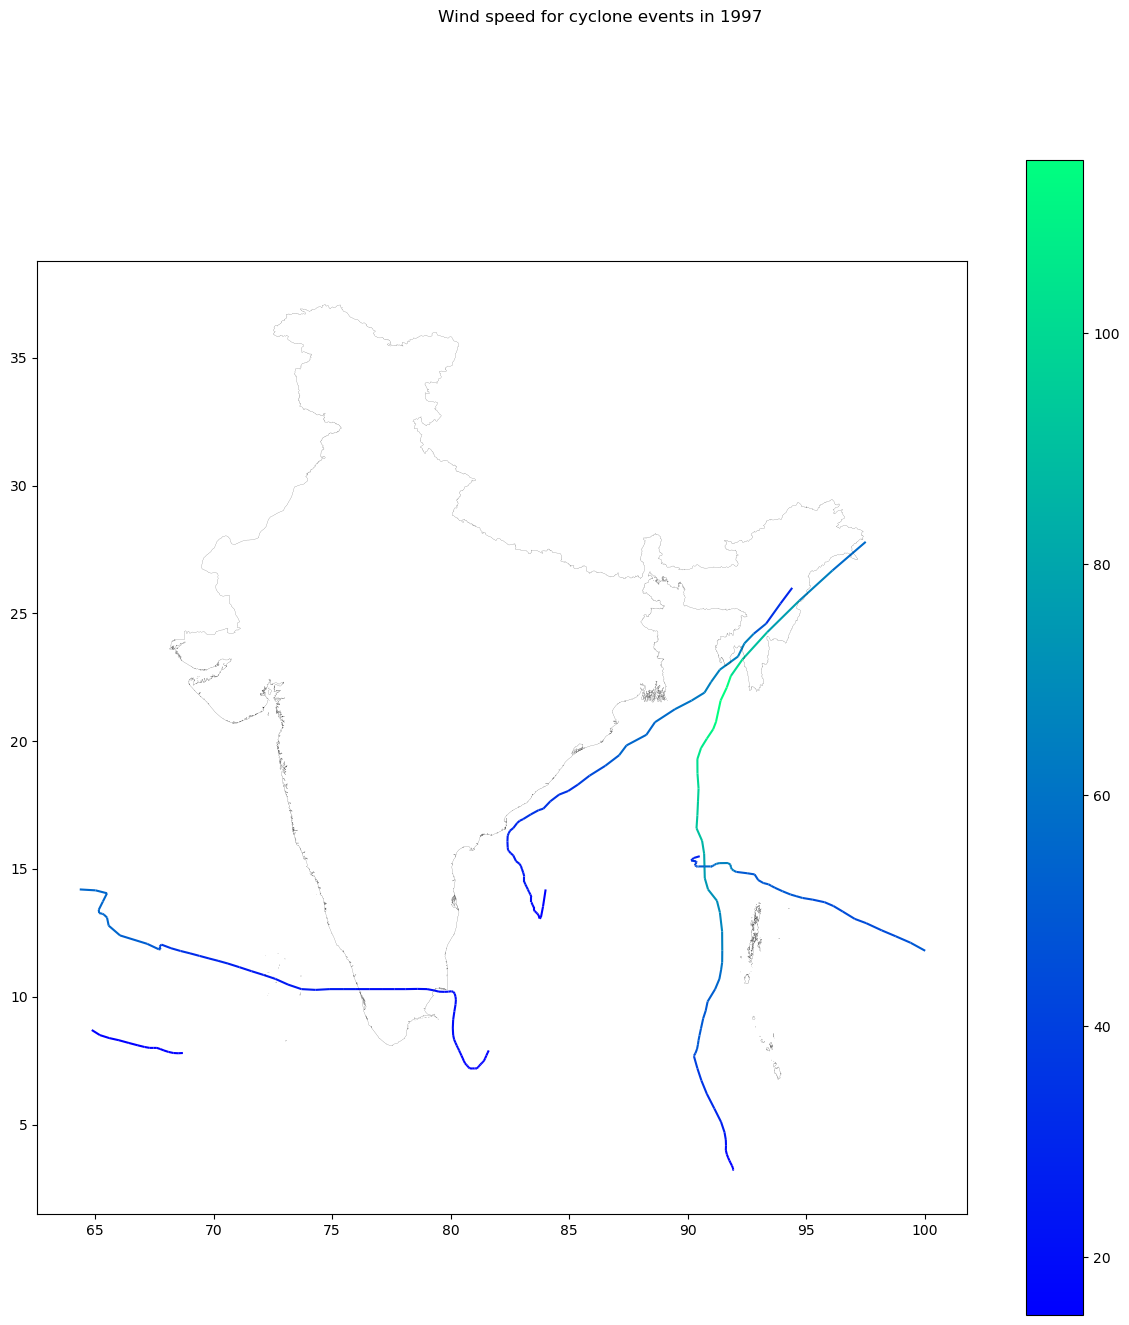

1997


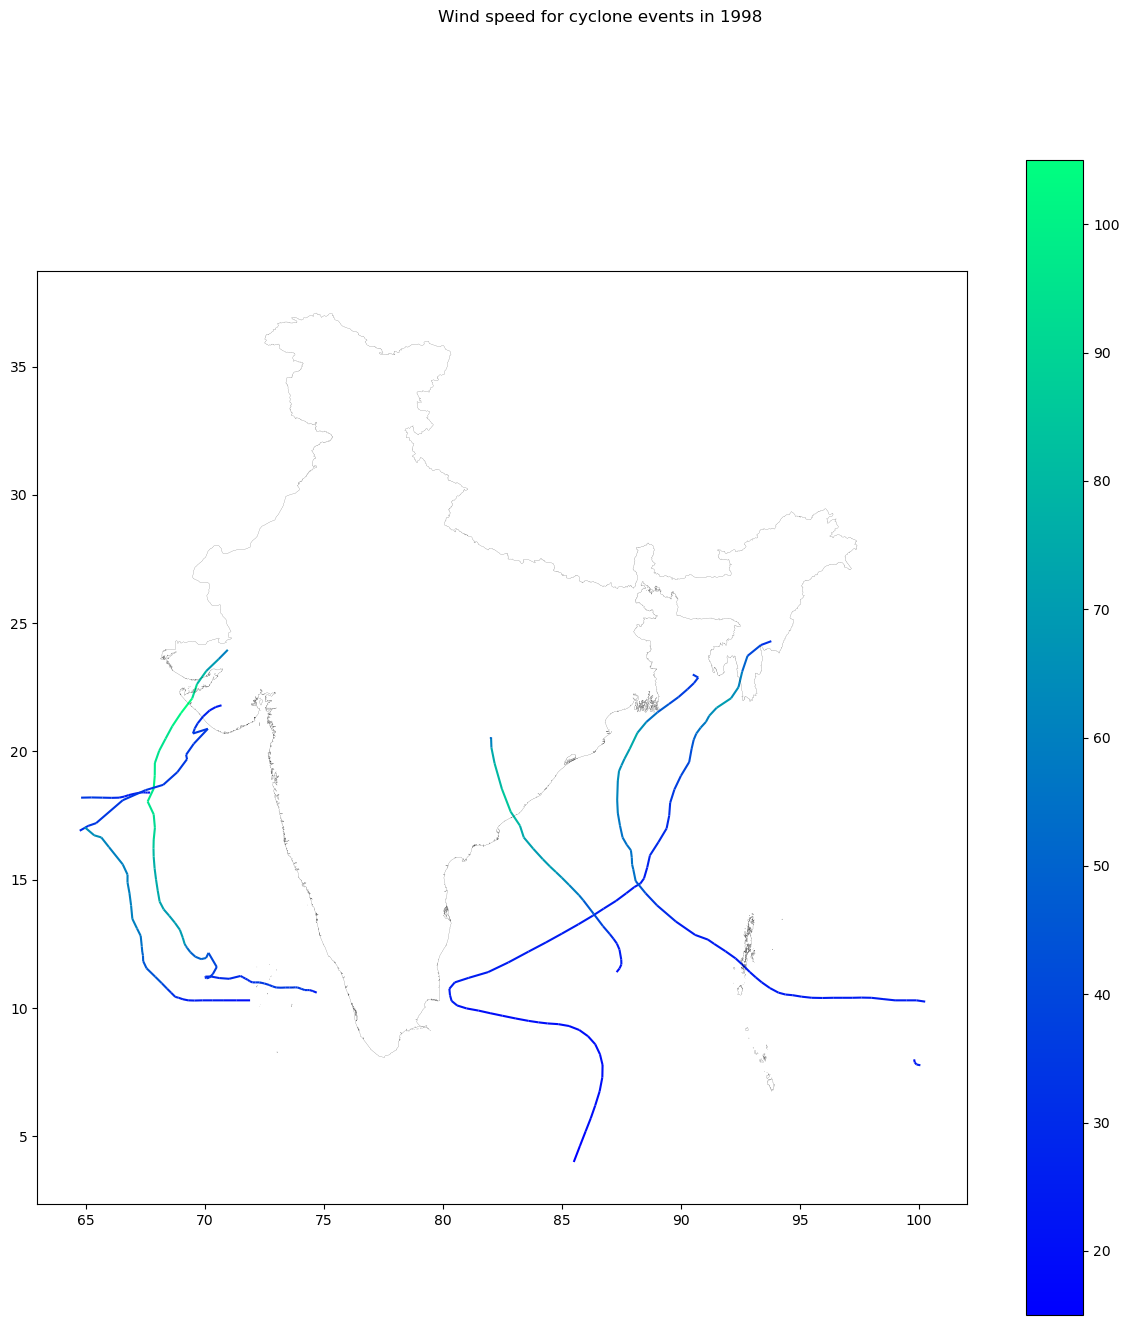

1998


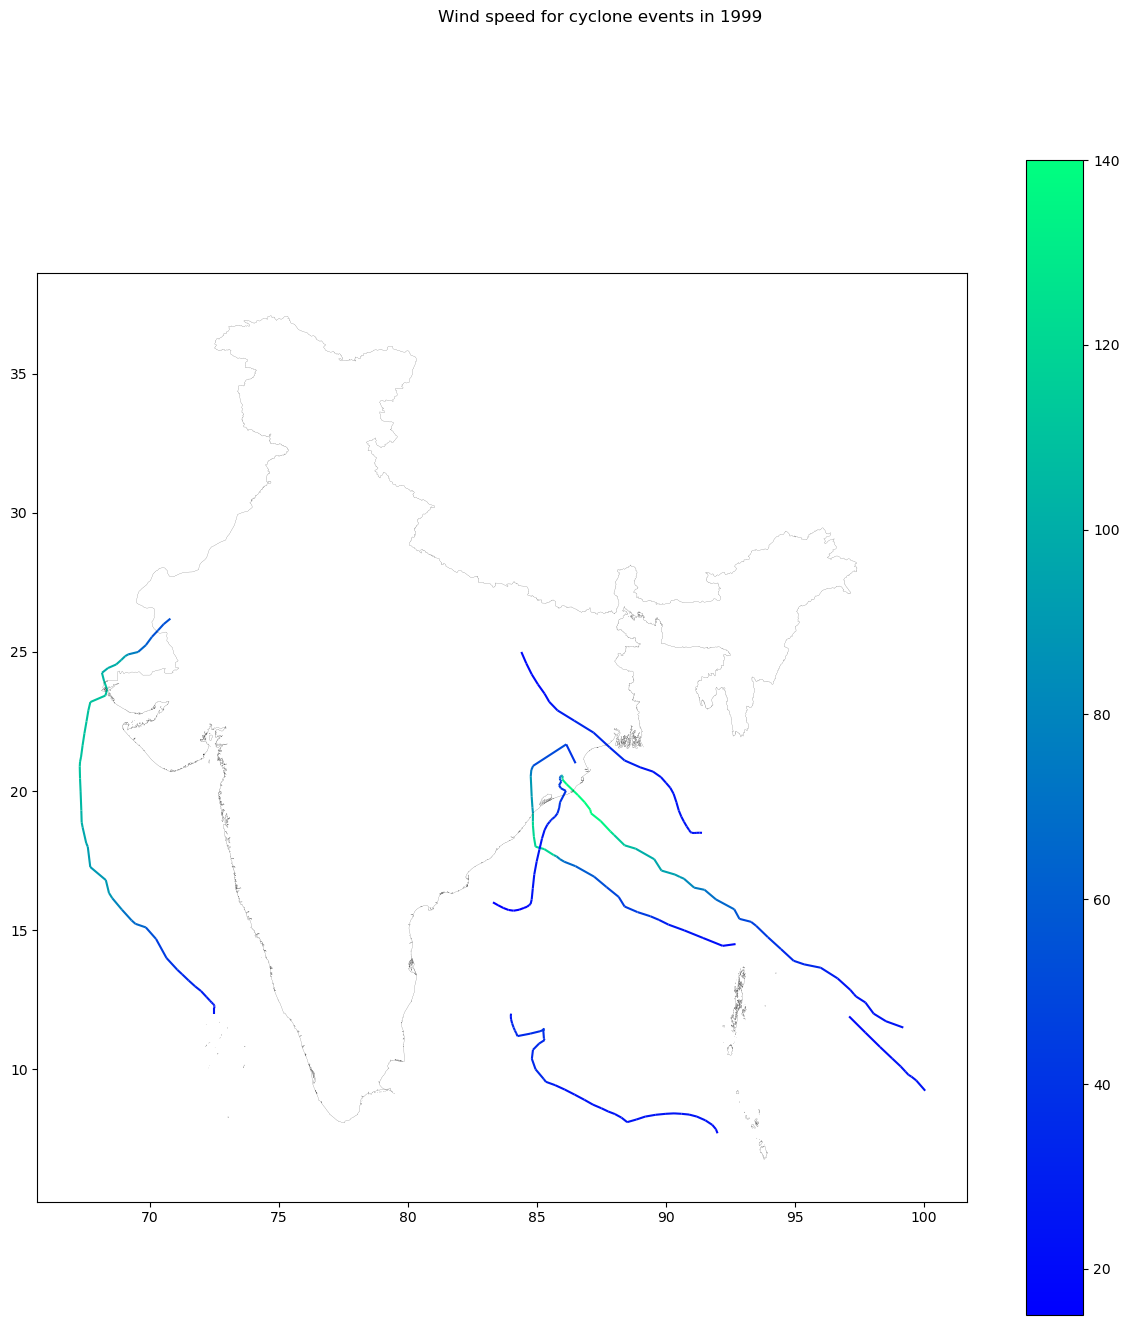

1999


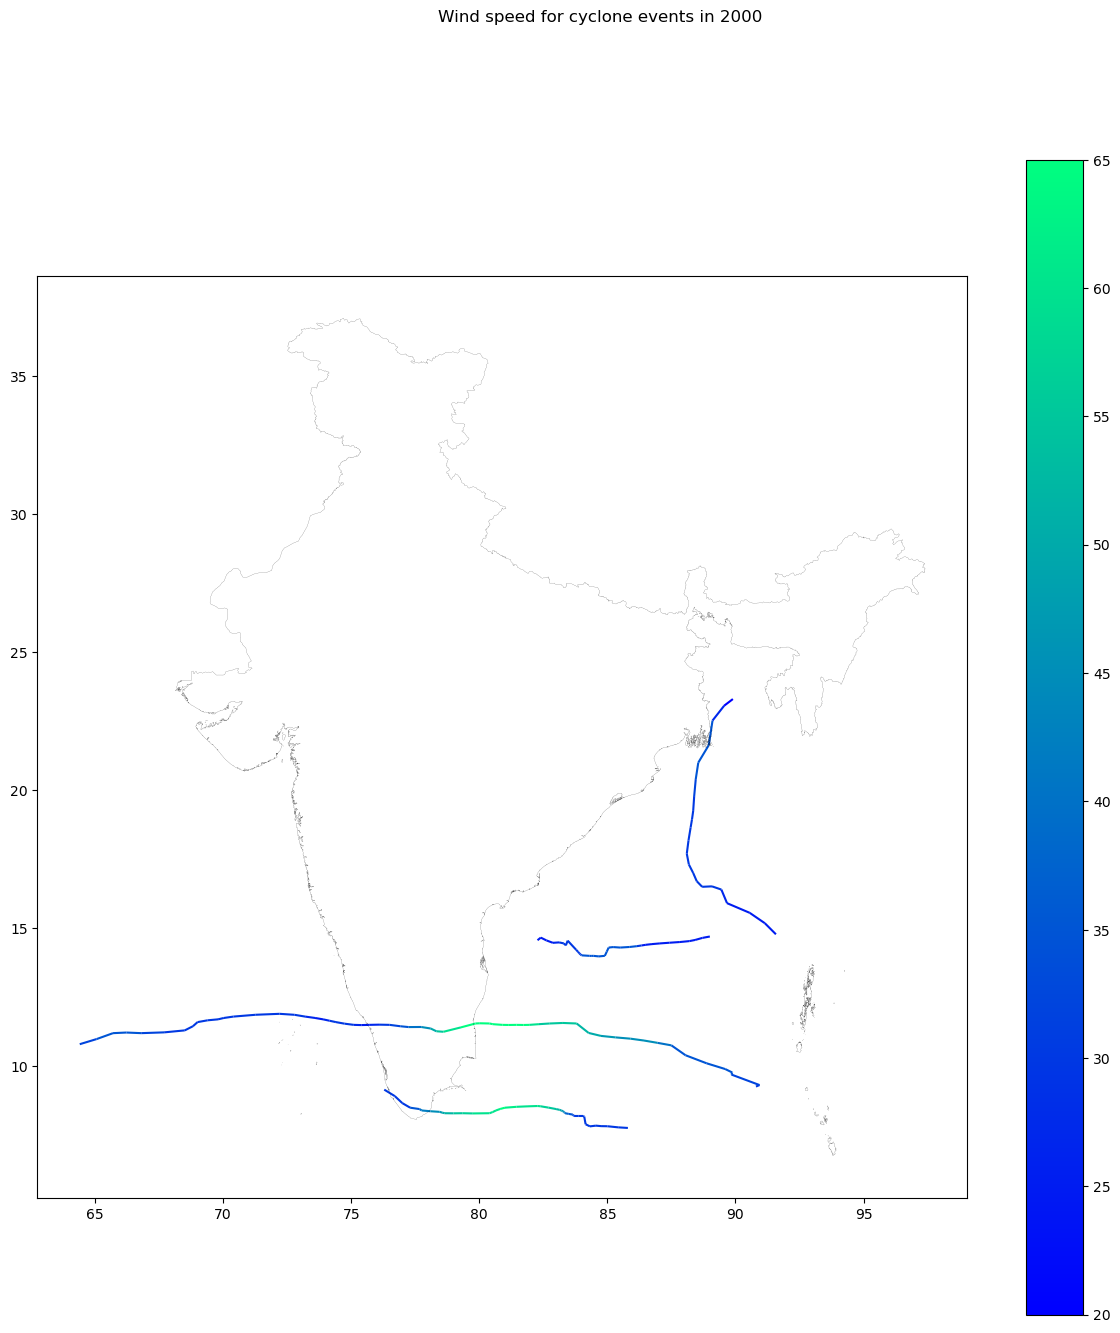

2000


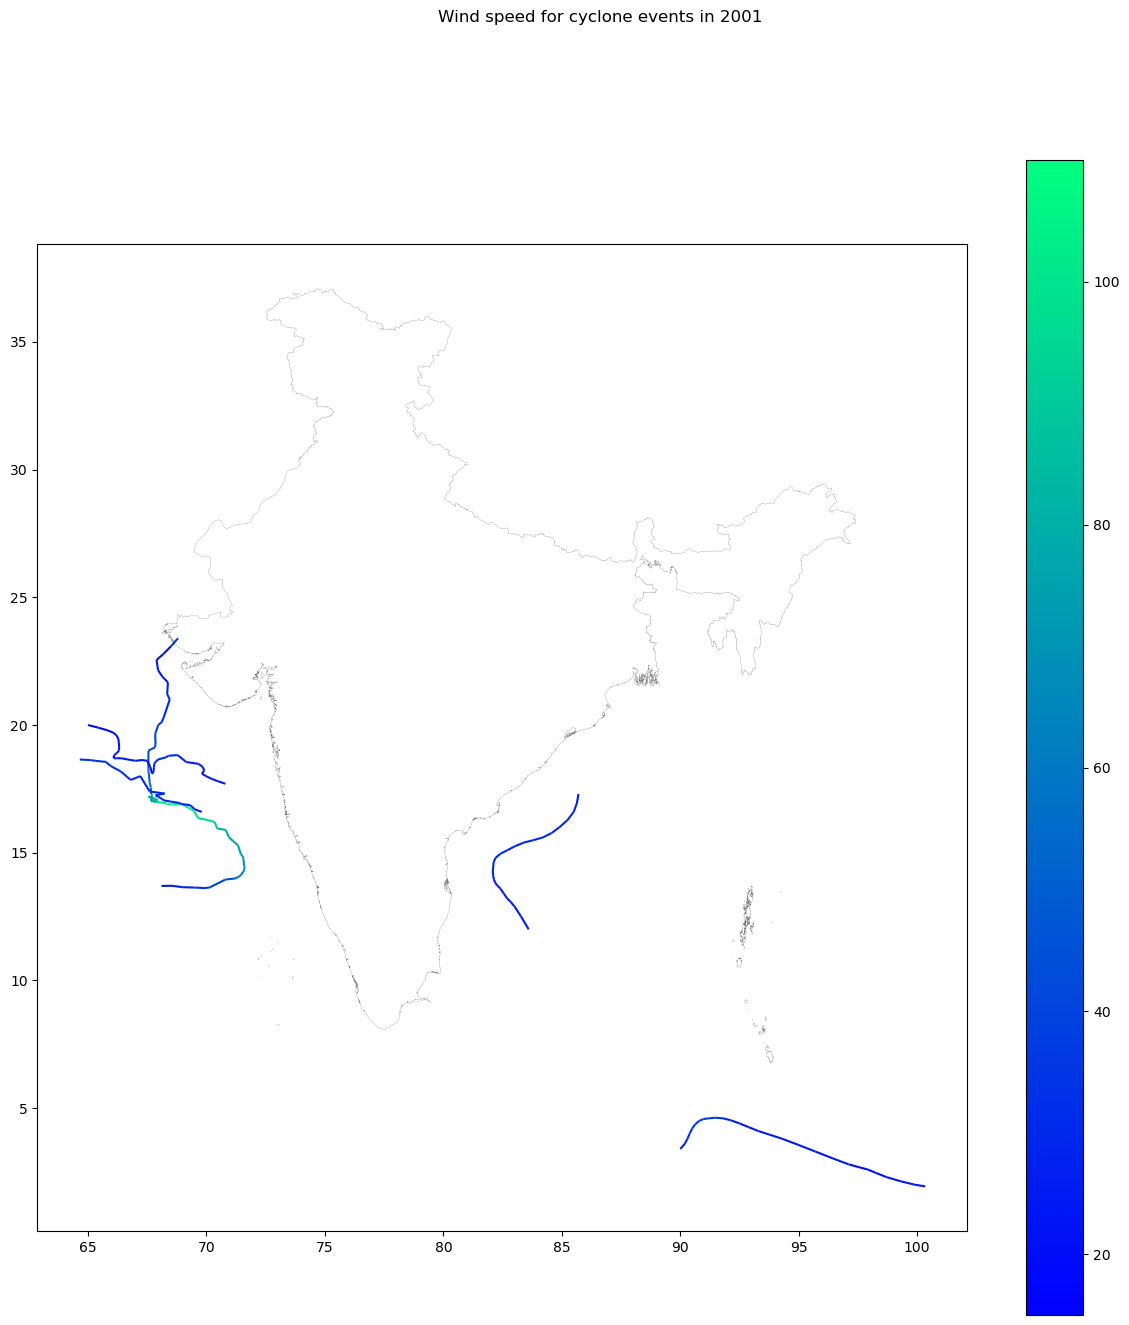

2001


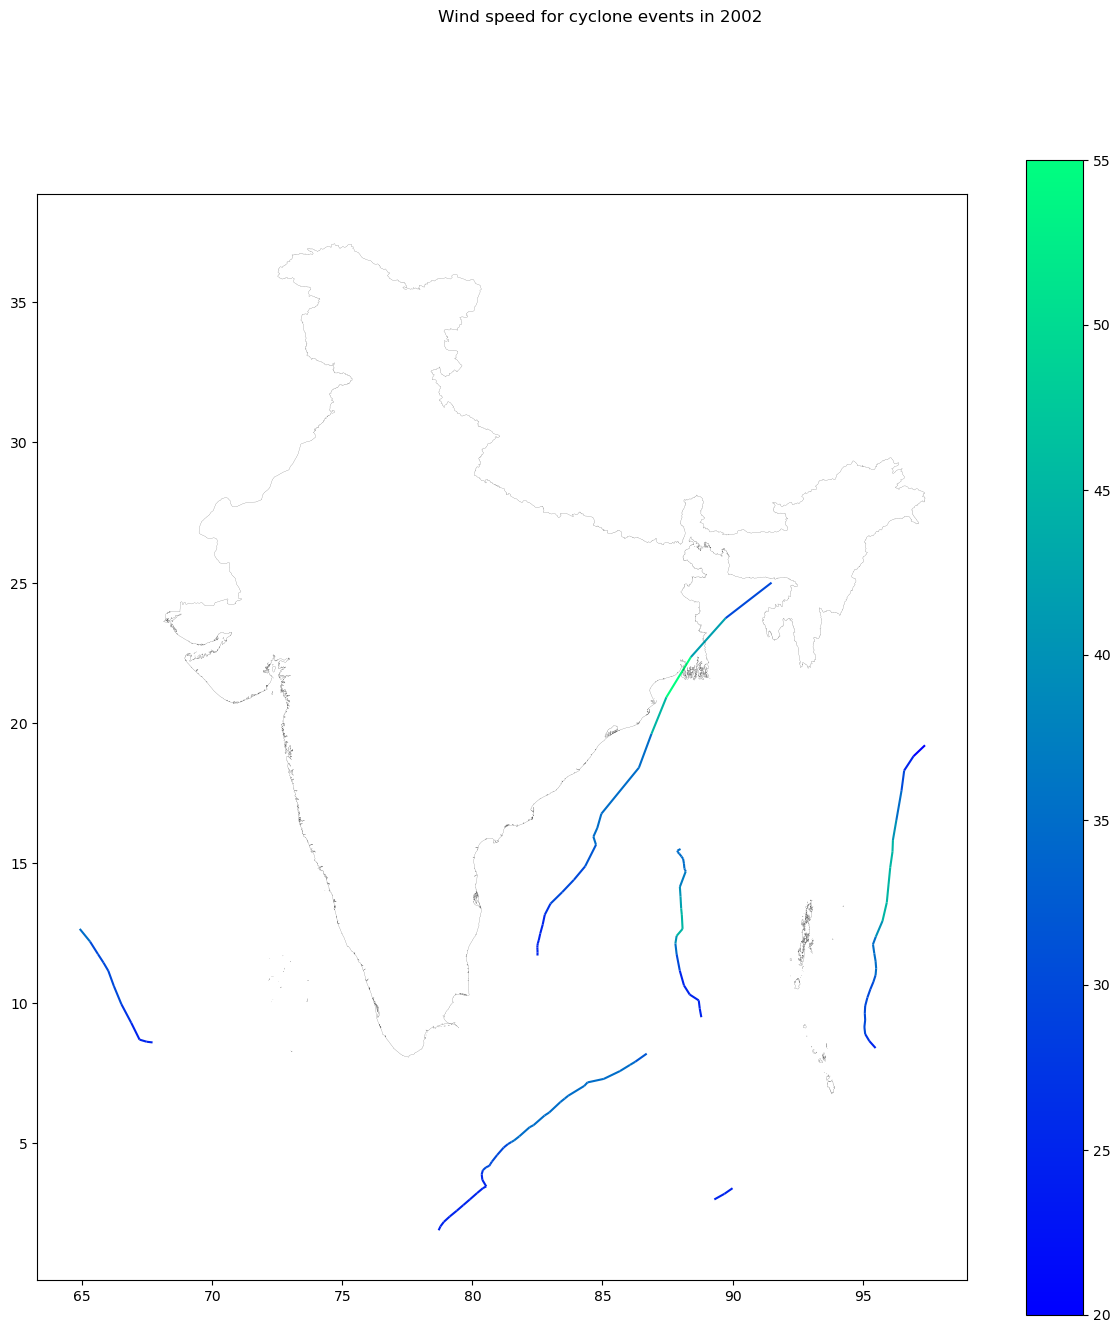

2002


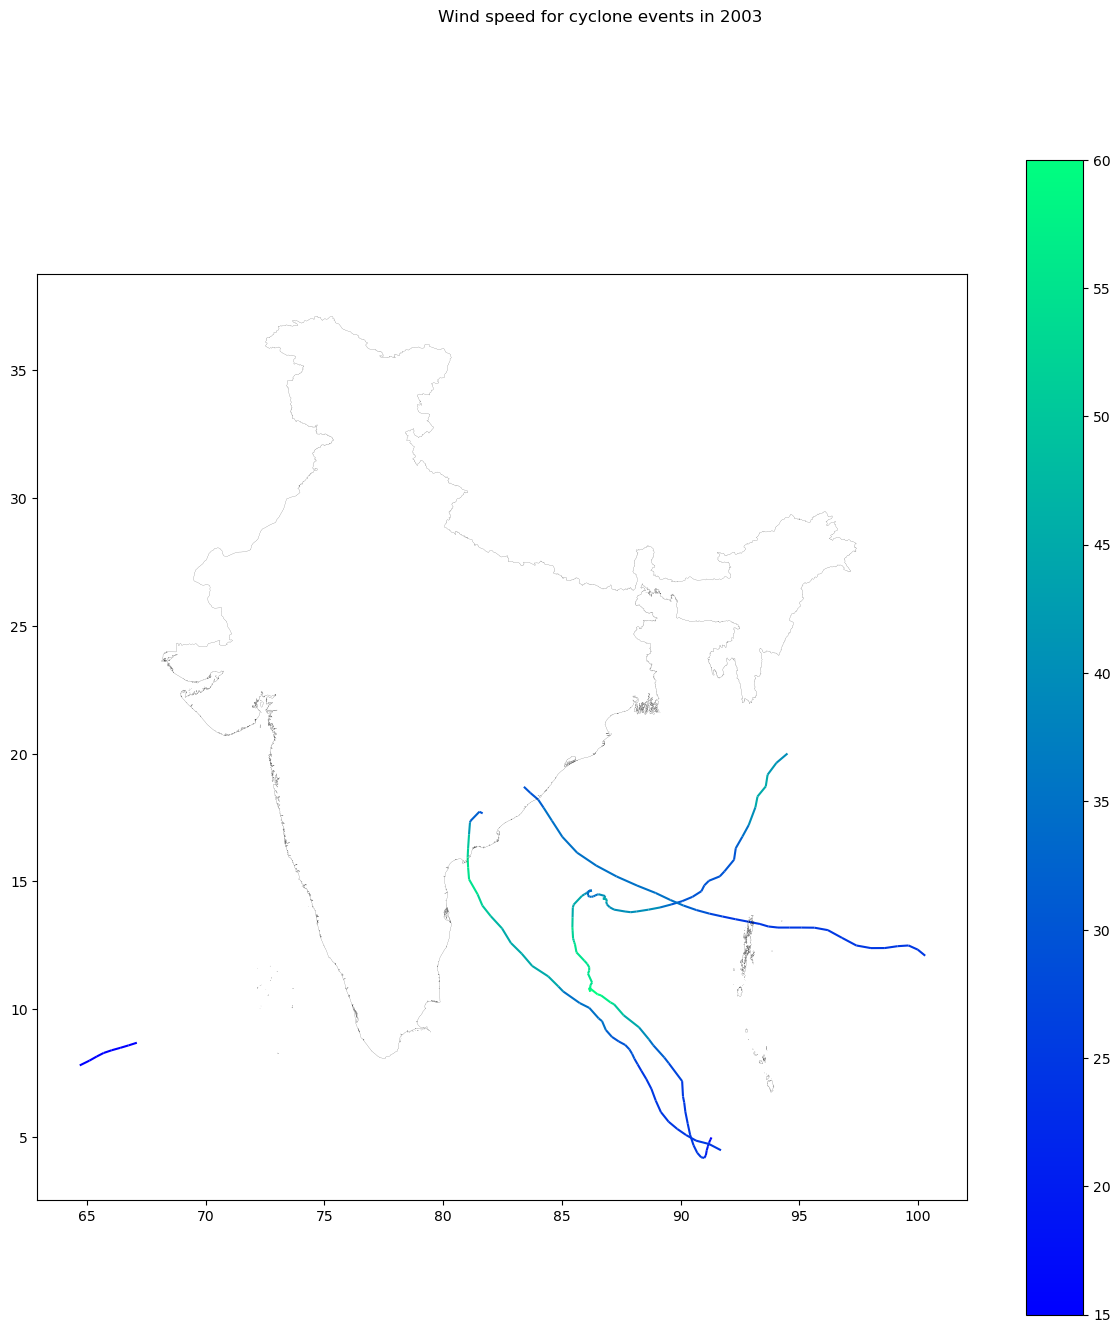

2003


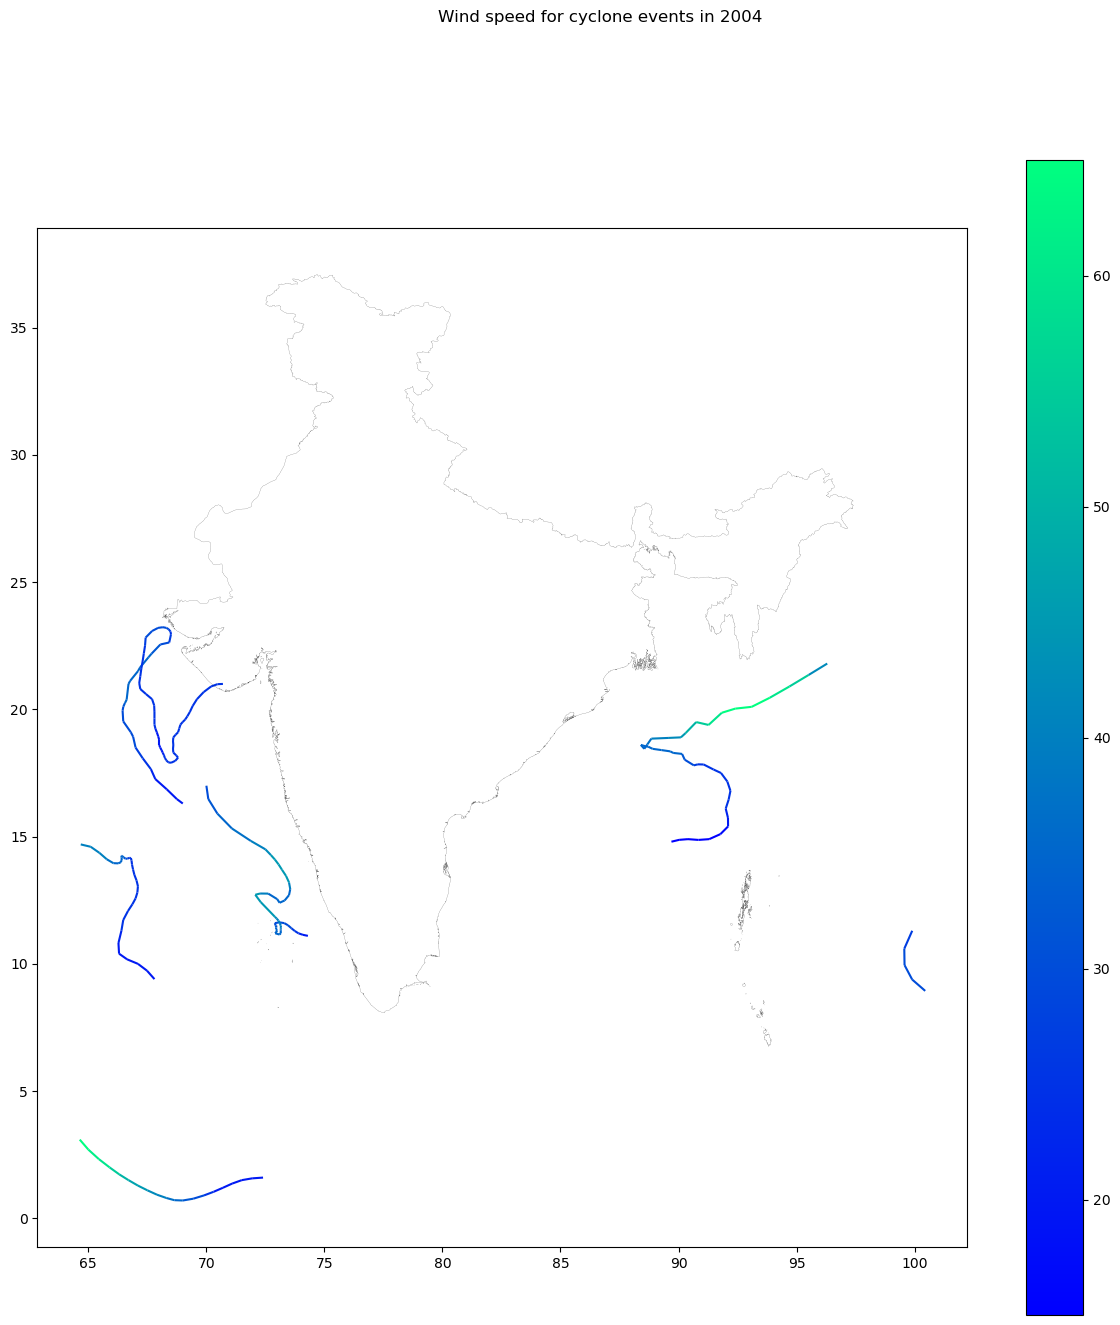

2004


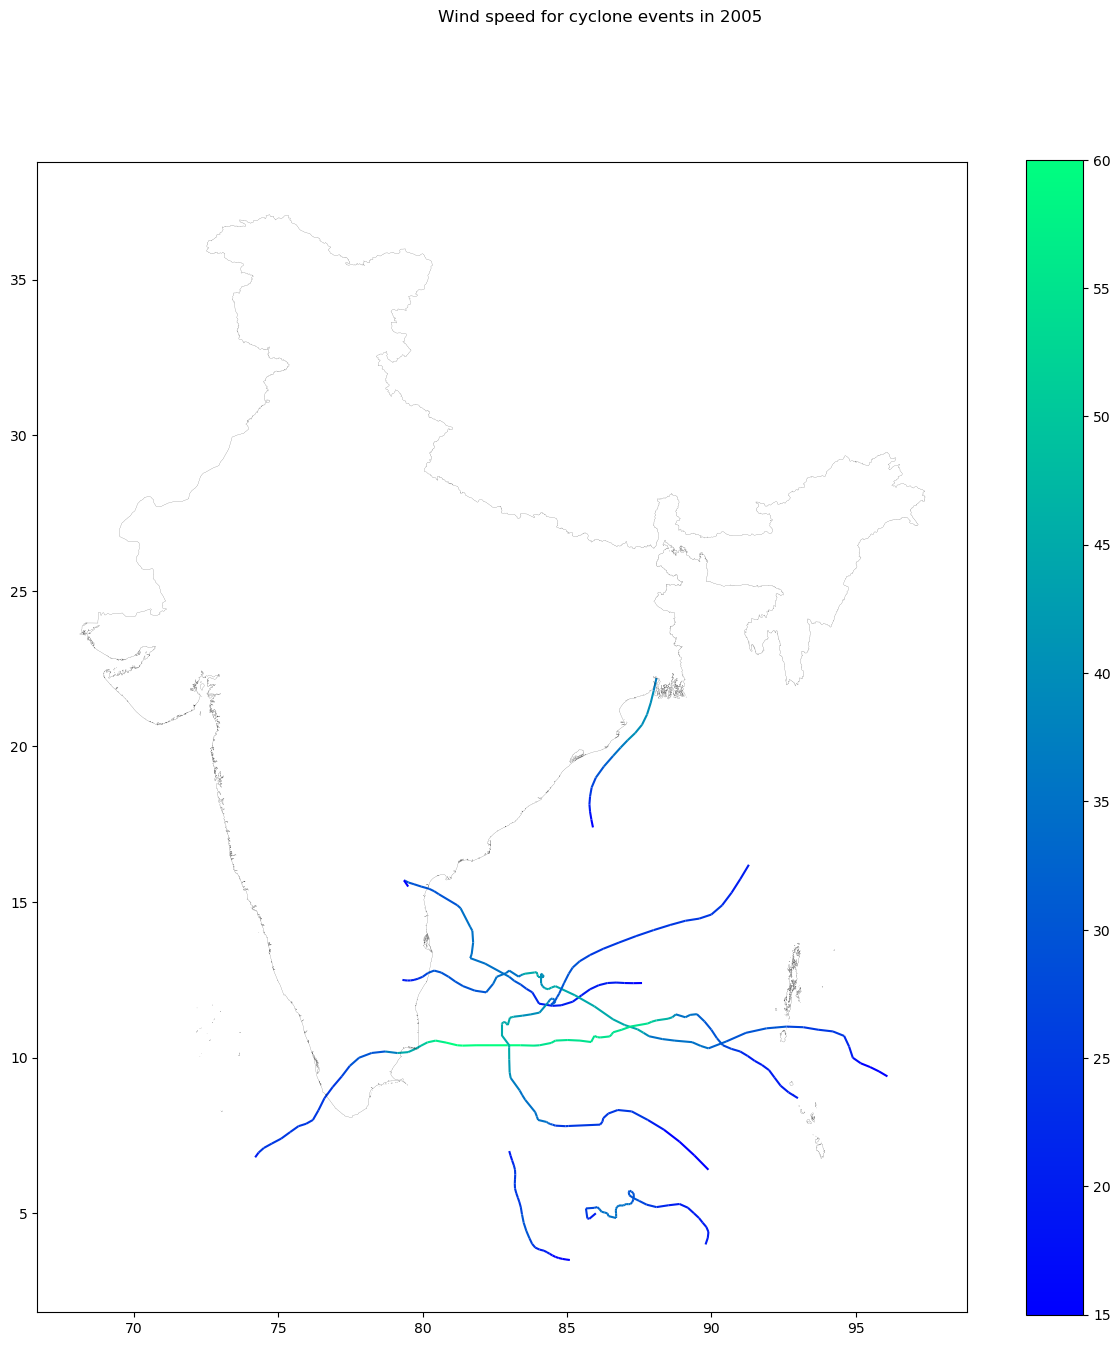

2005


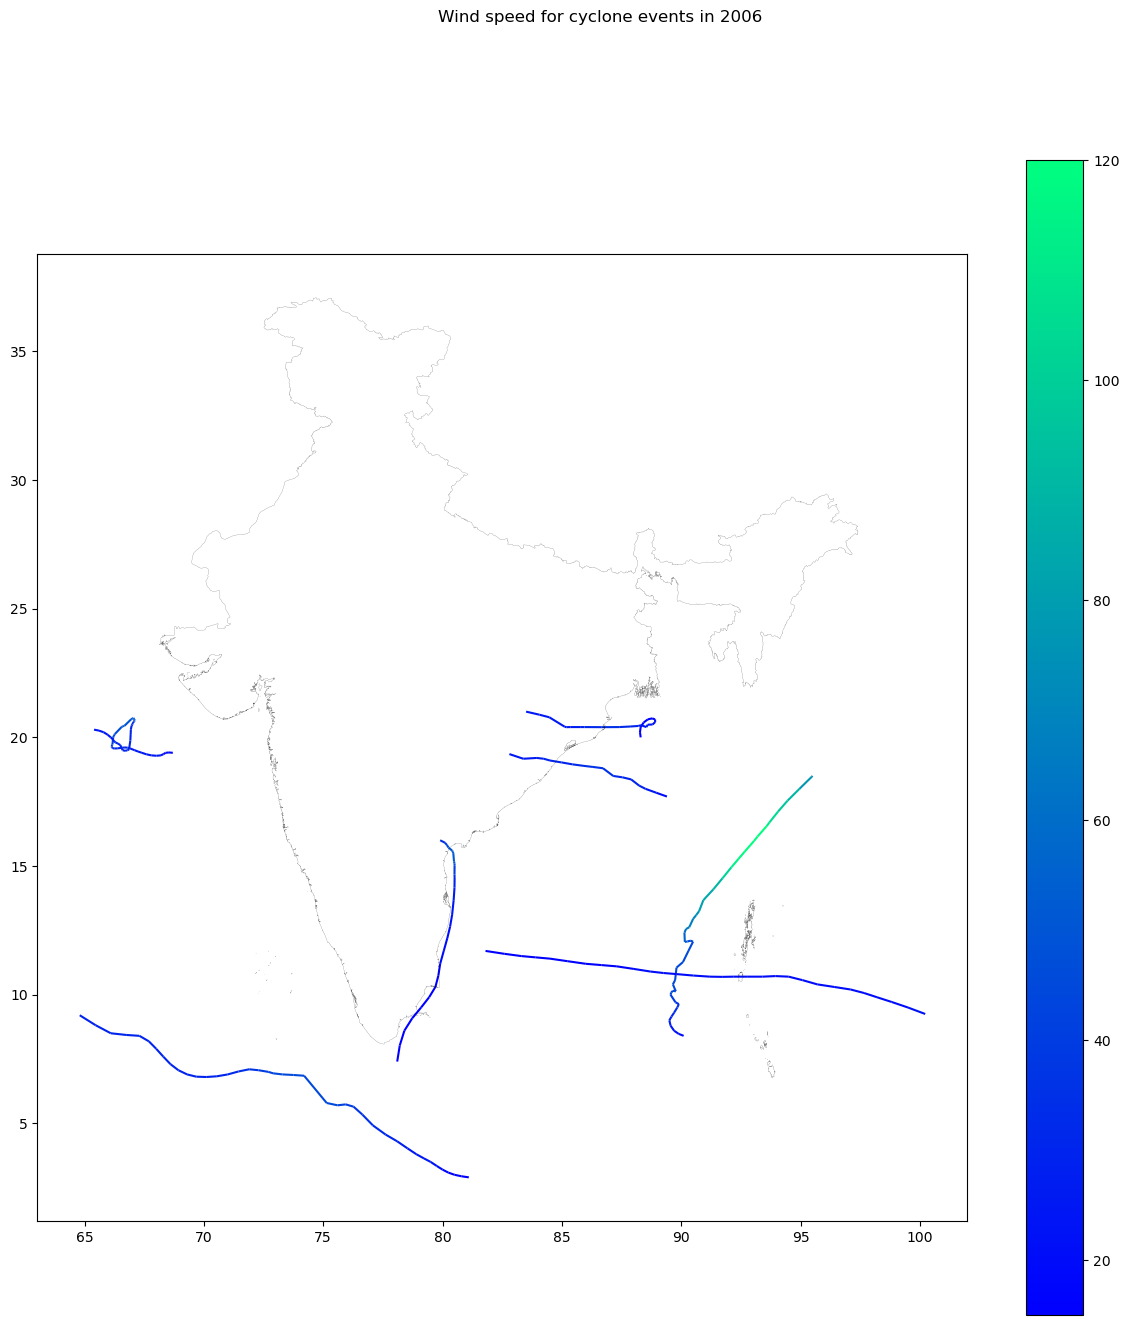

2006


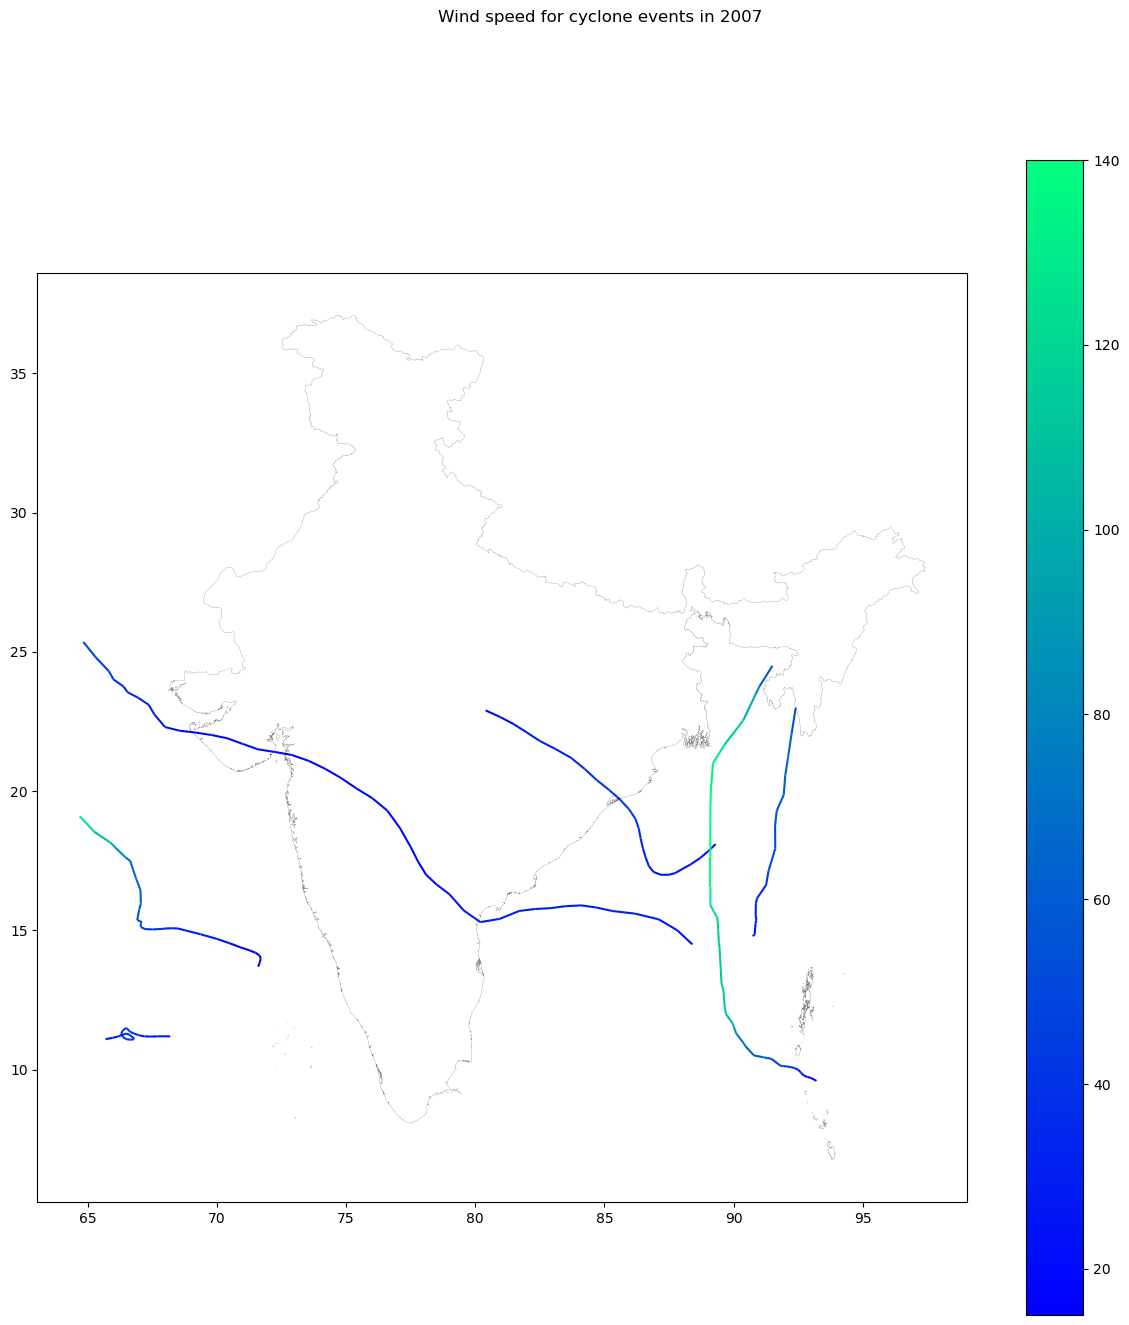

2007


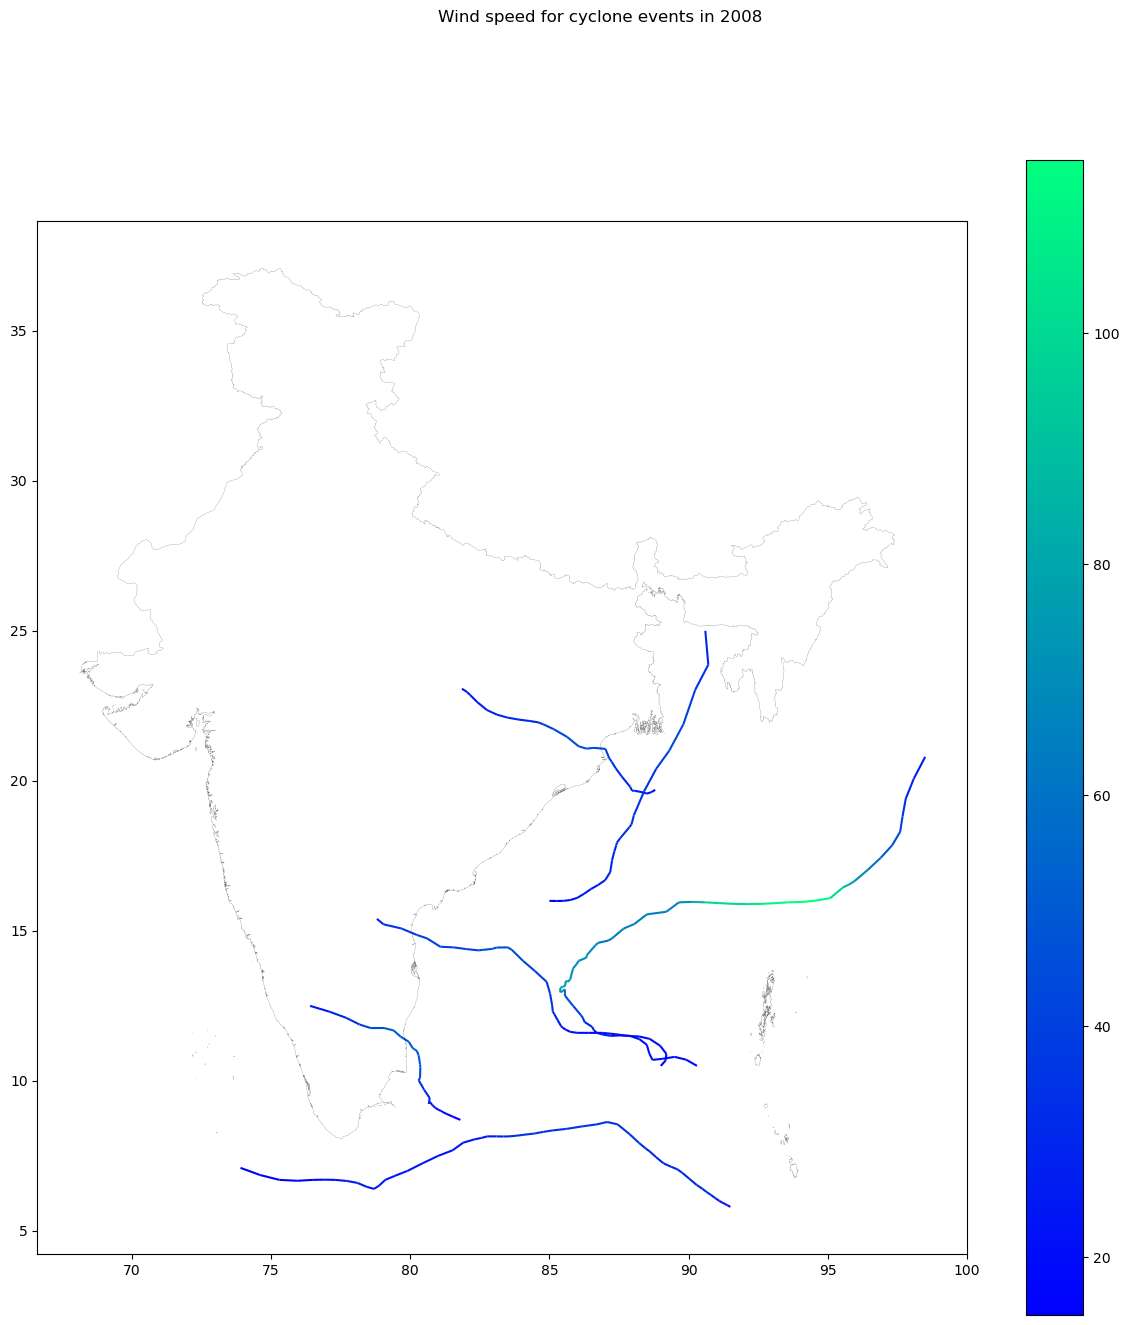

2008


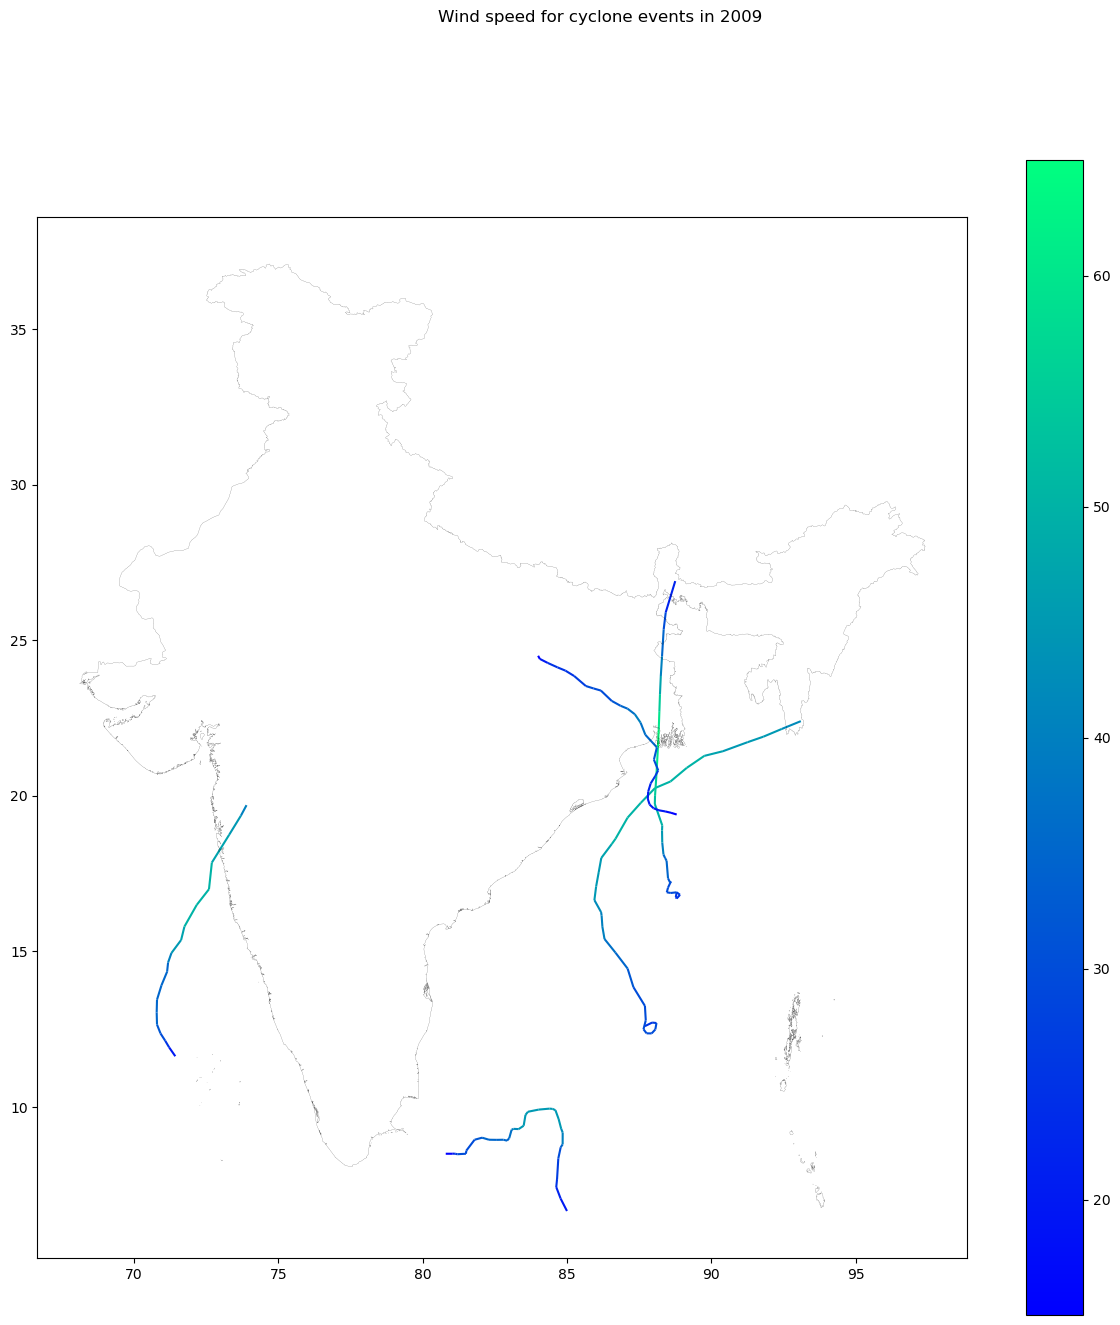

2009


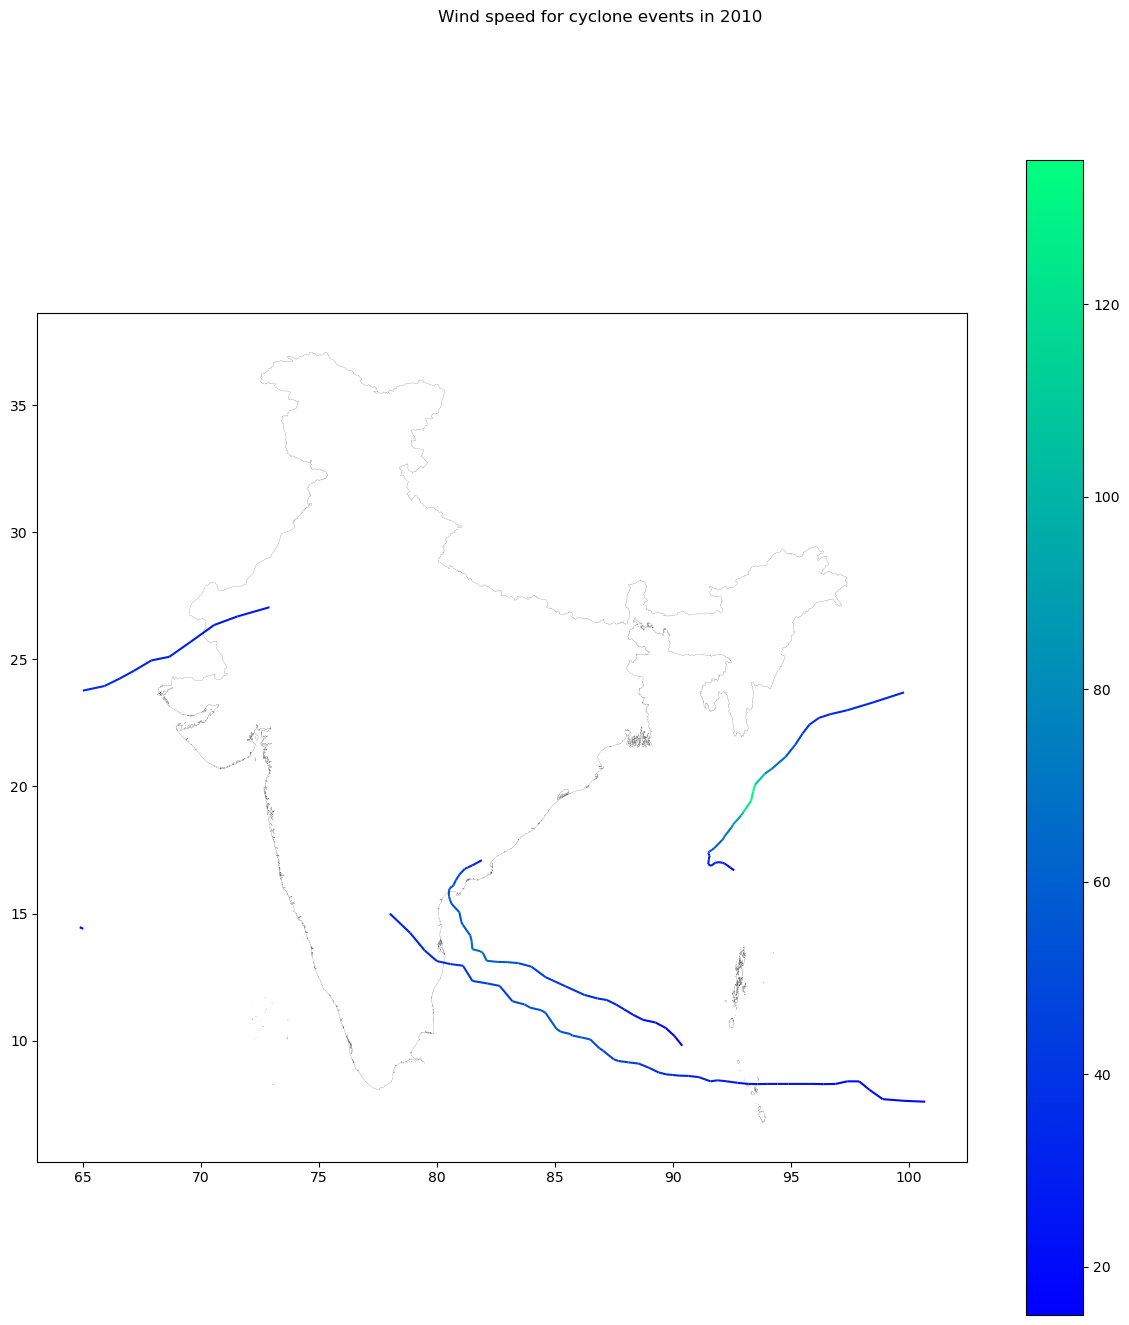

2010


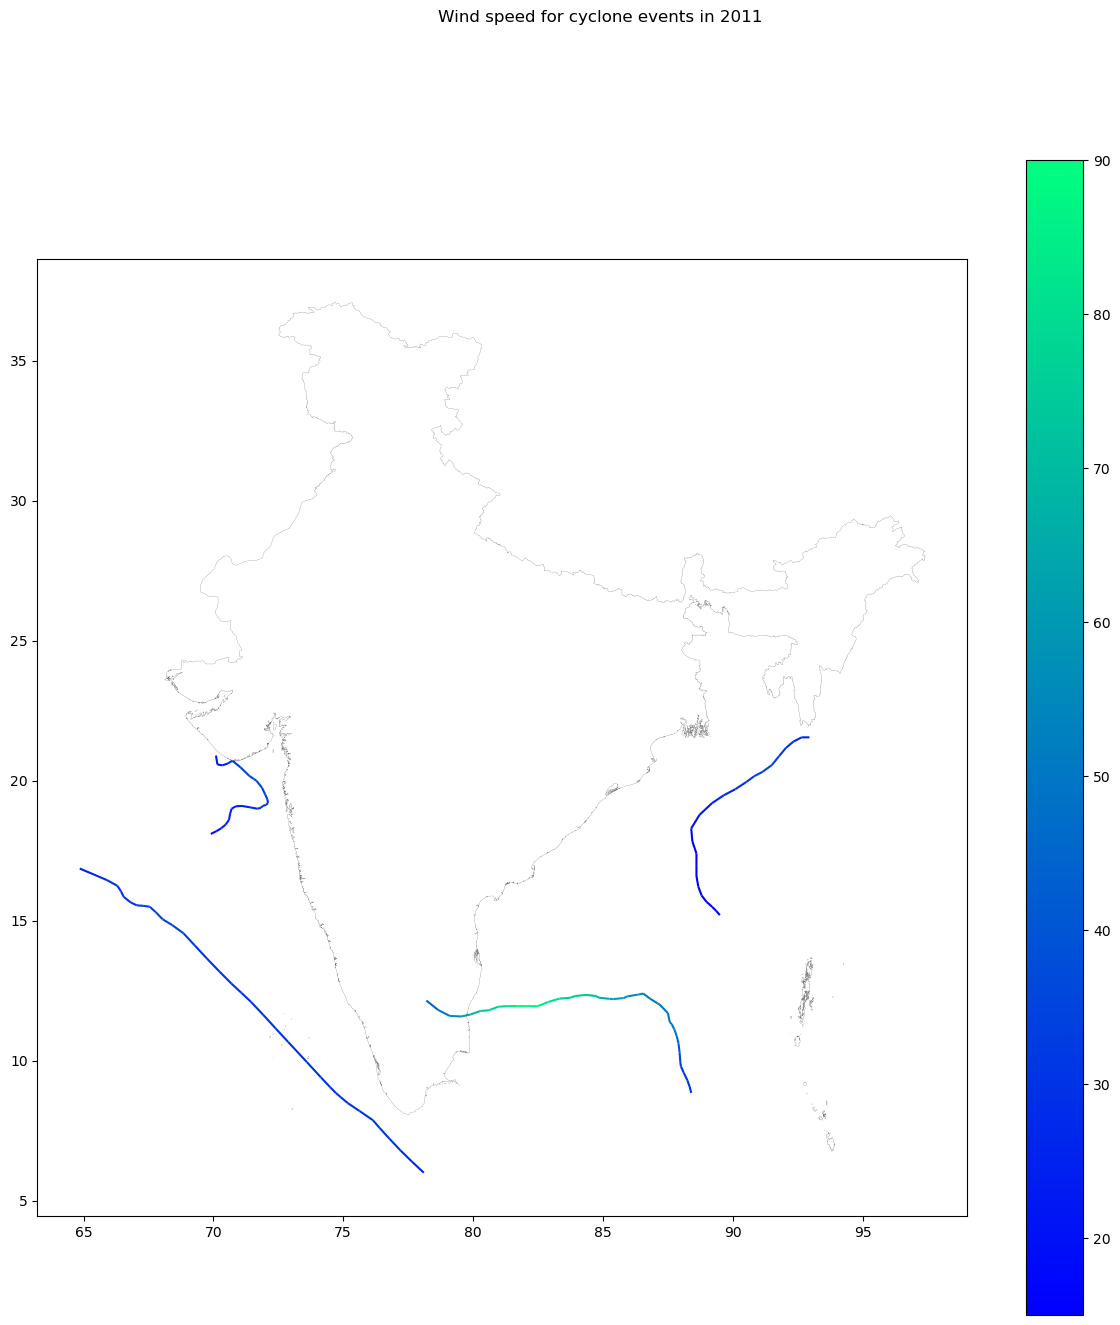

2011


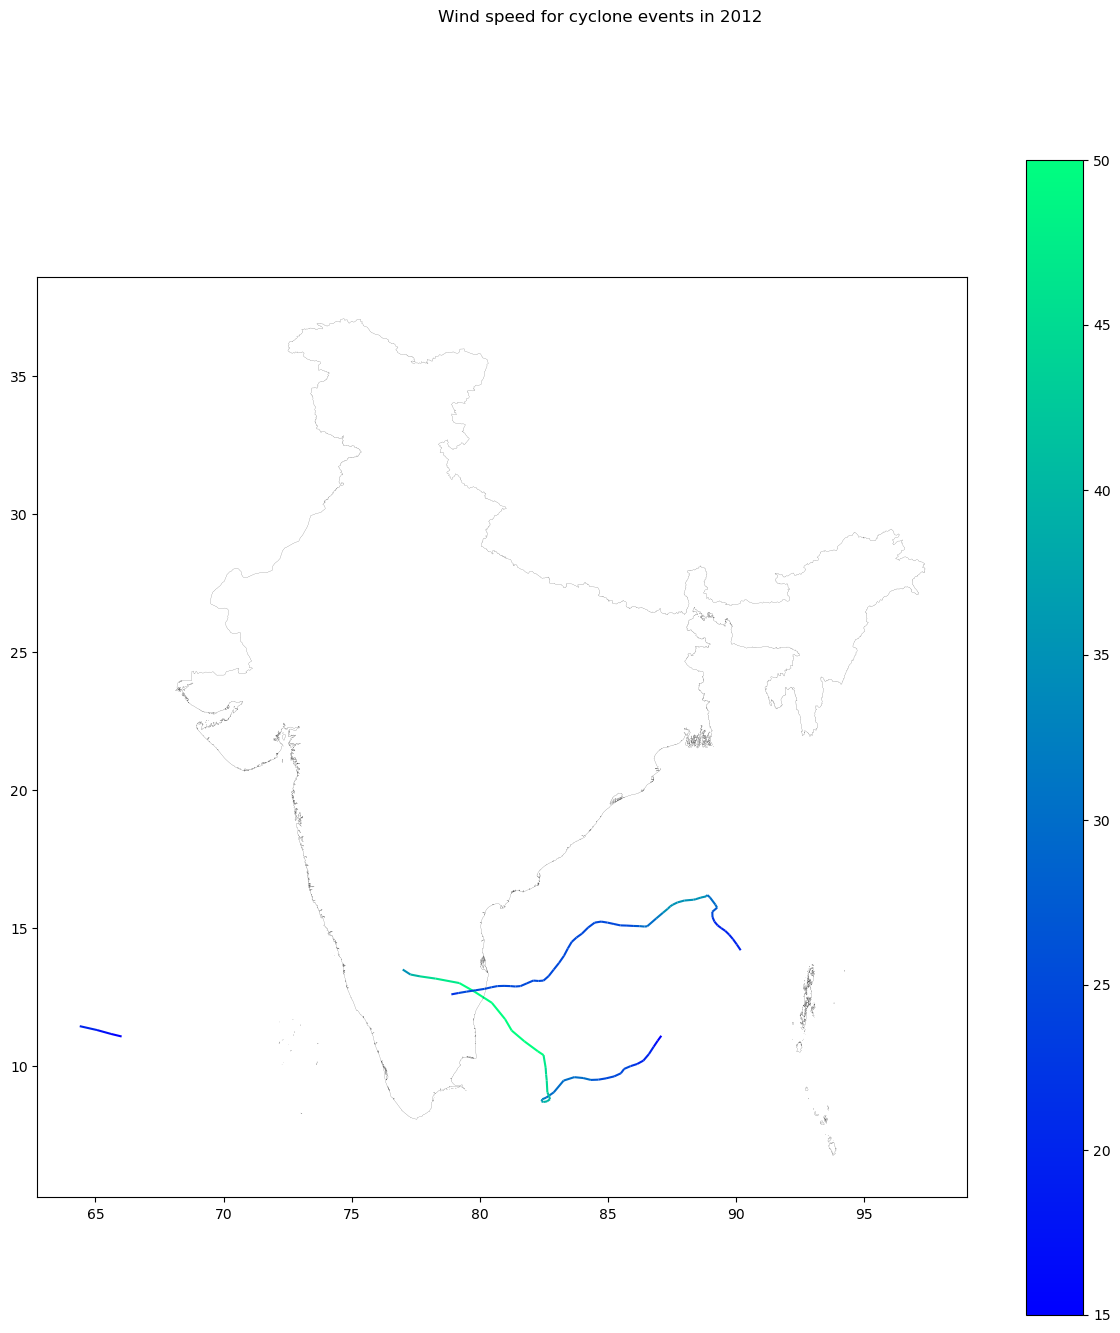

2012


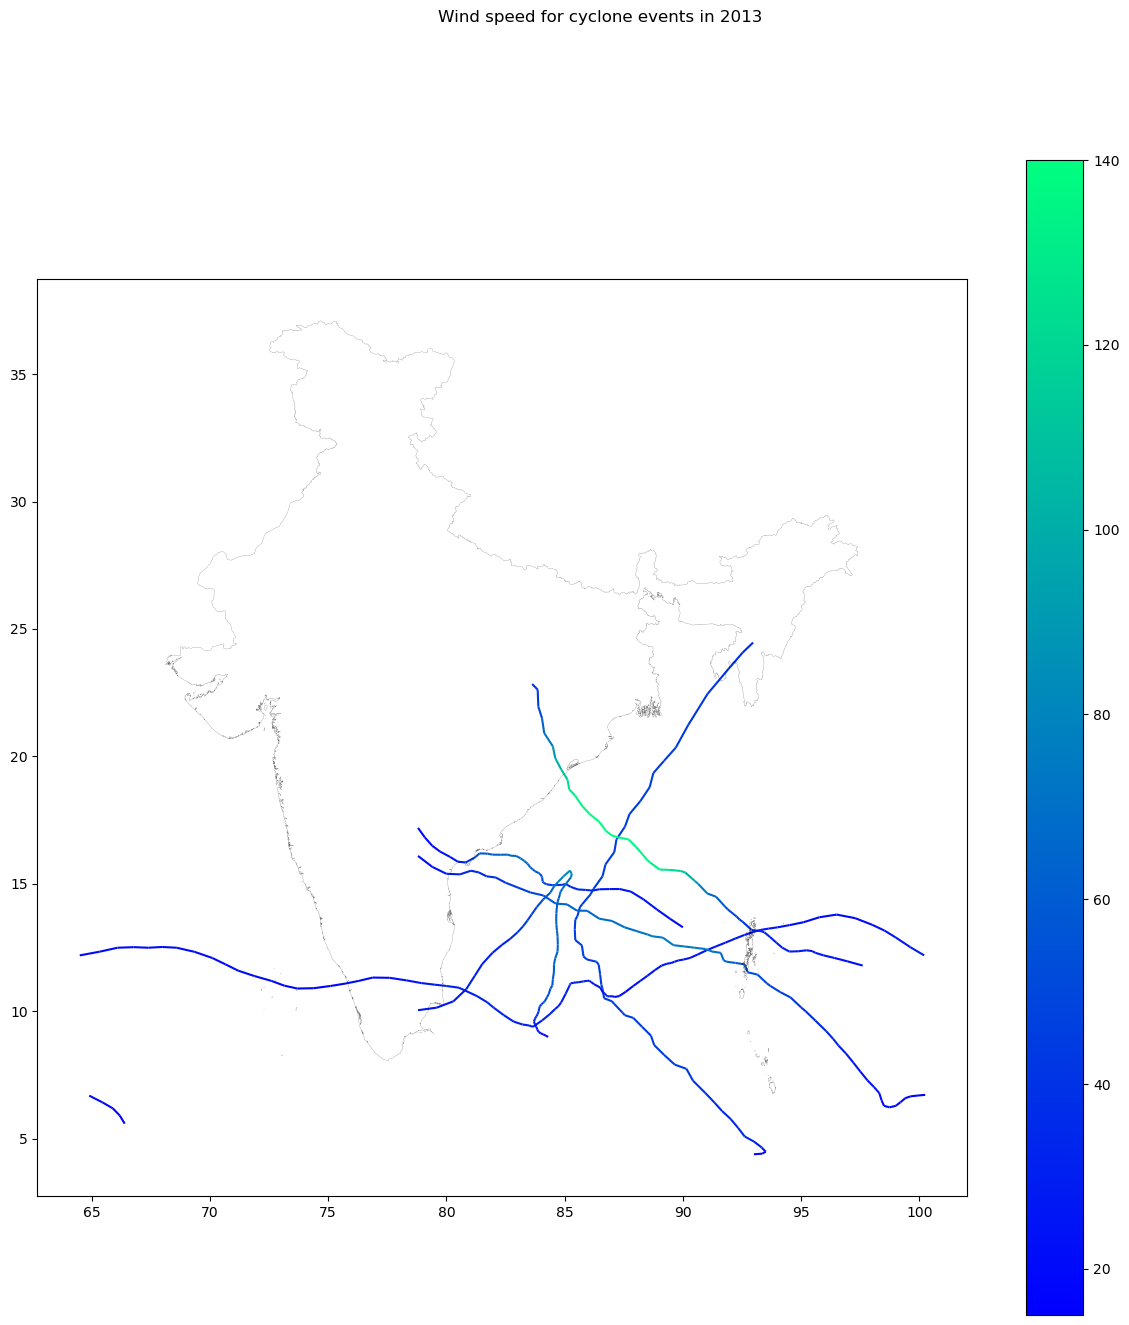

2013


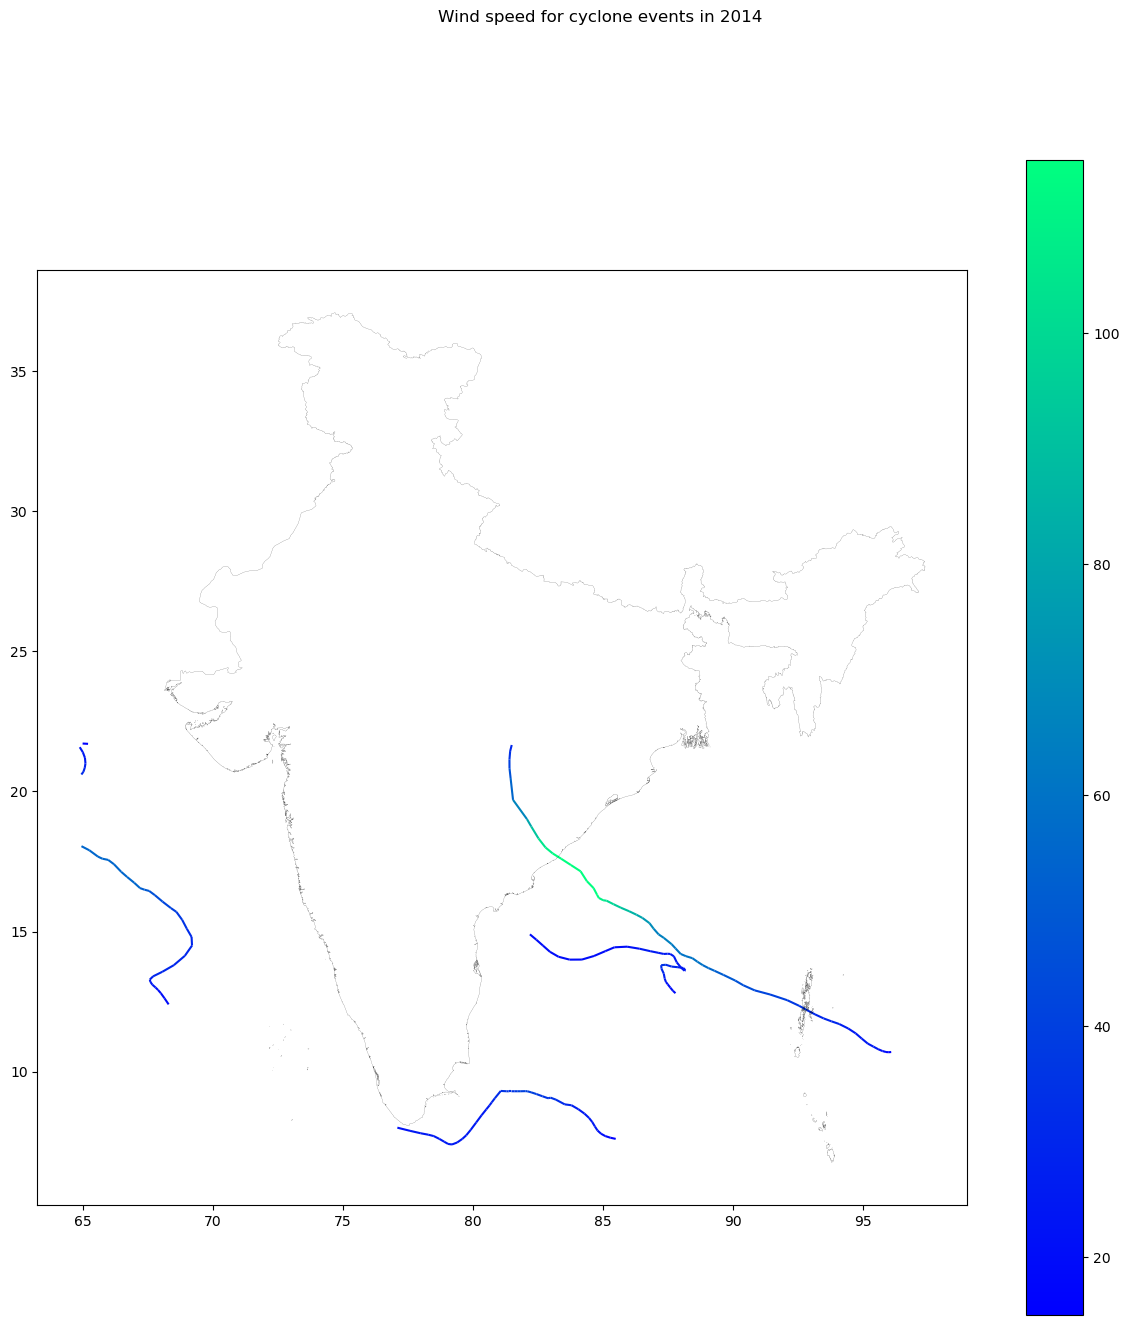

2014


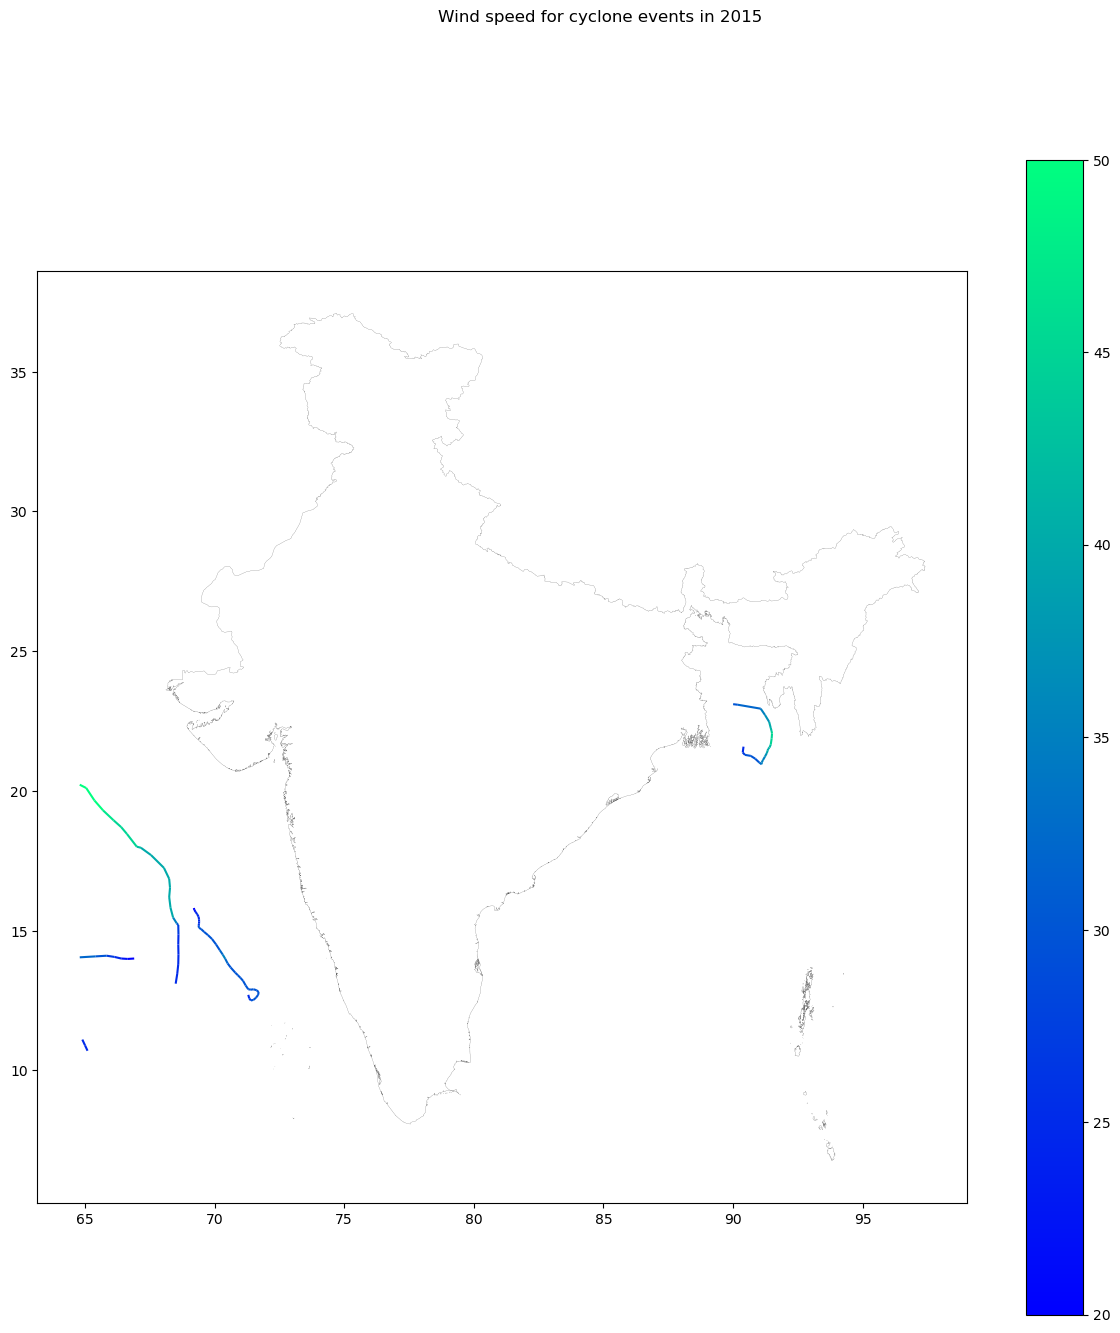

2015


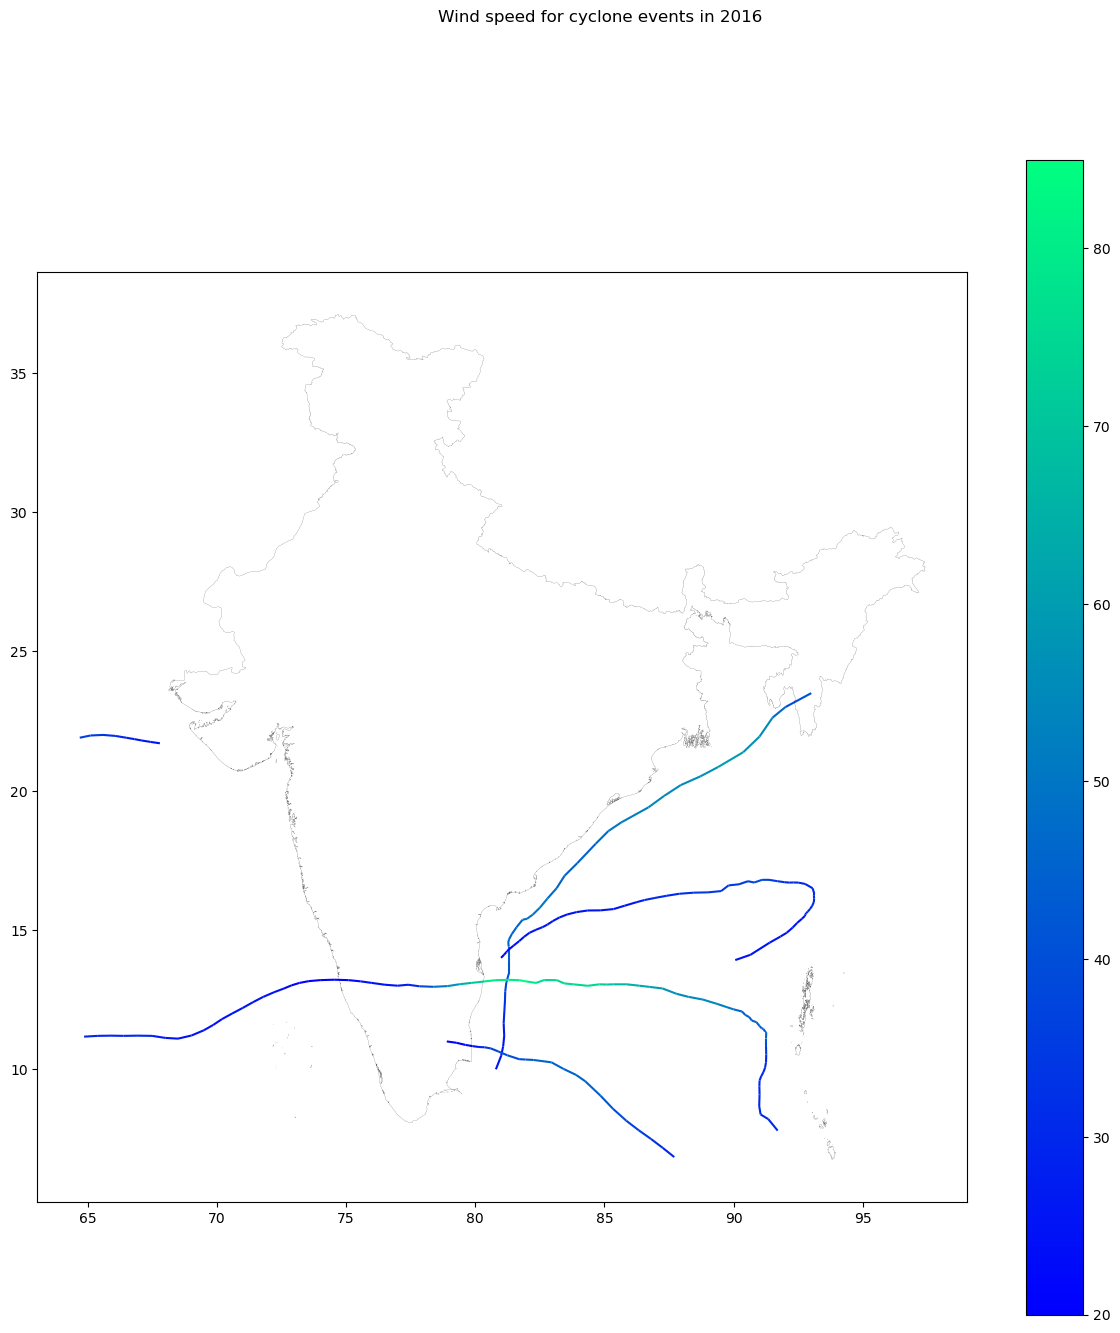

2016


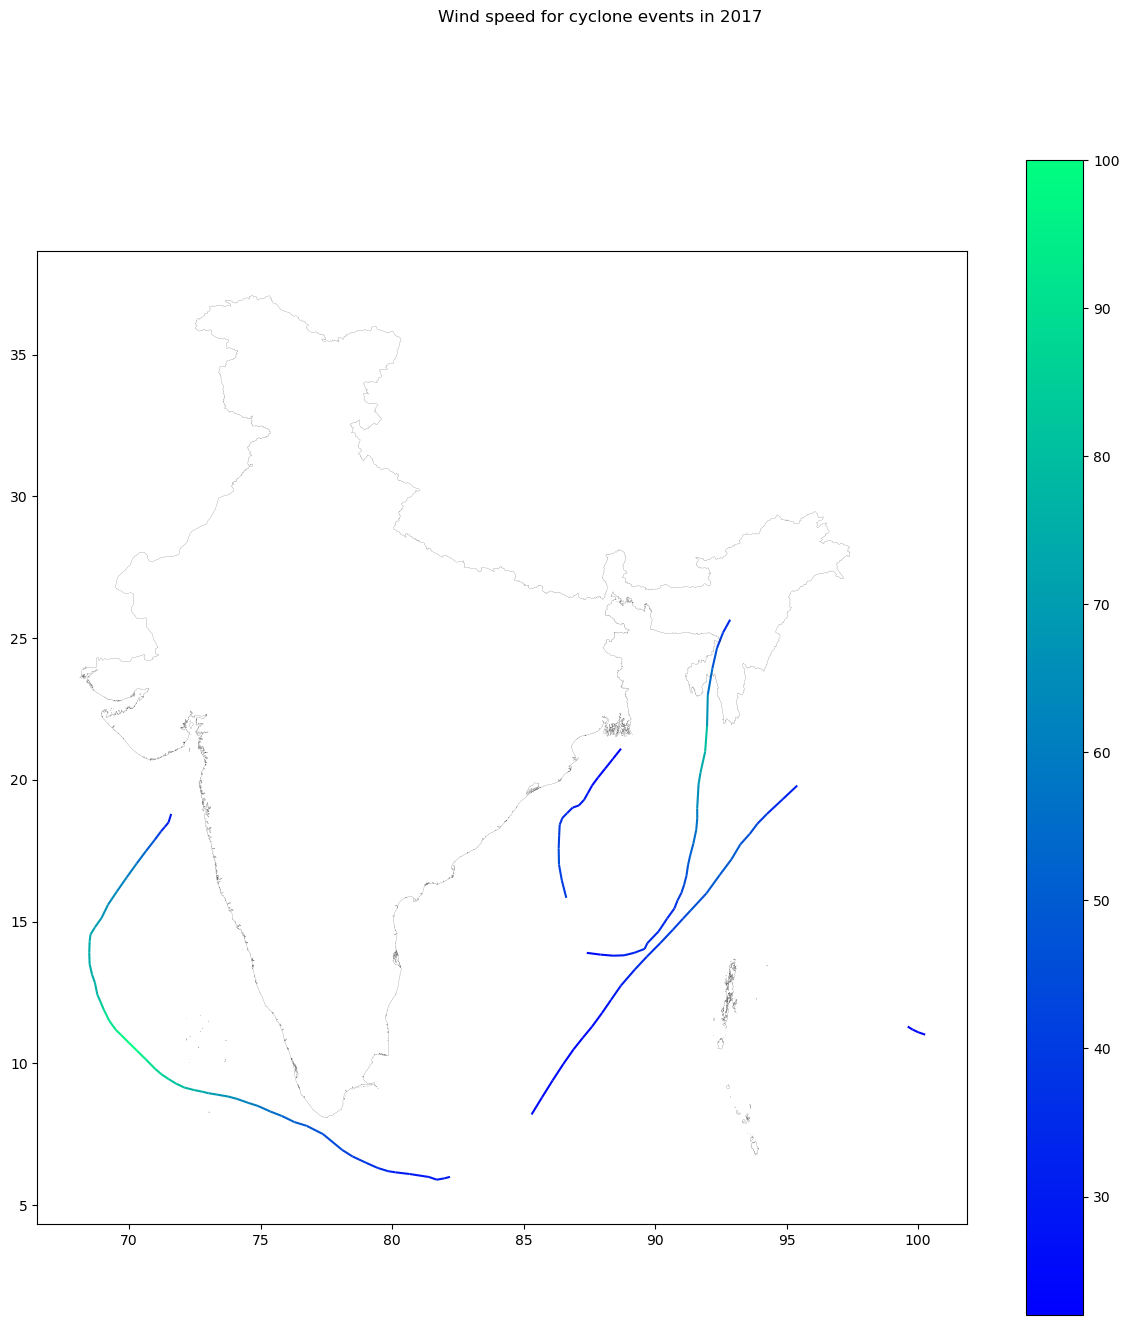

2017


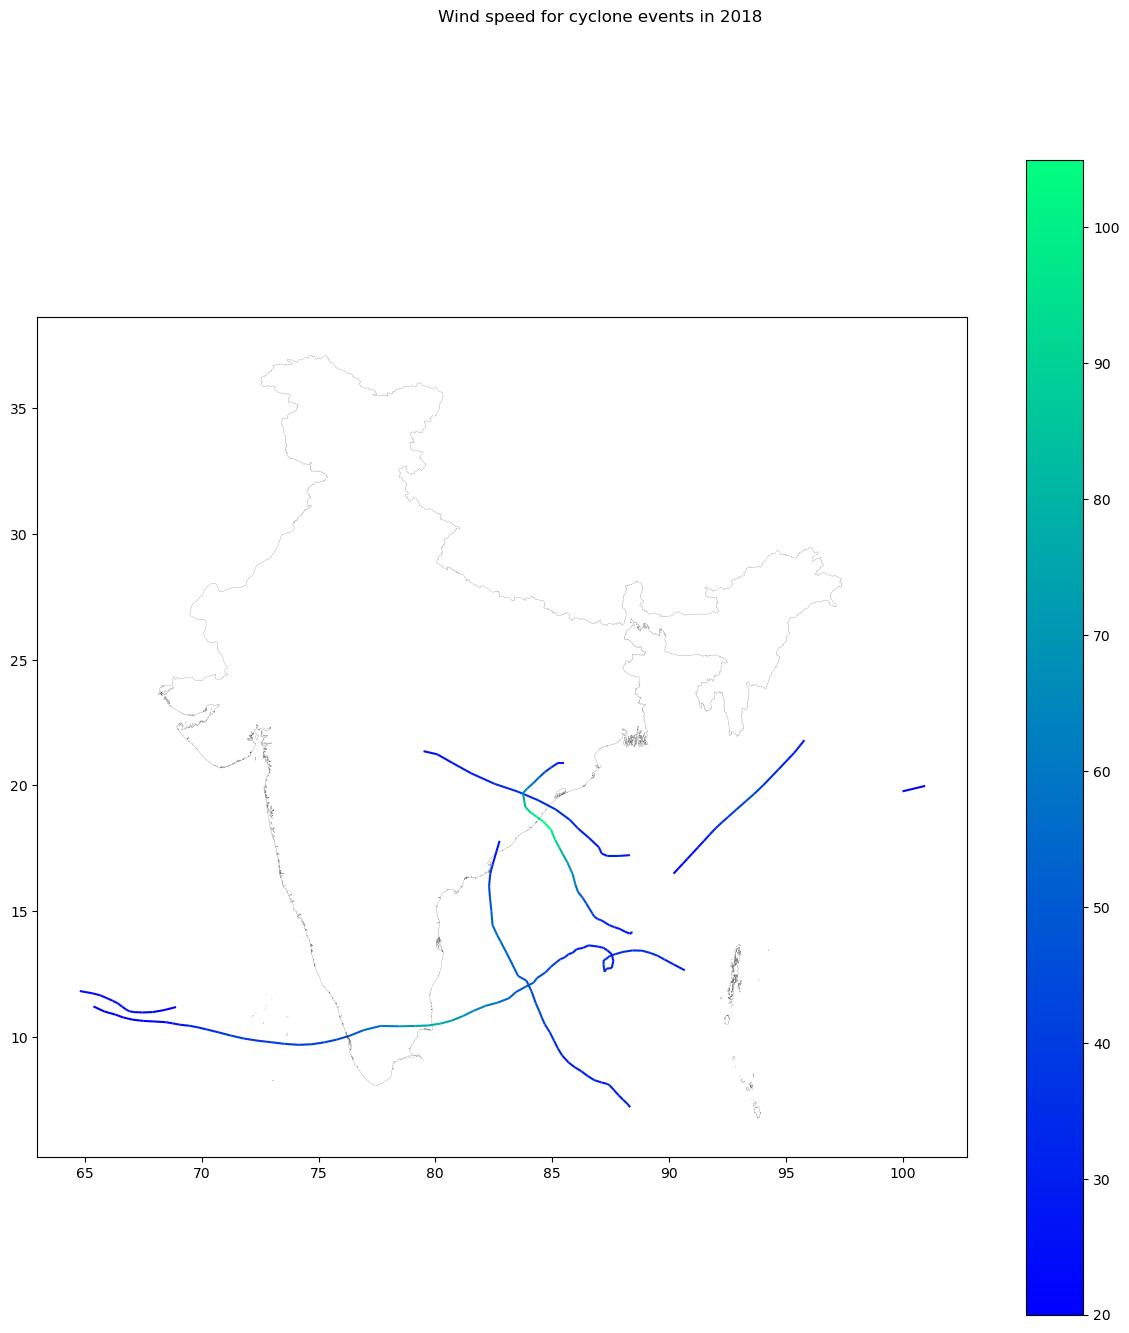

2018


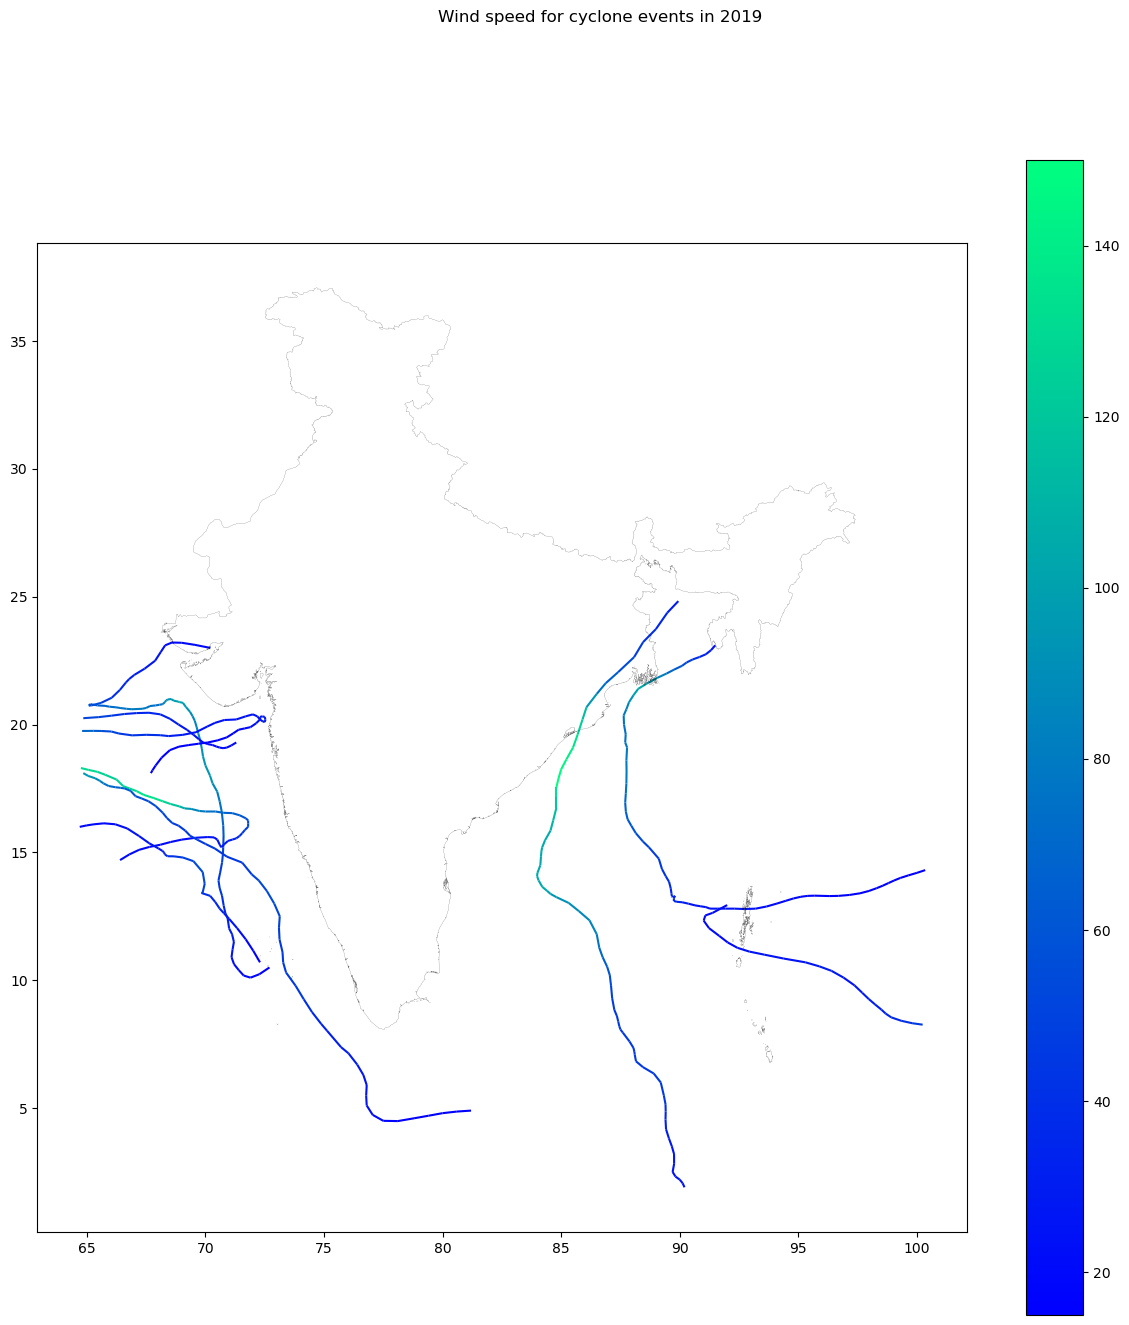

2019


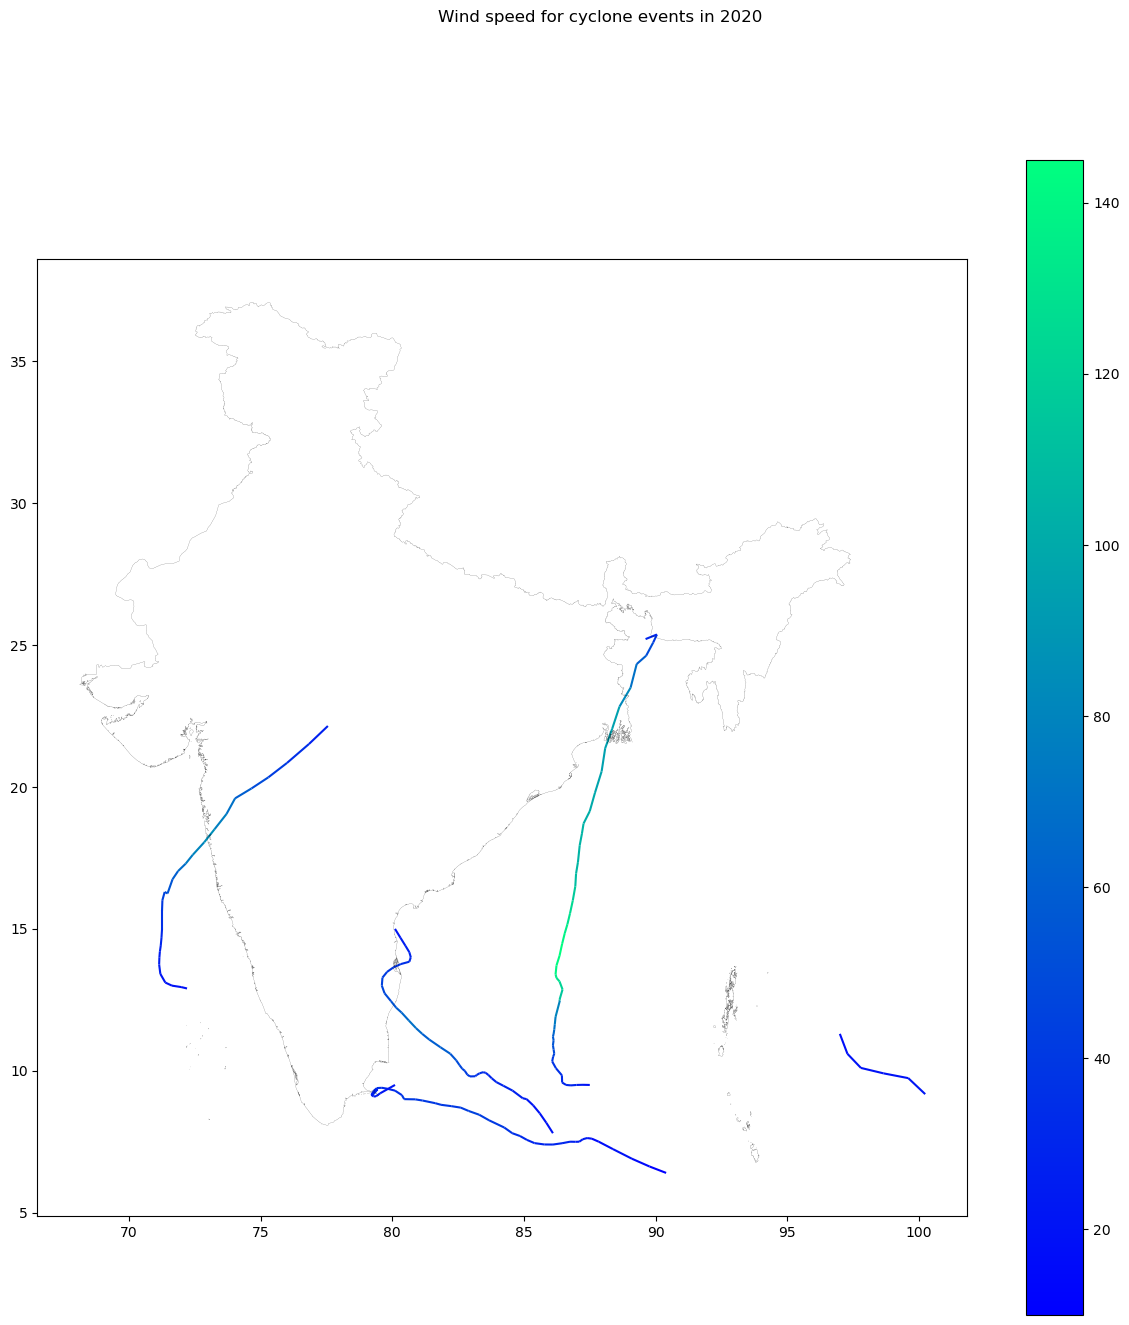

2020


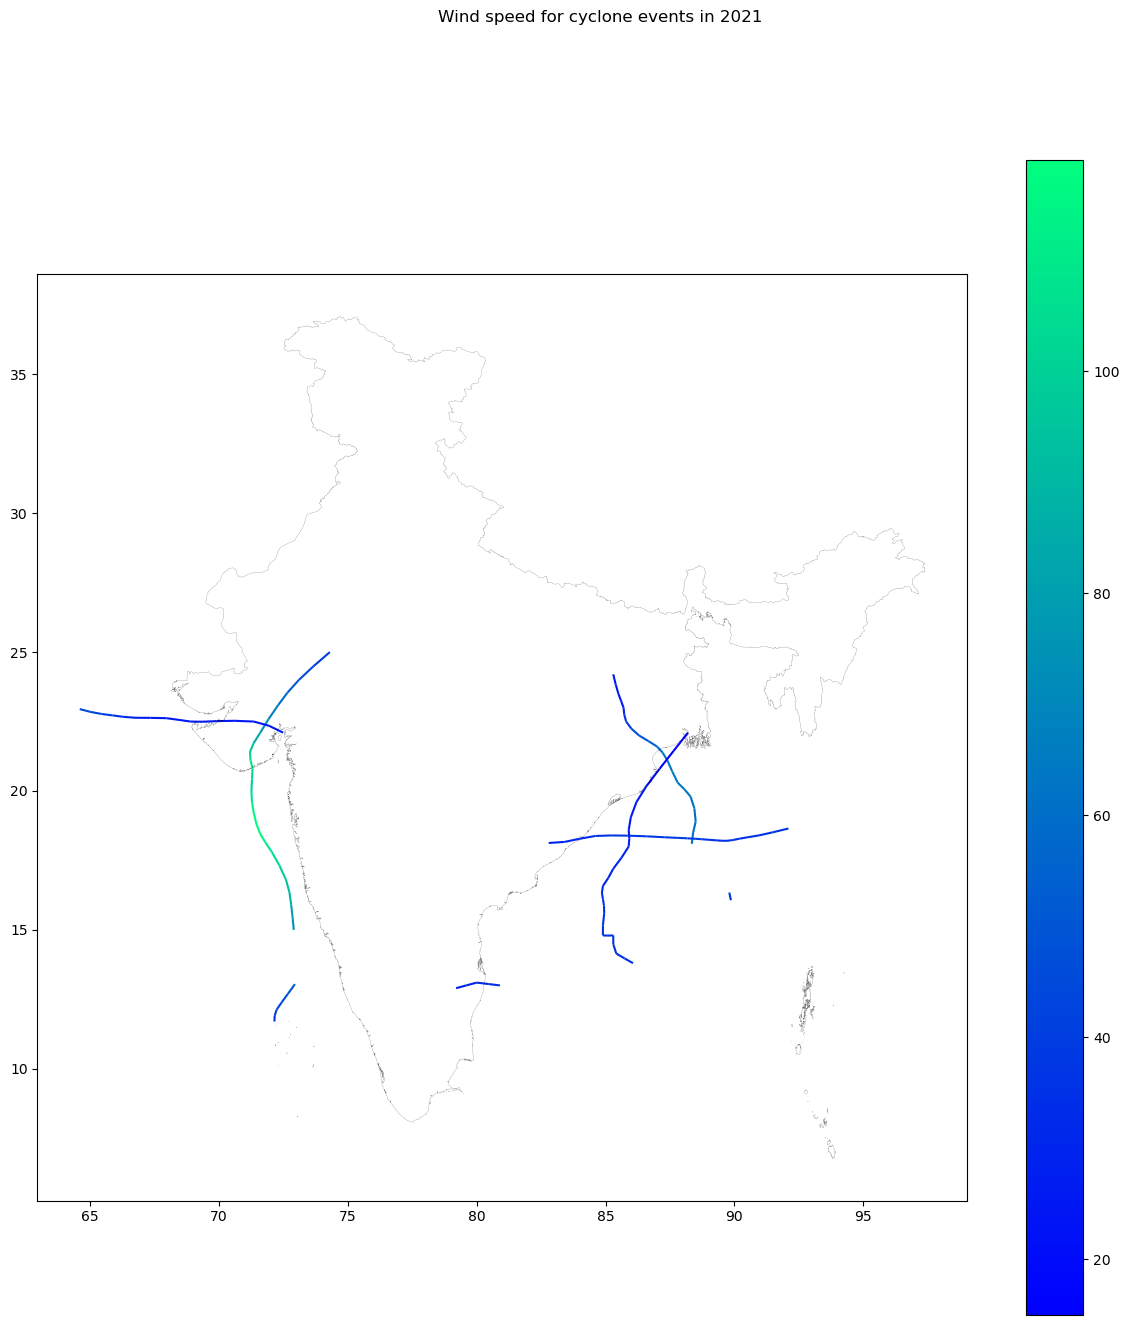

2021


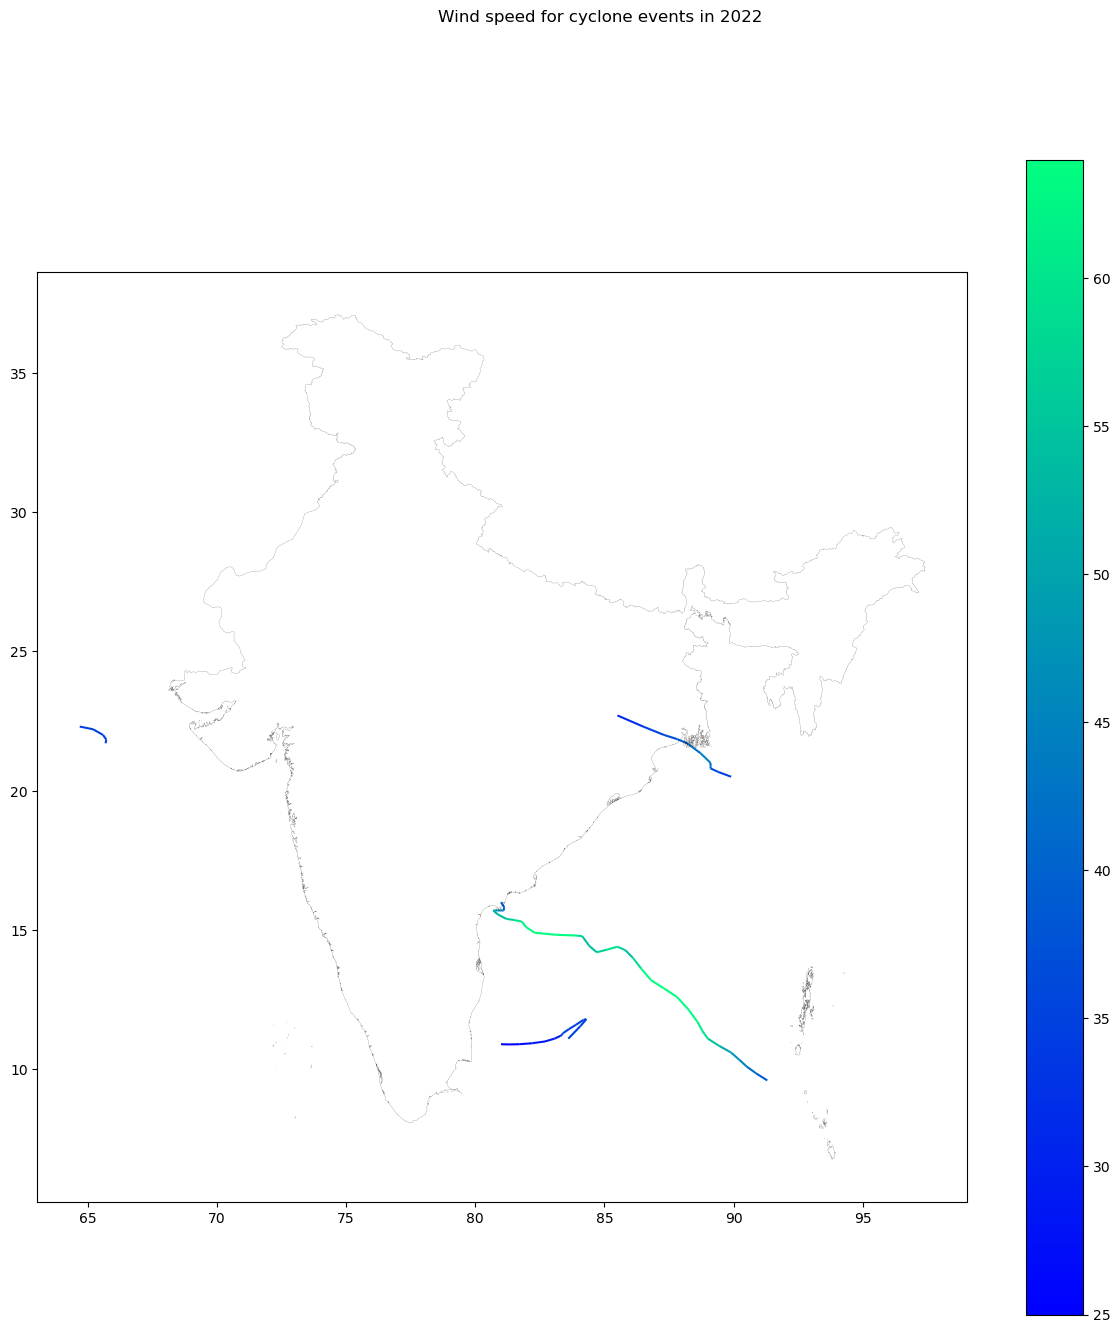

2022


In [27]:
for year in range(1990,2023):
    gdf_plot=gdf_cyclone[gdf_cyclone['year']==year].copy()
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    gdf_plot.plot(column='USA_WIND', ax=ax, cmap='winter', legend=True)
    gdf_india.boundary.plot(ax=ax, color='Black', linewidth=0.1)
    fig.suptitle("Wind speed for cyclone events in "+str(year))
    fig.savefig("USA_windspeed_cyclone events in "+str(year) + ".png", dpi=200)
    plt.show()
    print(year)

***
## General summary statistics

Summary statistics

In [28]:
print(gdf_cyclone.describe())

            SEASON       NUMBER          LAT         LON     WMO_WIND  \
count  9196.000000  9196.000000  9196.000000  9196.00000  4298.000000   
mean   2004.654415    68.671053    15.319892    82.60610    39.329688   
std       9.391328    33.286255     5.459929     8.29741    20.739414   
min    1990.000000     1.000000     0.700000    64.74000     3.000000   
25%    1996.000000    32.000000    11.170000    77.60000    25.000000   
50%    2004.000000    79.000000    15.000000    84.65000    30.000000   
75%    2013.000000    95.000000    19.882500    88.40000    45.000000   
max    2022.000000   130.000000    31.000000   101.14000   140.000000   

          WMO_PRES    DIST2LAND     LANDFALL      USA_LAT      USA_LON  \
count  4289.000000  9196.000000  9196.000000  6992.000000  6992.000000   
mean    992.900909   283.441388   272.333080    13.892759    82.547248   
std      13.147297   264.362916   262.518601     4.891483     8.855319   
min     896.000000     0.000000     0.000000  

Number of observations in the dataset (each cyclone can have multiple observations)

In [29]:
print(len(gdf_cyclone))

9196


Number of cyclone happened in India after 1990

In [32]:
print(len(gdf_cyclone['SID'].unique()))

304


Number of cyclone happened in India after 1990 and with categories 3 or more

In [35]:
grouped=pd.DataFrame(gdf_cyclone.groupby('SID')['USA_SSHS'].max())
print(len(grouped[grouped['USA_SSHS']>=3]))

28


The name of the cyclone

In [36]:
print(grouped[grouped['USA_SSHS']>=3])

               USA_SSHS
SID                    
1990124N09088         4
1991113N10091         5
1992314N08141         4
1994117N07096         4
1995323N05097         3
1996306N15097         4
1997133N03092         4
1998152N11075         3
1999135N12073         3
1999288N15093         4
1999298N12099         5
2001141N14068         3
2006114N08090         4
2007151N14072         4
2007314N10093         5
2008117N11090         4
2010293N17093         4
2013281N12098         5
2014279N11096         4
2017333N06082         3
2018281N14088         3
2019116N02090         5
2019160N11073         3
2019296N15066         4
2019301N05081         3
2019302N11118         3
2020136N10088         5
2021135N12072         4
